In [139]:
#Import the basic libraries to get started with EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Part 2 - PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [140]:
#Read the data
df = pd.read_excel("PCA India Data_Census.xlsx")

In [141]:
df.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [142]:
df.tail()

State Code  Dist.Code                     State                Area Name  \
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[5 rows x 61 columns]

In [143]:
df.shape

(640, 61)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [145]:
df.describe().T

count           mean            std    min       25%      50%  \
State Code      640.0      17.114062       9.426486    1.0      9.00     18.0   
Dist.Code       640.0     320.500000     184.896367    1.0    160.75    320.5   
No_HH           640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M           640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F           640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
M_06            640.0   12309.098438   11500.906881   56.0   4733.75   9159.0   
F_06            640.0   11942.300000   11326.294567   56.0   4672.25   8663.0   
M_SC            640.0   13820.946875   14426.373130    0.0   3466.25   9591.5   
F_SC            640.0   20778.392188   21727.887713    0.0   5603.25  13709.0   
M_ST            640.0    6191.807813    9912.668948    0.0    293.75   2333.5   
F_ST            640.0   10155.640625   15875.701488    0.0    429.50   3834.5   
M_LIT           640.0   57967.979688   55910.282466  286.0  21298.00  42693.5   
F_LIT           640.0   66359.565625   75037.860207  371.0  20932.00  43796.5   
M_ILL           640.0   21972.596875   19825.605268  105.0   8590.00  15767.5   
F_ILL           640.0   56012.518750   47116.693769  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.407813   36419.537491  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.760938   37192.360943  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.446875   31480.915680   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.846875   29998.262689  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.342188    4739.161969    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.042188    5326.362728    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.109375    6399.507966    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8925.995312   12864.287584    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.893750    1278.642345    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.773438    3179.414449    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.101562   26068.480886   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.035938   18972.202369  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.960938    7410.791691   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.914062   10996.474528  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.737500    1311.546847    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.682813    3564.626095    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.326562    3781.555707    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.281250    6773.876298    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.742188     462.661891    0.0     71.75    166.0   
MARG_HH_F       640.0     786.626562    1198.718213    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.154687    3609.391821    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.323438    4115.191314   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.168750   39045.316918  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.323438   82970.406216  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.987500    6019.806644   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.864063    8467.473429   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.848438     905.639279    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.584375    2496.541514    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.635938    3059.586387    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.850000    5335.640960    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.362500     358.728567    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.884375     900.025817    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.140625    3036.964381    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.545312    3327.83

In [146]:
df['Area Name'].value_counts()

Raigarh          2
Bijapur          2
Aurangabad       2
Hamirpur         2
Bilaspur         2
                ..
Darbhanga        1
Muzaffarpur      1
Gopalganj        1
Siwan            1
South Andaman    1
Name: Area Name, Length: 635, dtype: int64

In [147]:
df['State'].value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

In [148]:
#Checking for Null Values
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [149]:
#Checking for Duplicate Records
df.duplicated().sum()

0

# Part 2 - PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

In [150]:
#Univariate Analysis
#Numerical Values

In [151]:
EDA_data =df[['TOT_M','TOT_F','No_HH','M_SC','F_SC']]

In [152]:
EDA_data.head()

TOT_M  TOT_F  No_HH  M_SC  F_SC
0  23388  29796   7707     3     0
1  19585  23102   6218     7     6
2   6546  10964   4452     3     6
3   2784   4206   1320     0     0
4  20591  29981  11654    20    33

TOT_M
Skew : 2.03


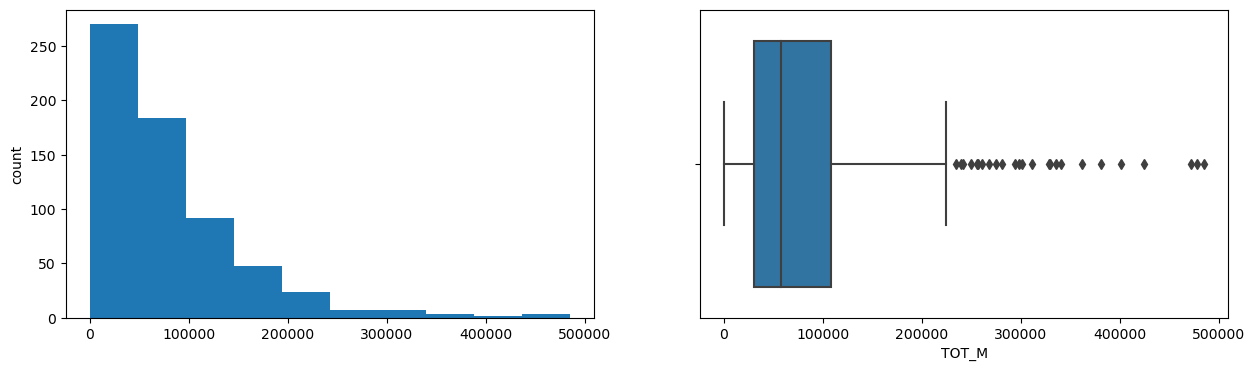

TOT_F
Skew : 2.11


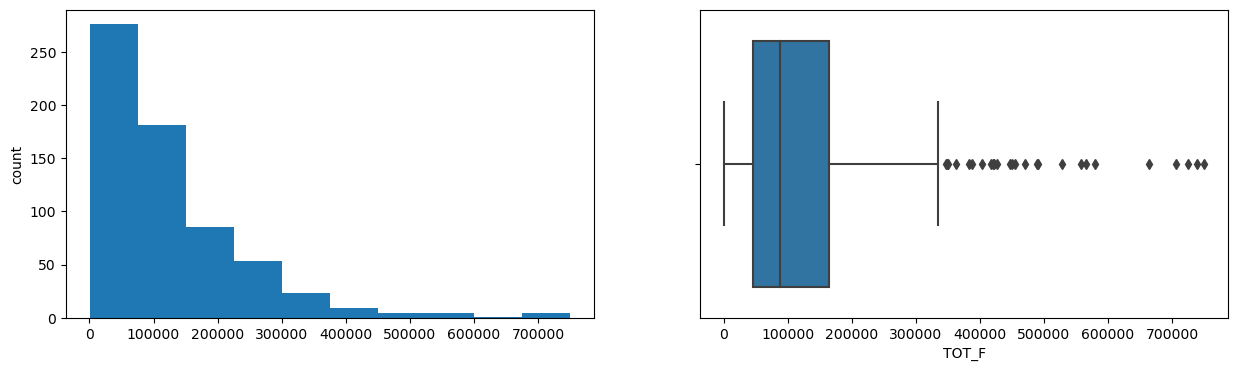

No_HH
Skew : 2.02


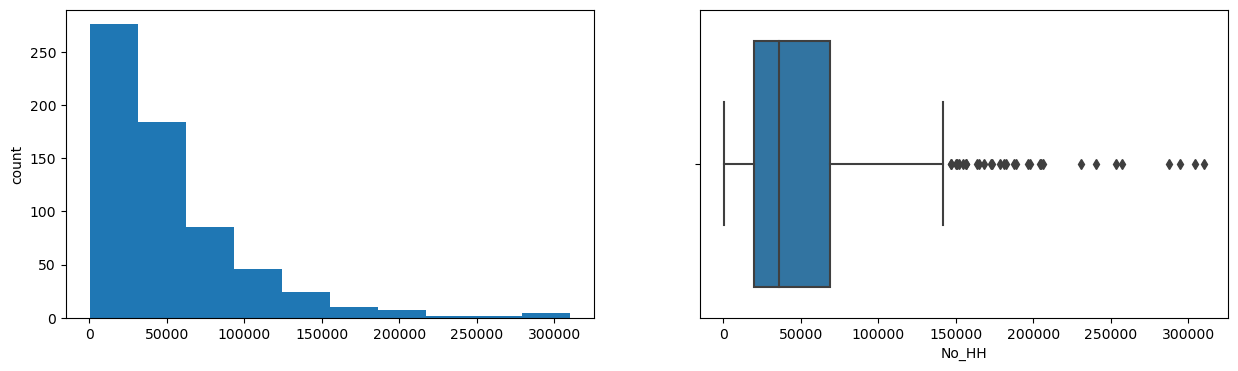

M_SC
Skew : 1.99


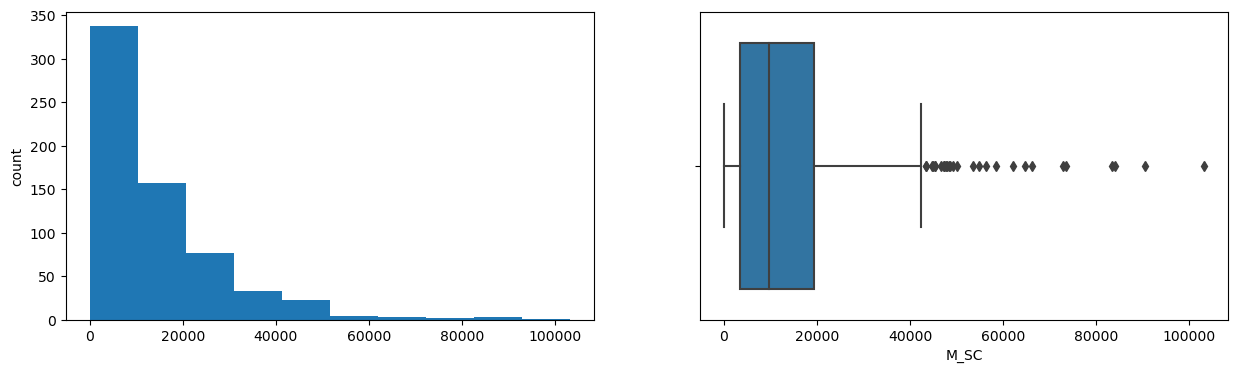

F_SC
Skew : 1.99


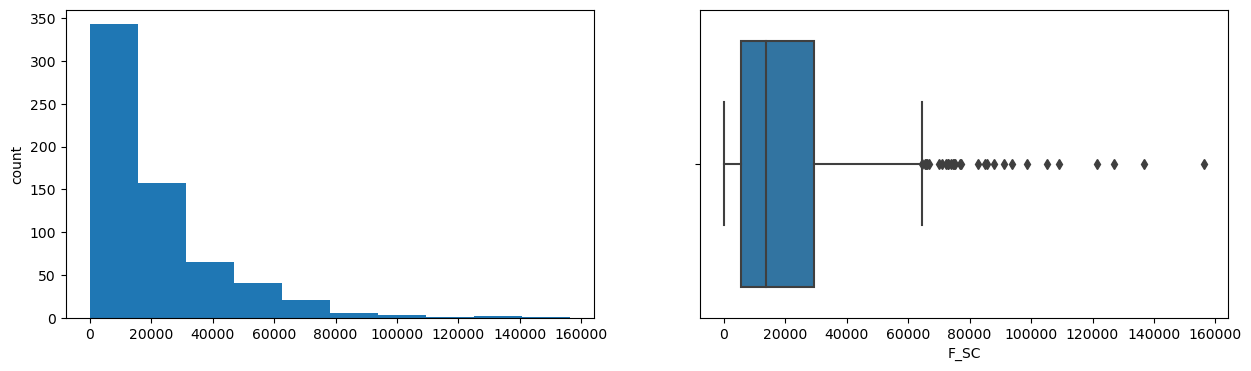

In [153]:
for col in EDA_data.columns[:]:
    print(col)
    print('Skew :',round(EDA_data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    EDA_data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=EDA_data[col])
    plt.show()

In [154]:
#Bivariate
#Numeric vs Numeric

Text(0, 0.5, 'TOT_F')

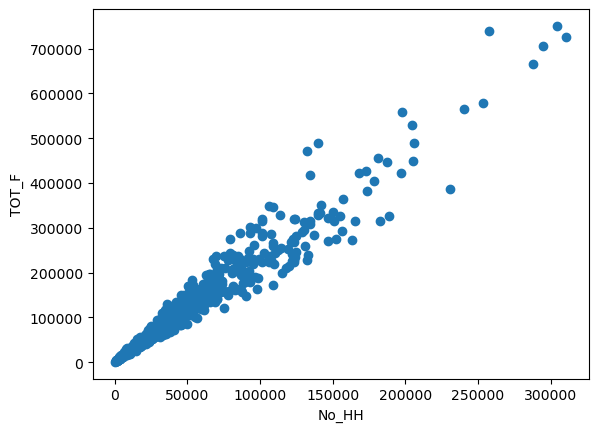

In [155]:
plt.scatter(x='No_HH',y='TOT_F',data=df)
plt.xlabel('No_HH',fontsize = 10)
plt.ylabel('TOT_F',fontsize = 10)

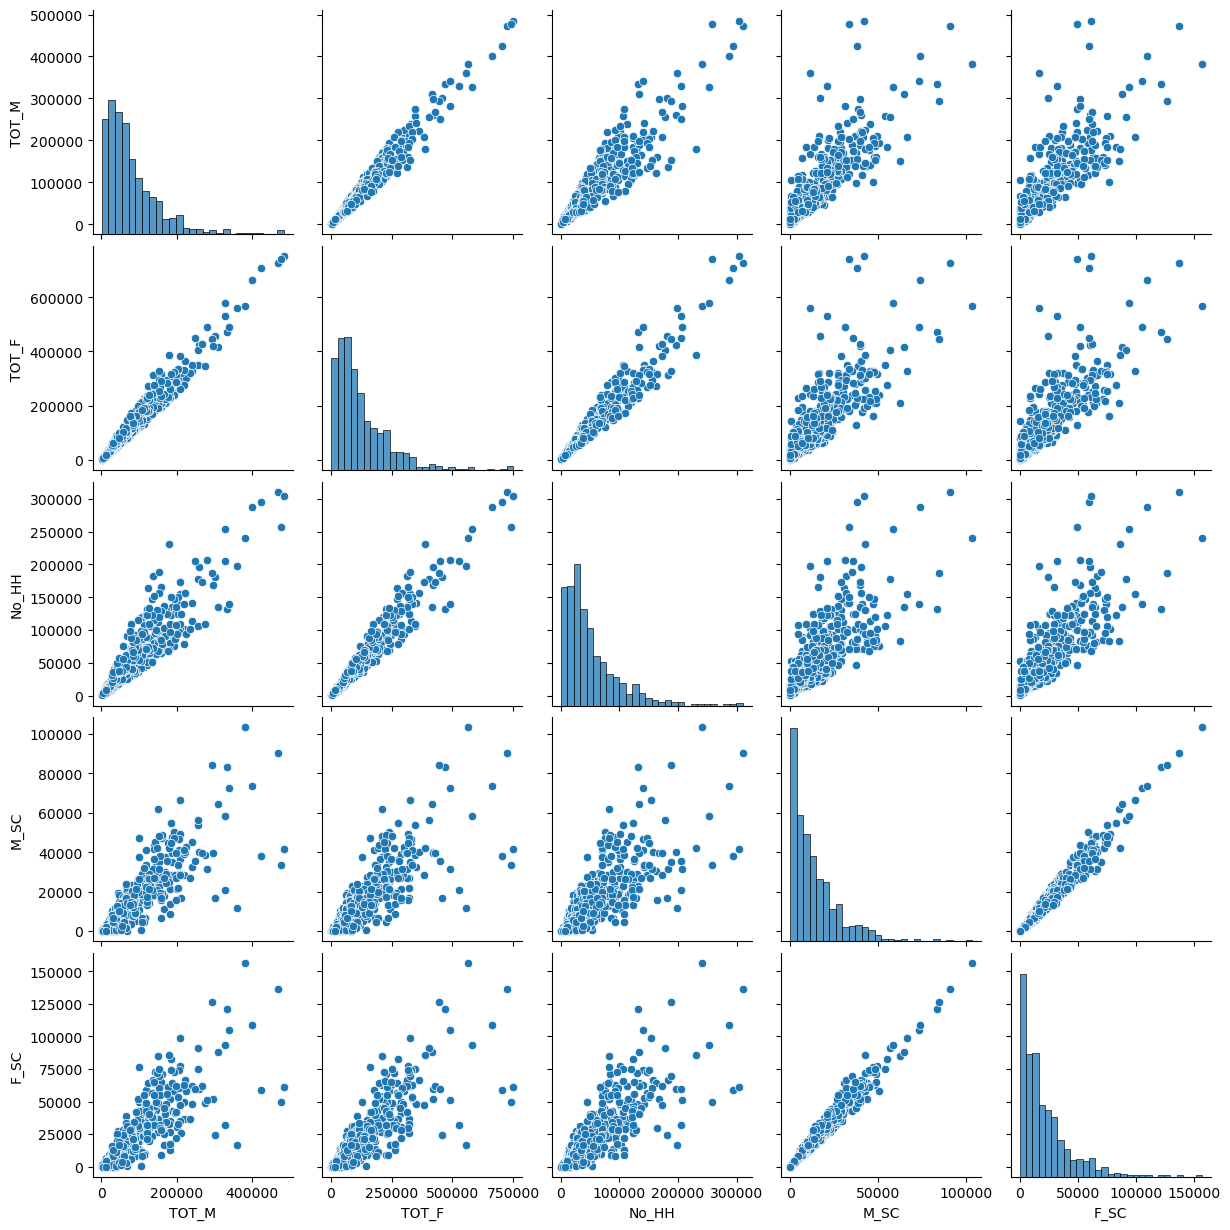

In [156]:
sns.pairplot(EDA_data)
fig_dims = (5, 5)

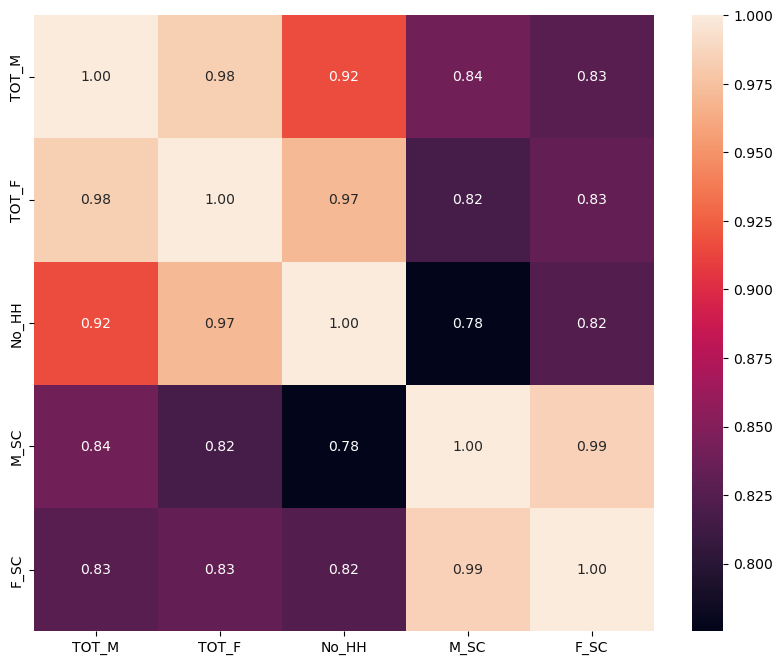

In [157]:
plt.figure(figsize=(10,8))
sns.heatmap(EDA_data.corr(),annot=True,fmt=".2f");

In [158]:
df['Gender Ratio'] = df['TOT_F']/df['TOT_M']

In [159]:
df['Gender Ratio']

0      1.273987
1      1.179576
2      1.674916
3      1.510776
4      1.456024
         ...   
635    1.444812
636    1.756925
637    1.697870
638    1.540769
639    1.506972
Name: Gender Ratio, Length: 640, dtype: float64

In [160]:
df.columns

Index(['State Code', 'Dist.Code', 'State', 'Area Name', 'No_HH', 'TOT_M',
       'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT',
       'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M',
       'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M',
       'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F',
       'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M',
       'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M',
       'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M',
       'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M',
       'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M',
       'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M',
       'NON_WORK_F', 'Gender Ratio'],
      dtype='object')

# (i) Which state has highest gender ratio and which has the lowest?

State
Andhra Pradesh              1.895093
Chhattisgarh                1.869501
Tamil Nadu                  1.861113
Odisha                      1.830305
Arunachal Pradesh           1.757634
Maharashtra                 1.743672
Nagaland                    1.717555
Kerala                      1.700197
Puducherry                  1.673442
Uttarakhand                 1.650205
Himachal Pradesh            1.616170
Goa                         1.613884
Tripura                     1.608367
Madhya Pradesh              1.587745
Andaman & Nicobar Island    1.581870
Mizoram                     1.581292
Karnataka                   1.578222
Manipur                     1.563842
Dadara & Nagar Havelli      1.551275
West Bengal                 1.541931
Sikkim                      1.524218
Gujarat                     1.513508
Jharkhand                   1.481463
Rajasthan                   1.470241
Assam                       1.460374
Chandigarh                  1.428496
Daman & Diu                 1.42

Text(0, 0.5, 'Gender Ratio')

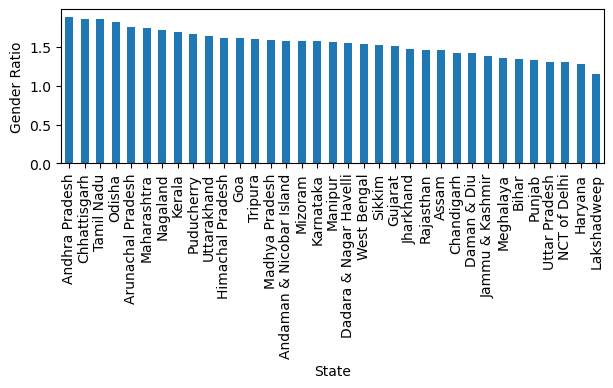

In [161]:
df_grouped = df.groupby(["State"])["Gender Ratio"].mean().sort_values(ascending=False)
print(df_grouped)
df_grouped.plot(kind="bar", figsize=(7,2))
plt.ylabel('Gender Ratio')

# (ii) Which district has the highest & lowest gender ratio?

Area Name
Krishna           2.283250
Koraput           2.268763
Virudhunagar      2.225429
West Godavari     2.221849
Baudh             2.215060
                    ...   
Baghpat           1.184830
Dhaulpur          1.180761
Mahamaya Nagar    1.180202
Badgam            1.179576
Lakshadweep       1.151993
Name: Gender Ratio, Length: 635, dtype: float64


Text(0, 0.5, 'Gender Ratio')

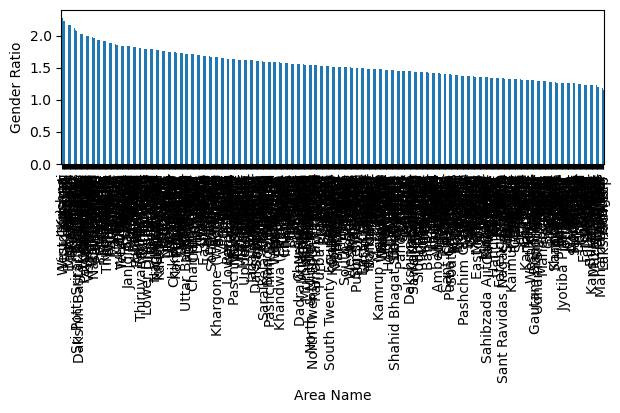

In [162]:
df_grouped1 = df.groupby(["Area Name"])["Gender Ratio"].mean().sort_values(ascending=False)
print(df_grouped1)
df_grouped1.plot(kind="bar", figsize=(7,2))
plt.ylabel('Gender Ratio')

# iii) Which state has highest and lowest number of  Households?

State
Kerala                      141618.785714
West Bengal                 137646.526316
Andhra Pradesh              135969.000000
Tamil Nadu                   92646.875000
Maharashtra                  89606.114286
Karnataka                    75620.500000
Uttar Pradesh                56434.802817
Bihar                        51963.868421
Gujarat                      47507.692308
NCT of Delhi                 43869.000000
Chhattisgarh                 40812.000000
Odisha                       40069.100000
Punjab                       39801.500000
Goa                          39797.500000
Rajasthan                    35670.424242
Assam                        31606.444444
Uttarakhand                  30205.230769
Tripura                      30161.750000
Madhya Pradesh               30075.280000
Jharkhand                    28412.708333
Haryana                      26951.000000
Himachal Pradesh             25443.083333
Chandigarh                   24016.000000
Meghalaya                   

Text(0, 0.5, 'No_HH')

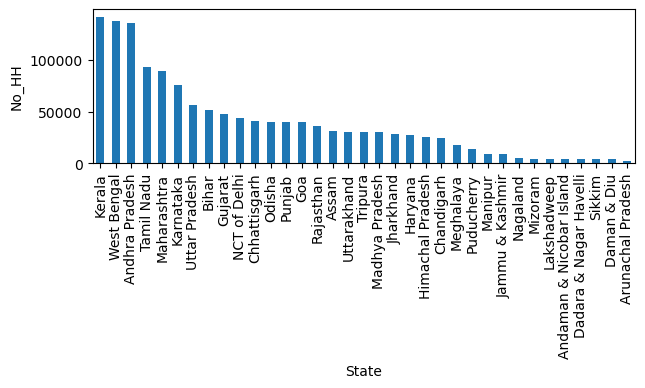

In [163]:
df_grouped2 = df.groupby(["State"])["No_HH"].mean().sort_values(ascending=False)
print(df_grouped2)
df_grouped2.plot(kind="bar", figsize=(7,2))
plt.ylabel('No_HH')

# iv) Which District has highest and lowest number of  Households?

Area Name
North Twenty Four Parganas    310450.0
Mumbai Suburban               304502.0
Thane                         294698.0
Bangalore                     287841.0
Malappuram                    257239.0
                                ...   
North  District                 1111.0
Lahul & Spiti                   1051.0
Upper Siang                      929.0
Anjaw                            783.0
Dibang Valley                    350.0
Name: No_HH, Length: 635, dtype: float64


Text(0, 0.5, 'Area Name')

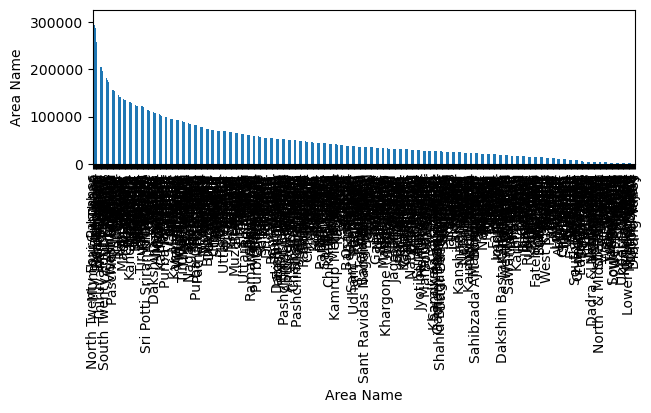

In [164]:
df_grouped3 = df.groupby(["Area Name"])["No_HH"].mean().sort_values(ascending=False)
print(df_grouped3)
df_grouped3.plot(kind="bar", figsize=(7,2))
plt.ylabel('Area Name')

# v)Which State has highest number of scheduled cast Male ?

State
West Bengal                 45231.578947
Andhra Pradesh              26597.608696
Uttar Pradesh               25741.225352
Punjab                      23850.700000
Karnataka                   22146.166667
Tamil Nadu                  20241.250000
NCT of Delhi                20175.333333
Kerala                      19478.500000
Maharashtra                 17455.057143
Bihar                       15476.631579
Rajasthan                   12088.727273
Haryana                     11374.904762
Chandigarh                   9499.000000
Himachal Pradesh             9290.833333
Uttarakhand                  8298.846154
Odisha                       8257.033333
Tripura                      7815.750000
Madhya Pradesh               7040.260000
Chhattisgarh                 6284.722222
Jharkhand                    6264.875000
Gujarat                      6234.846154
Assam                        4171.814815
Puducherry                   3203.250000
Jammu & Kashmir              2019.227273
Goa       

Text(0, 0.5, 'M_SC')

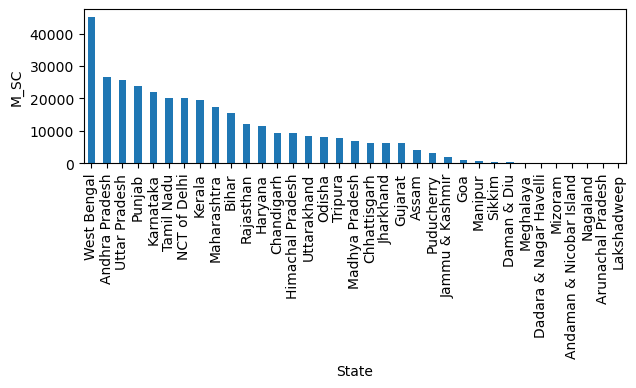

In [165]:
df_grouped4 = df.groupby(["State"])["M_SC"].mean().sort_values(ascending=False)
print(df_grouped4)
df_grouped4.plot(kind="bar", figsize=(7,2))
plt.ylabel('M_SC')

# Which State has highest Scheduled cast female?

State
West Bengal                 69293.210526
Andhra Pradesh              48850.826087
Tamil Nadu                  36378.812500
Uttar Pradesh               34615.746479
Karnataka                   33799.666667
Punjab                      31646.900000
Kerala                      31164.714286
Maharashtra                 28867.800000
NCT of Delhi                24528.333333
Bihar                       20889.921053
Rajasthan                   16823.515152
Haryana                     14395.380952
Odisha                      14381.033333
Himachal Pradesh            13870.583333
Chandigarh                  12155.000000
Tripura                     12118.000000
Uttarakhand                 11965.384615
Chhattisgarh                11780.777778
Madhya Pradesh              10794.640000
Jharkhand                    8914.708333
Gujarat                      8875.653846
Assam                        5976.888889
Puducherry                   5454.250000
Jammu & Kashmir              2737.727273
Goa       

Text(0, 0.5, 'F_SC')

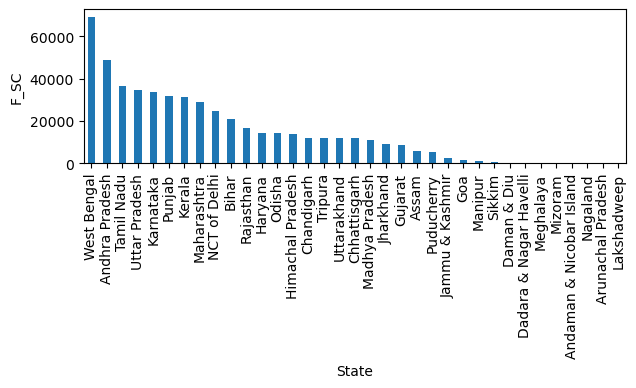

In [166]:
df_grouped5 = df.groupby(["State"])["F_SC"].mean().sort_values(ascending=False)
print(df_grouped5)
df_grouped5.plot(kind="bar", figsize=(7,2))
plt.ylabel('F_SC')

# Which District has highest scheduled cast males

Area Name
Barddhaman                    103307.0
North Twenty Four Parganas     90529.0
South Twenty Four Parganas     84182.0
Azamgarh                       83480.0
Bangalore                      73623.0
                                ...   
Tawang                             0.0
Dibang Valley                      0.0
Tirap                              0.0
Changlang                          0.0
Zunheboto                          0.0
Name: M_SC, Length: 635, dtype: float64


Text(0, 0.5, 'M_SC')

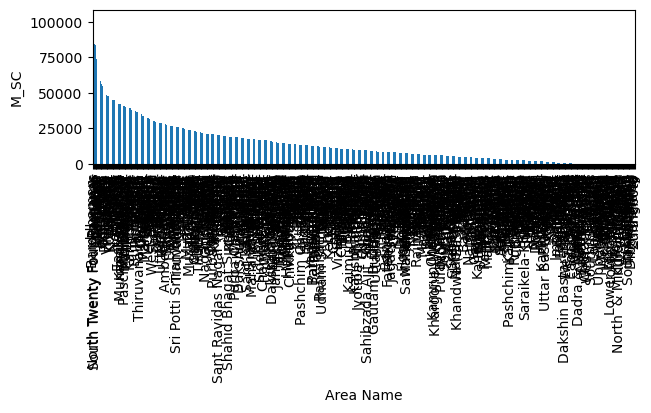

In [167]:
df_grouped6 = df.groupby(["Area Name"])["M_SC"].mean().sort_values(ascending=False)
print(df_grouped6)
df_grouped6.plot(kind="bar", figsize=(7,2))
plt.ylabel('M_SC')

# Which District has highest scheduled cast females

Area Name
Barddhaman                    156429.0
North Twenty Four Parganas    136707.0
South Twenty Four Parganas    126879.0
Azamgarh                      121307.0
Bangalore                     109039.0
                                ...   
Upper Siang                        0.0
Upper Subansiri                    0.0
North  & Middle Andaman            0.0
Nicobars                           0.0
Zunheboto                          0.0
Name: F_SC, Length: 635, dtype: float64


Text(0, 0.5, 'F_SC')

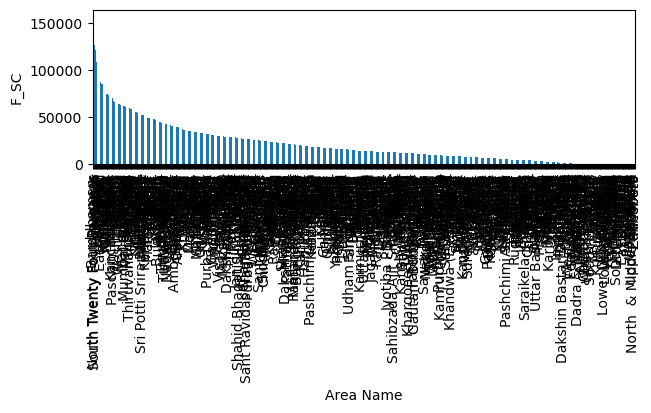

In [168]:
df_grouped7 = df.groupby(["Area Name"])["F_SC"].mean().sort_values(ascending=False)
print(df_grouped7)
df_grouped7.plot(kind="bar", figsize=(7,2))
plt.ylabel('F_SC')

# Part 2 - PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [169]:
#checking for outliers before scaling data

In [170]:
data_df = df.drop(['State Code','Dist.Code','Area Name','State'],axis = 1)

In [171]:
data_df.head()

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST   F_ST  M_LIT  ...  \
0   7707  23388  29796  5862  6196     3     0  1999   2598  13381  ...   
1   6218  19585  23102  4482  3733     7     6   427    517  10513  ...   
2   4452   6546  10964  1082  1018     3     6  5806   9723   4534  ...   
3   1320   2784   4206   563   677     0     0  2666   3968   1842  ...   
4  11654  20591  29981  5157  4587    20    33  7670  10843  13243  ...   

   MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
0            749            180            237            680            252   
1            715            123            229            186            148   
2            188             44             89              3             34   
3            247             61            128             13             50   
4           1928            465           1043            205            302   

   MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  Gender Ratio  
0             32             46         258         214      1.273987  
1             76            178         140         160      1.179576  
2              0              4          67          61      1.674916  
3              4             10         116          59      1.510776  
4             24            105         180         478      1.456024  

[5 rows x 58 columns]

In [172]:
data_df.shape

(640, 58)

In [173]:
len(data_df.columns)

58

No_HH
Skew : 2.02


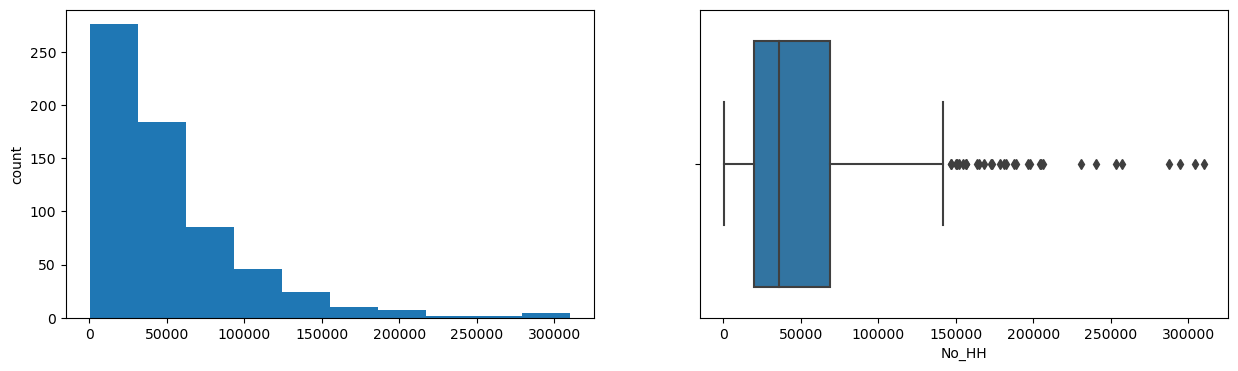

TOT_M
Skew : 2.03


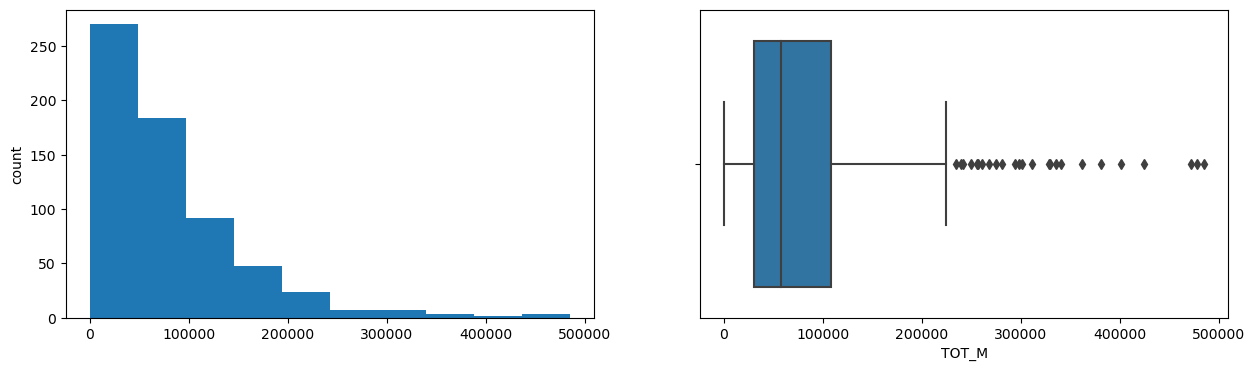

TOT_F
Skew : 2.11


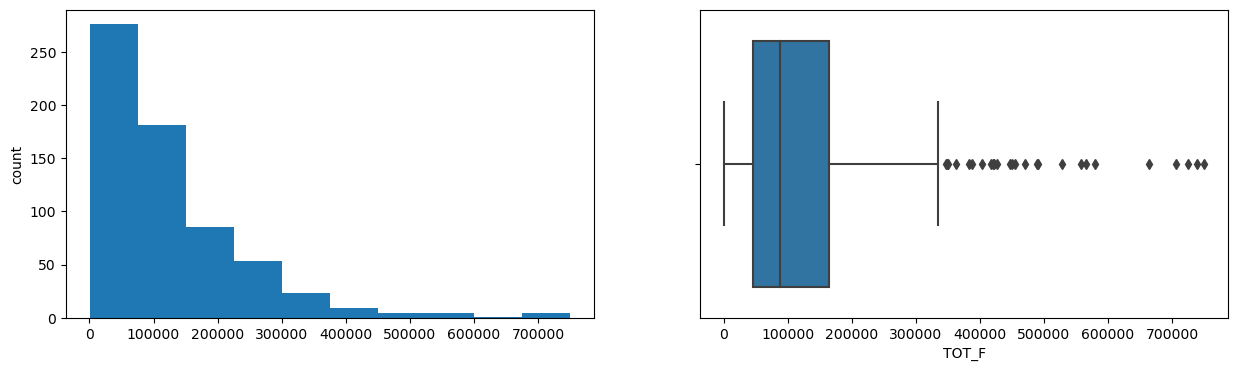

M_06
Skew : 2.19


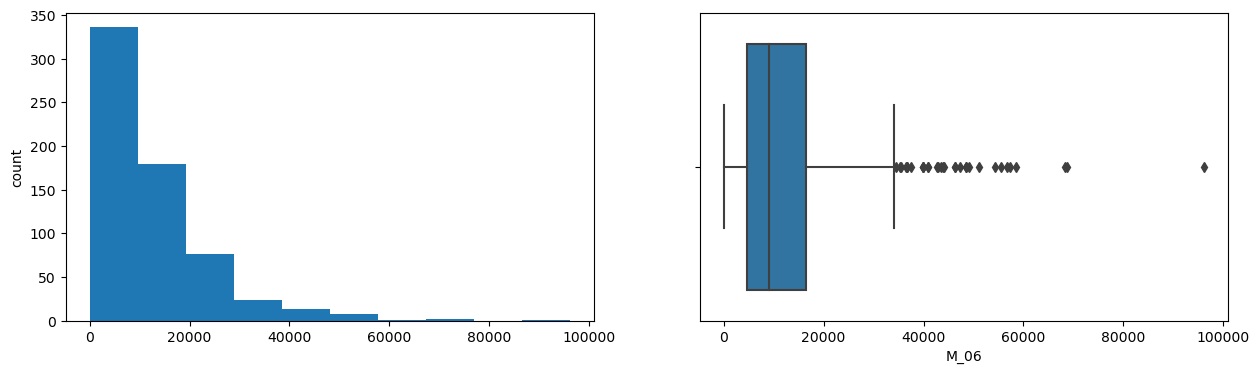

F_06
Skew : 2.23


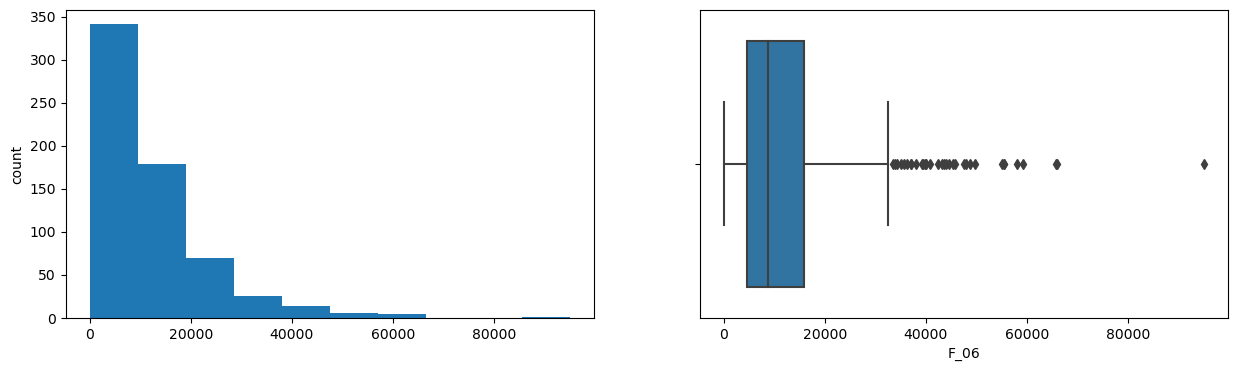

M_SC
Skew : 1.99


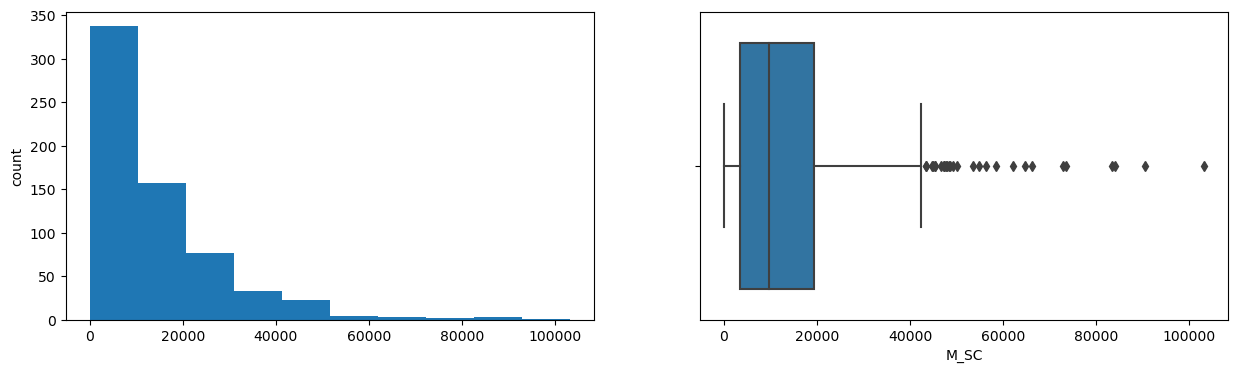

F_SC
Skew : 1.99


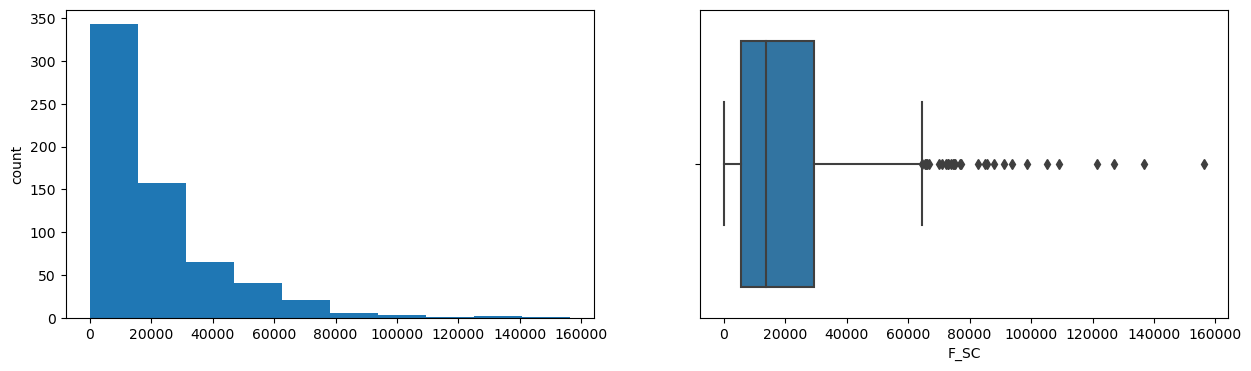

M_ST
Skew : 3.44


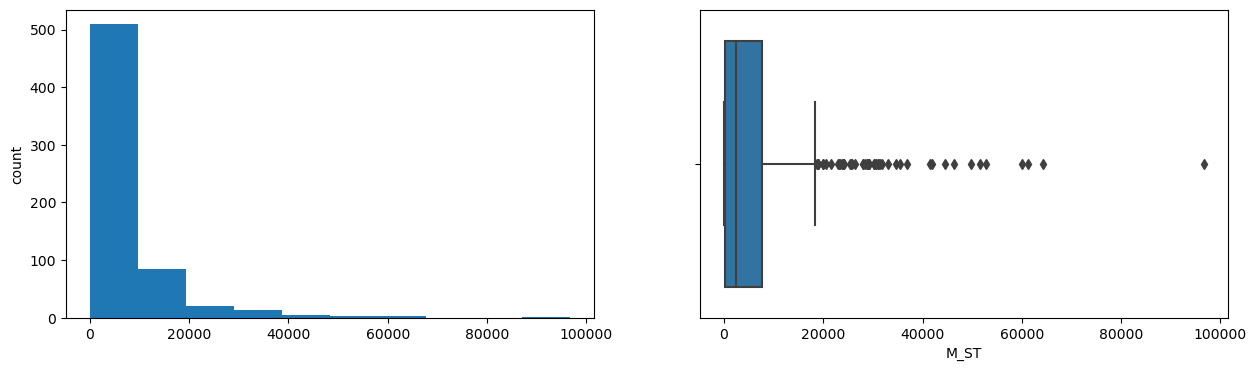

F_ST
Skew : 2.98


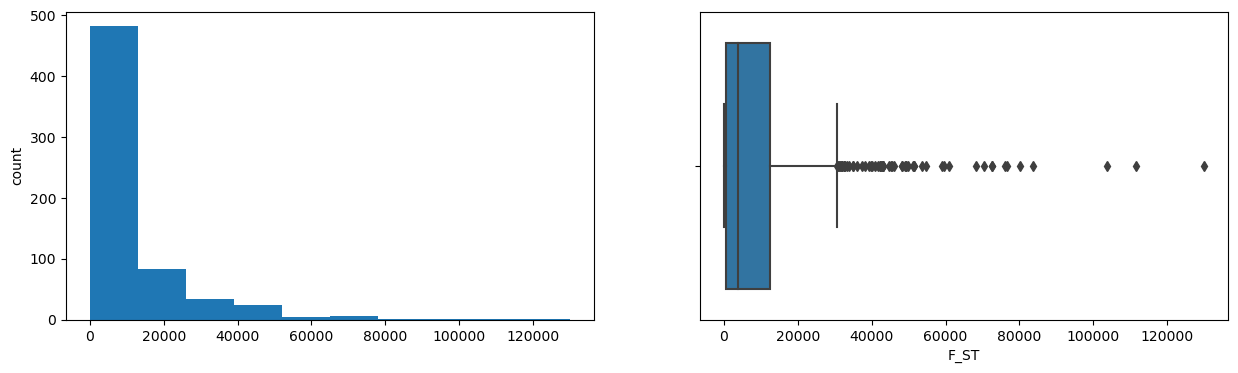

M_LIT
Skew : 2.34


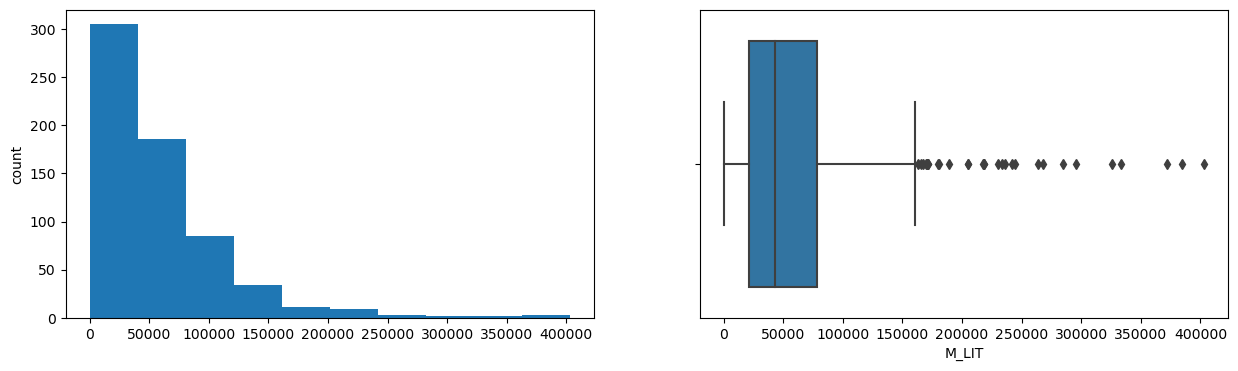

F_LIT
Skew : 3.15


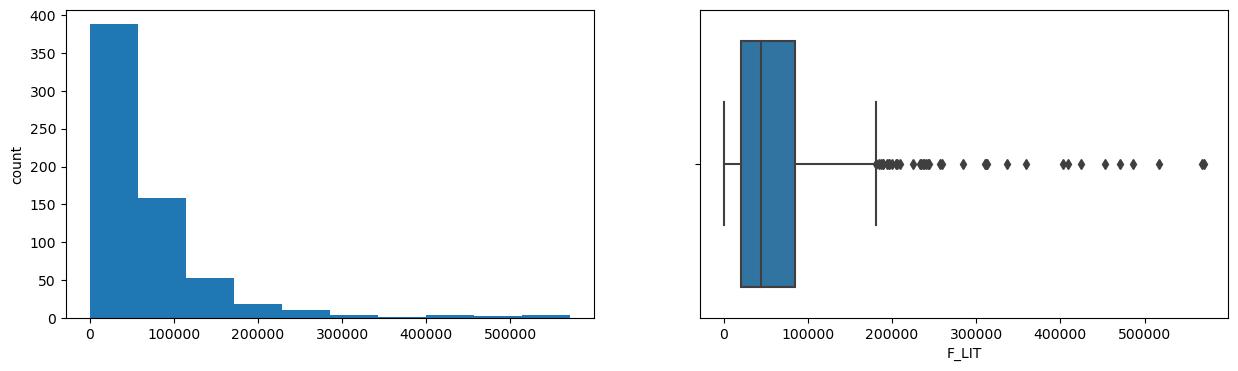

M_ILL
Skew : 1.58


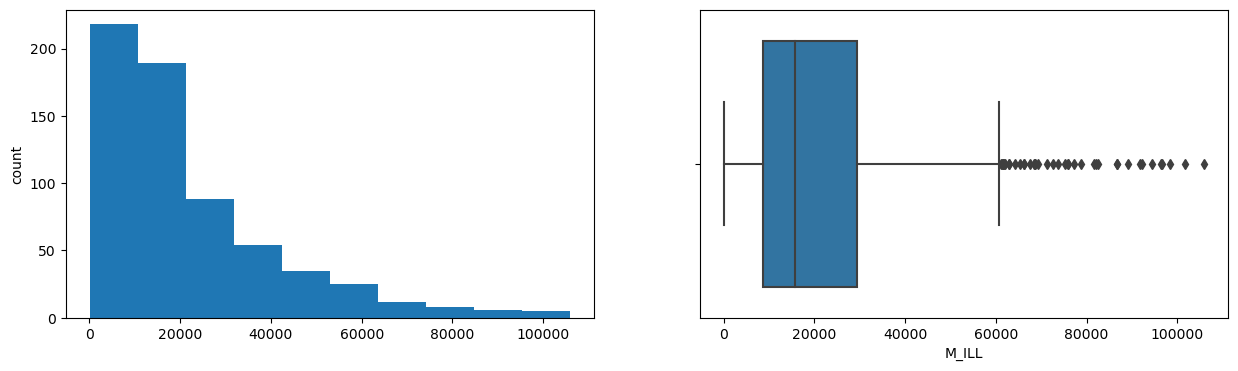

F_ILL
Skew : 1.34


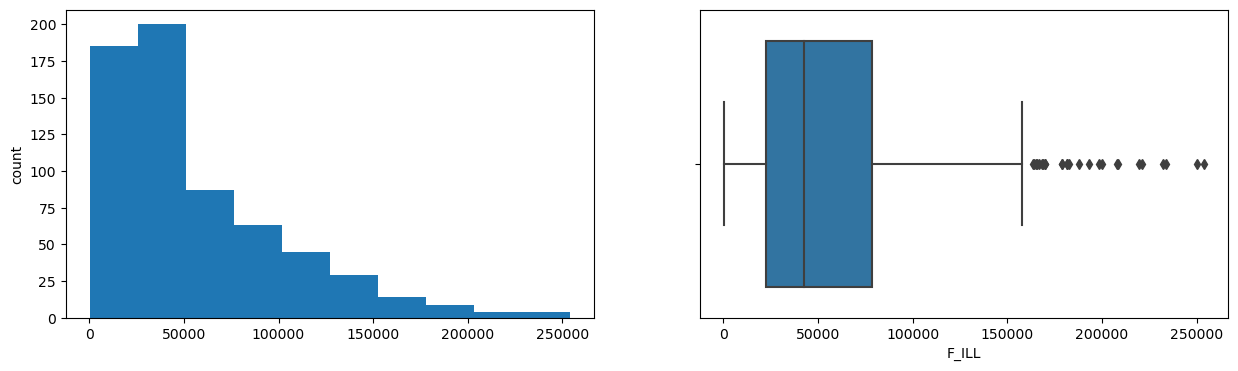

TOT_WORK_M
Skew : 2.3


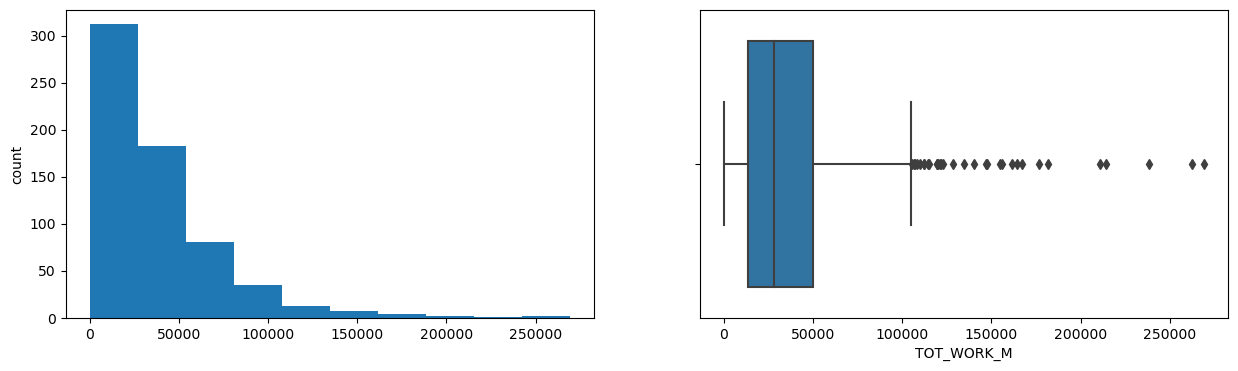

TOT_WORK_F
Skew : 1.93


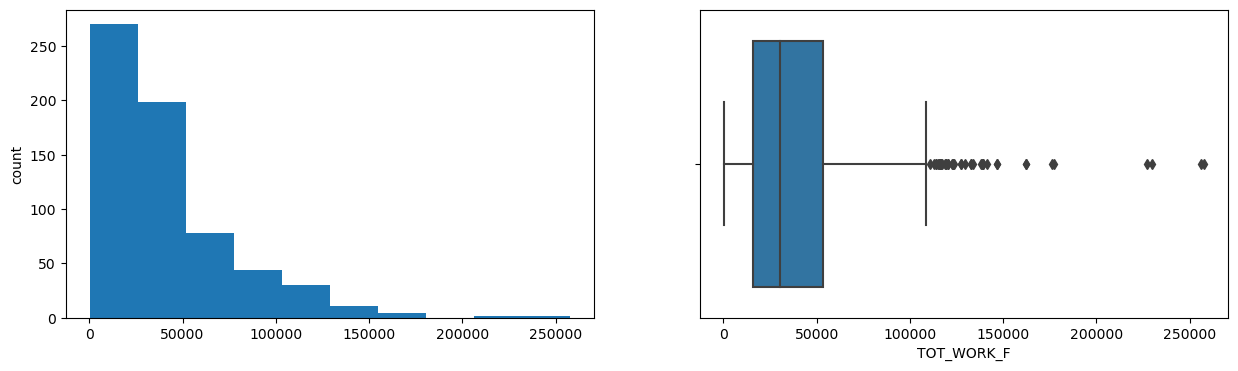

MAINWORK_M
Skew : 2.63


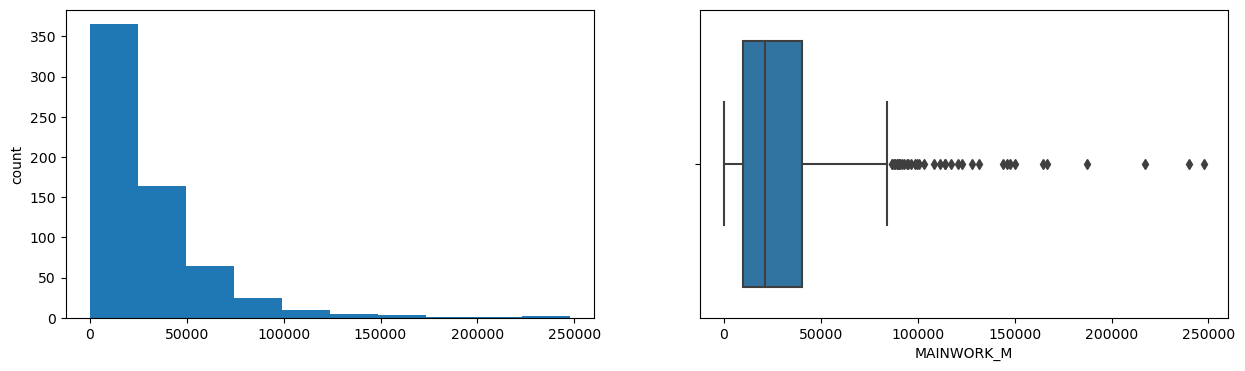

MAINWORK_F
Skew : 2.55


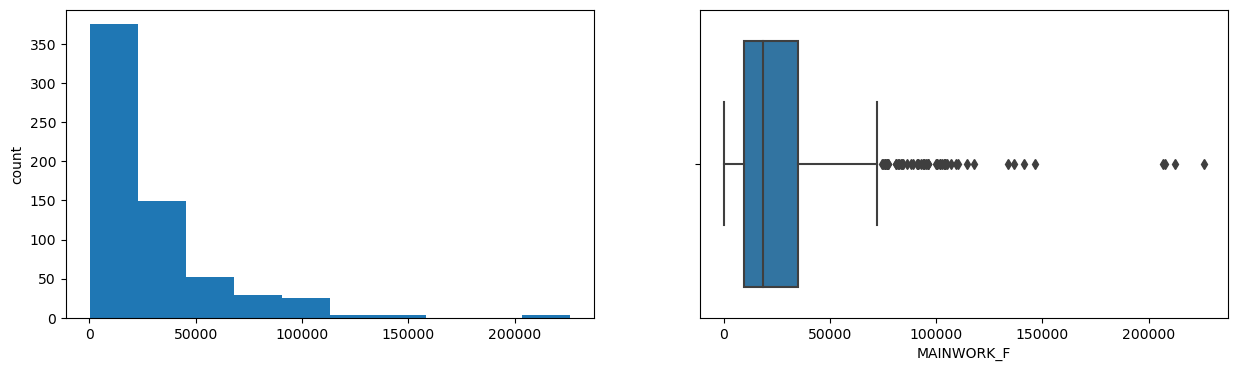

MAIN_CL_M
Skew : 1.68


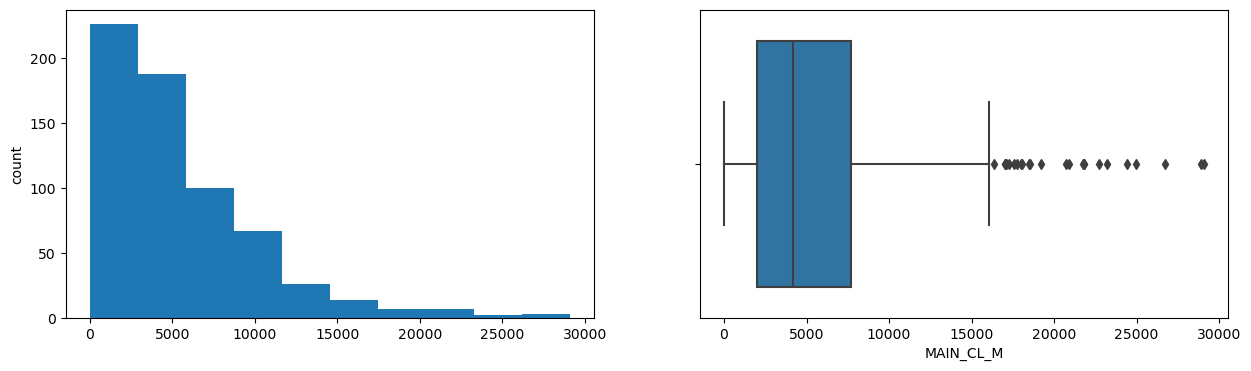

MAIN_CL_F
Skew : 2.38


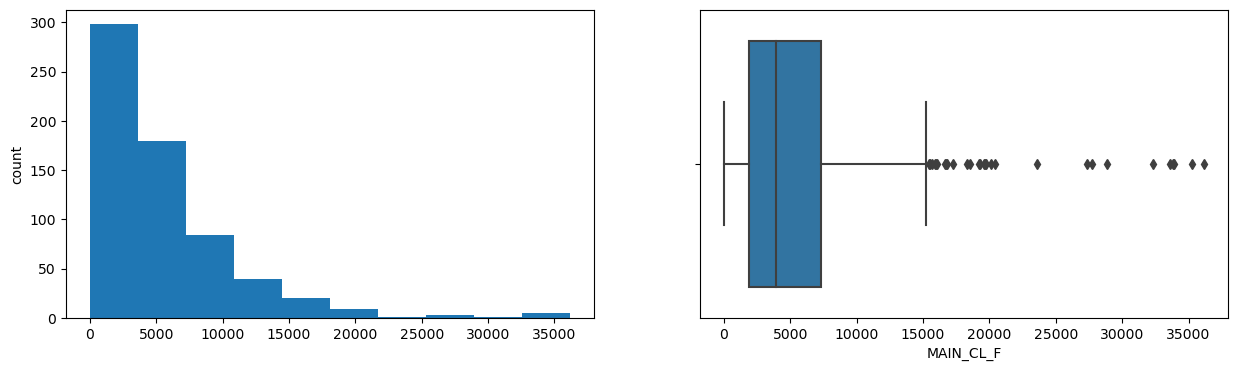

MAIN_AL_M
Skew : 1.88


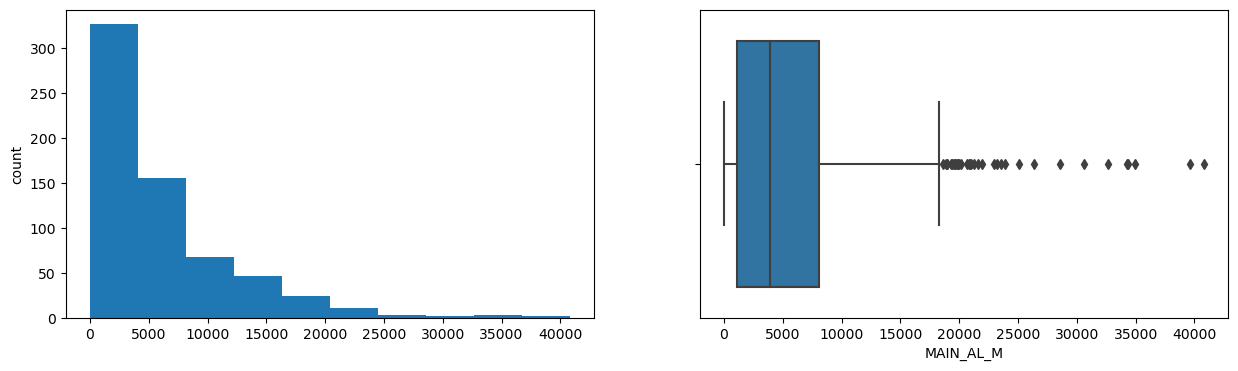

MAIN_AL_F
Skew : 2.72


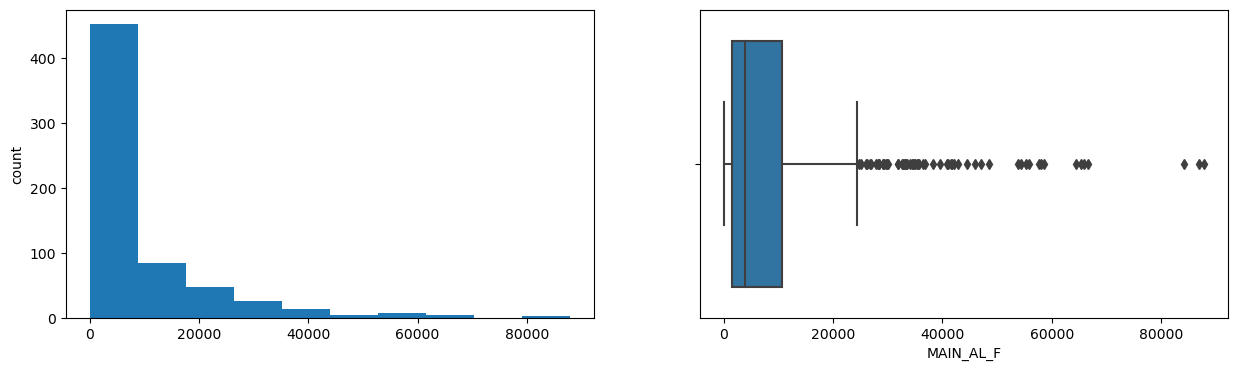

MAIN_HH_M
Skew : 4.88


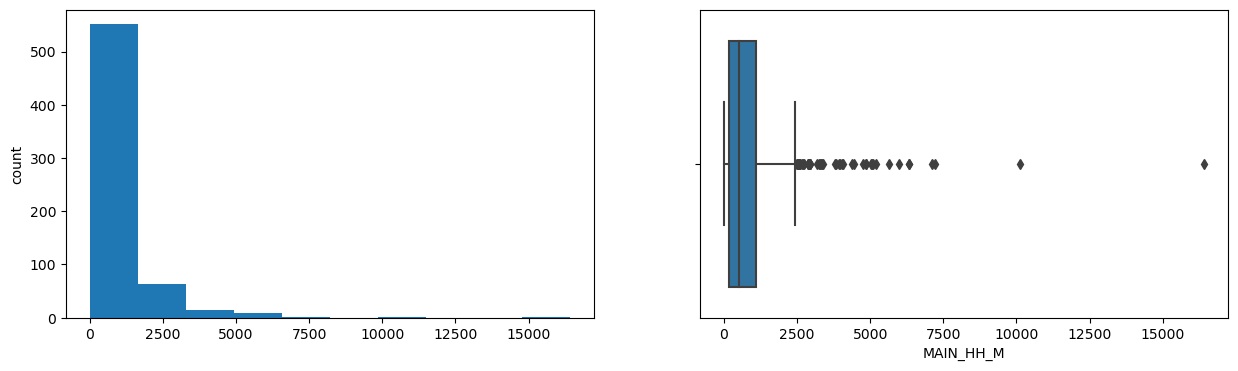

MAIN_HH_F
Skew : 8.58


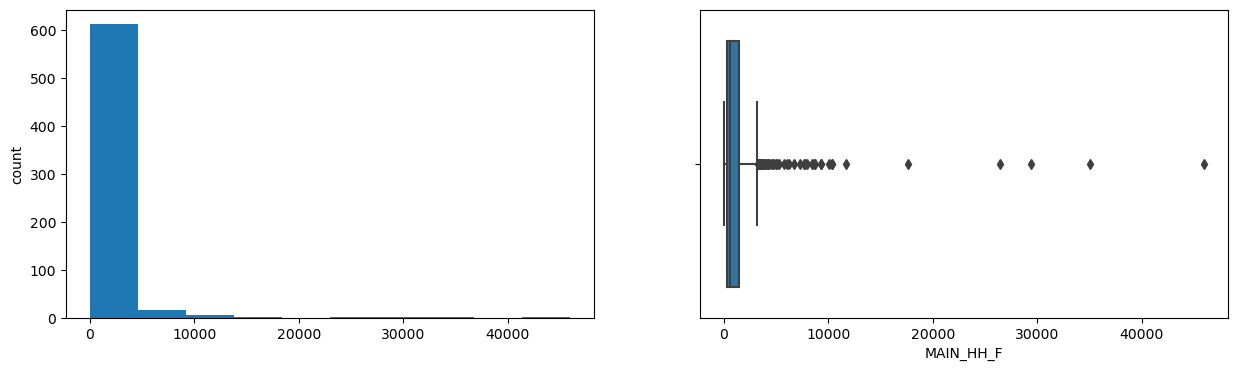

MAIN_OT_M
Skew : 3.89


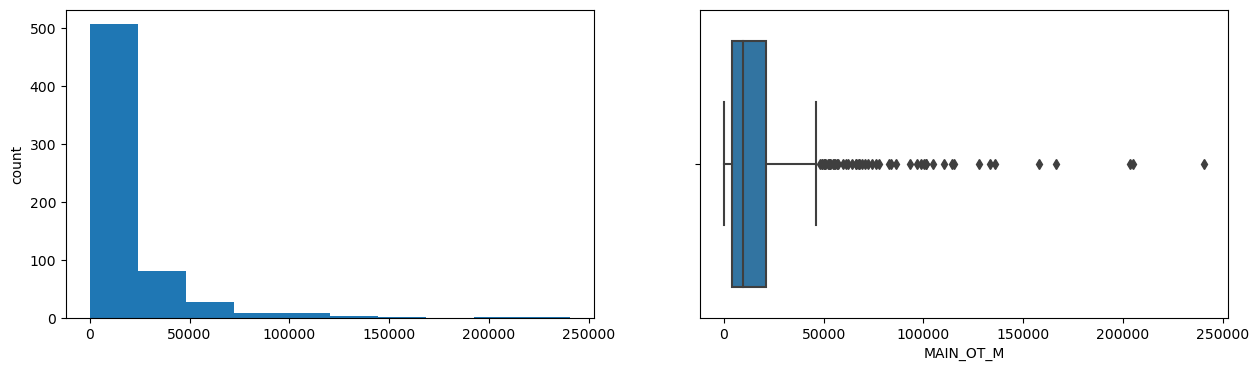

MAIN_OT_F
Skew : 5.34


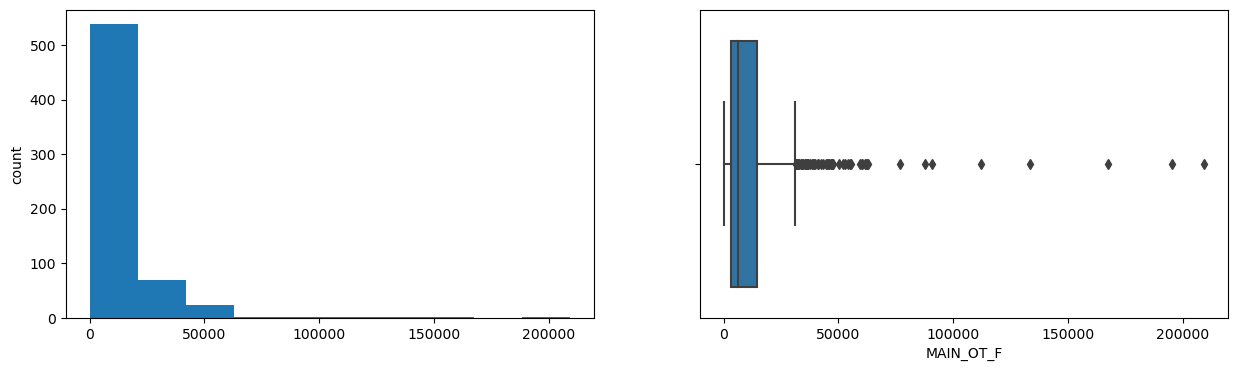

MARGWORK_M
Skew : 2.0


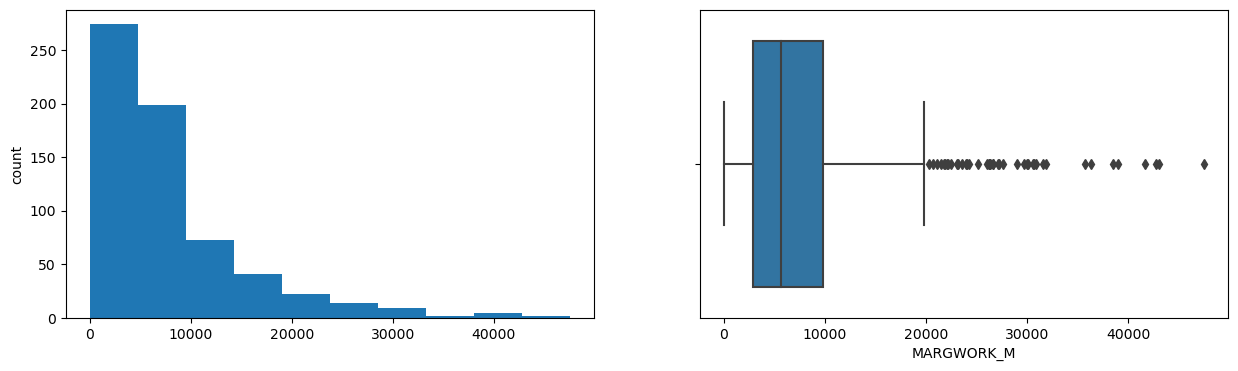

MARGWORK_F
Skew : 1.52


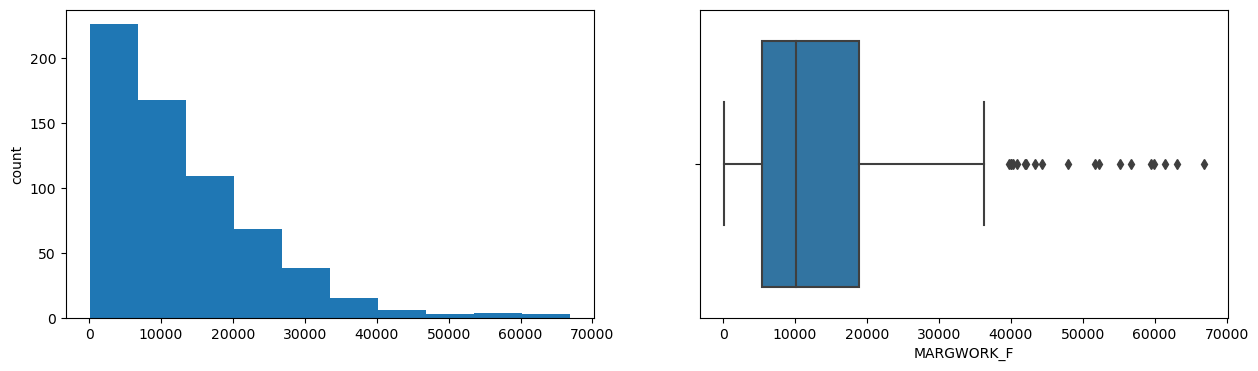

MARG_CL_M
Skew : 3.63


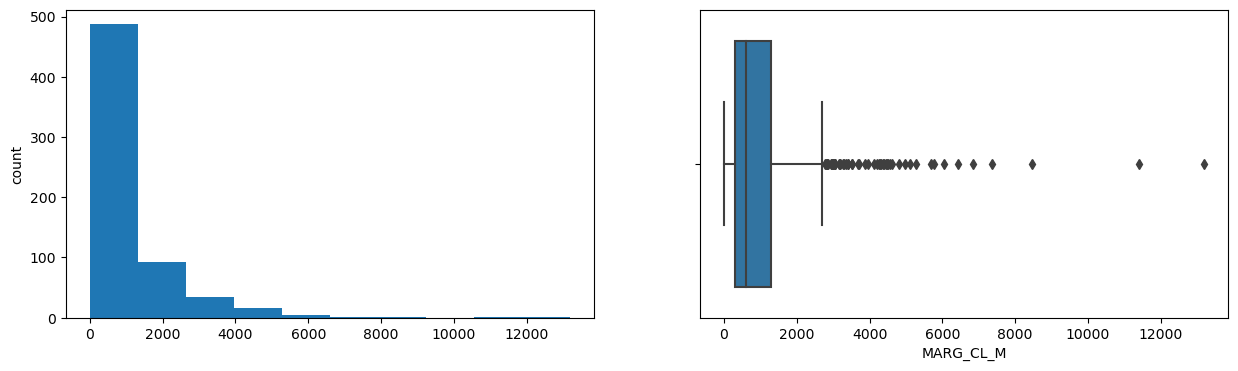

MARG_CL_F
Skew : 5.51


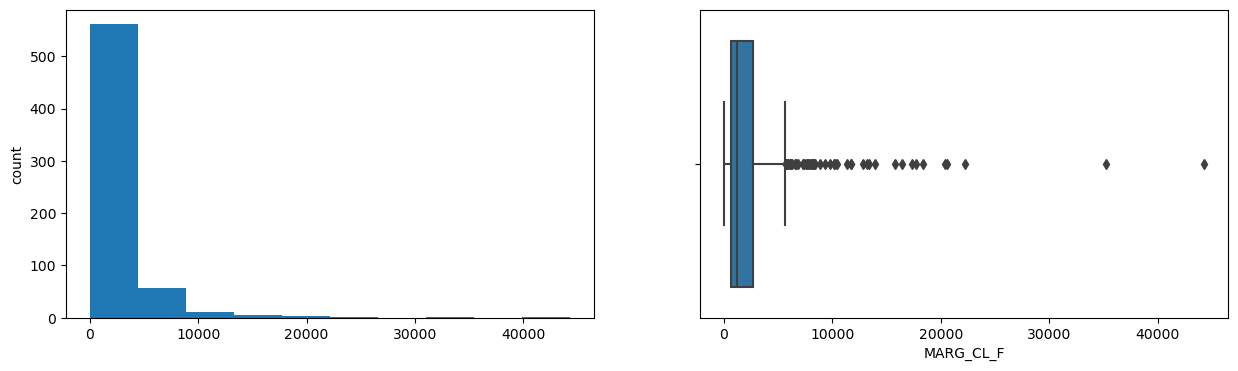

MARG_AL_M
Skew : 2.22


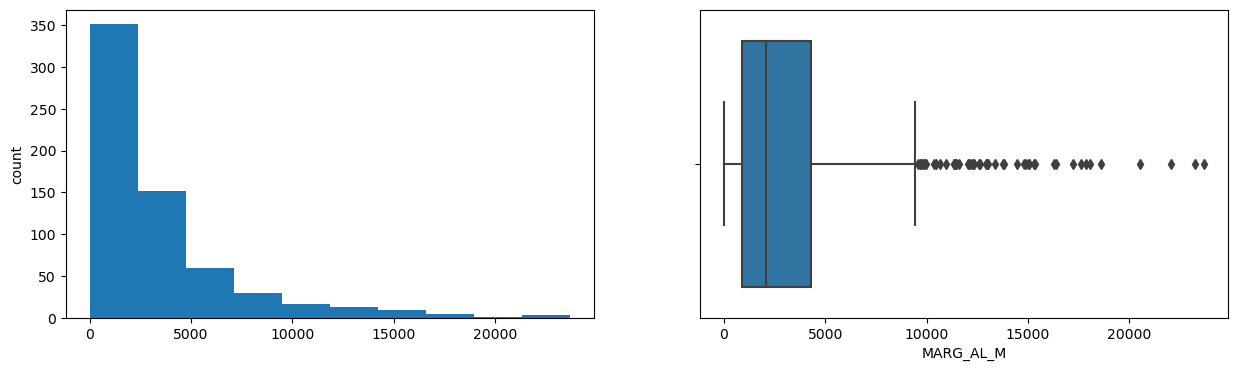

MARG_AL_F
Skew : 1.72


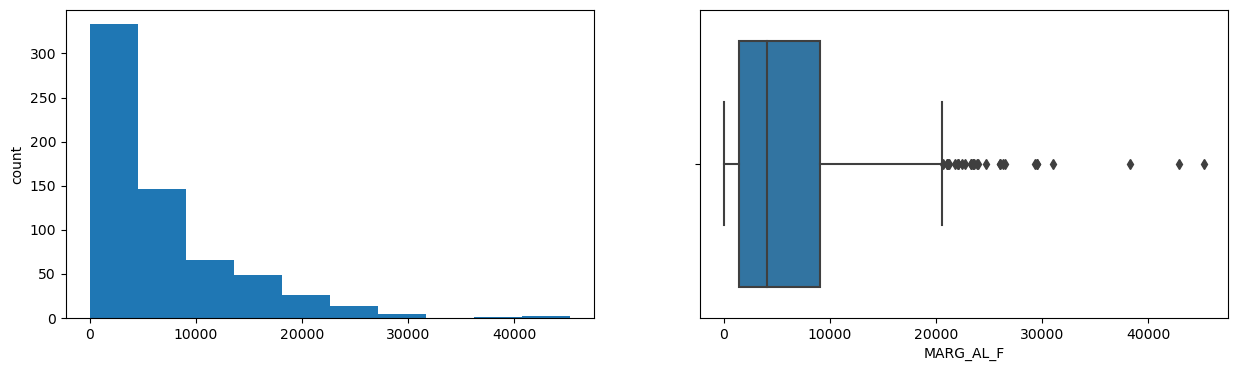

MARG_HH_M
Skew : 3.88


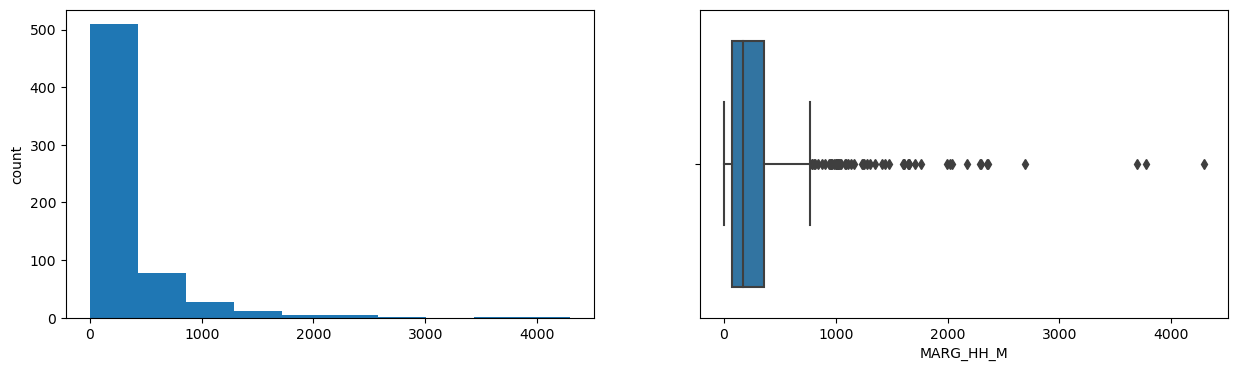

MARG_HH_F
Skew : 5.36


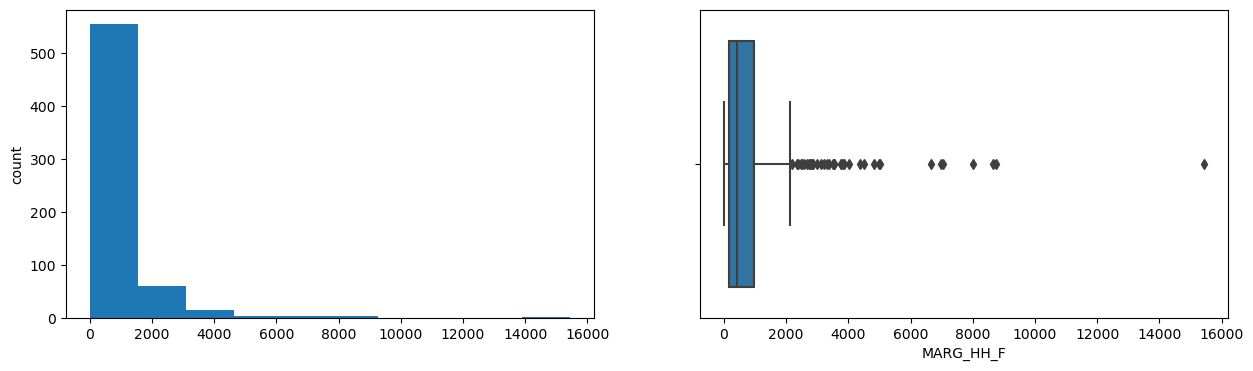

MARG_OT_M
Skew : 2.7


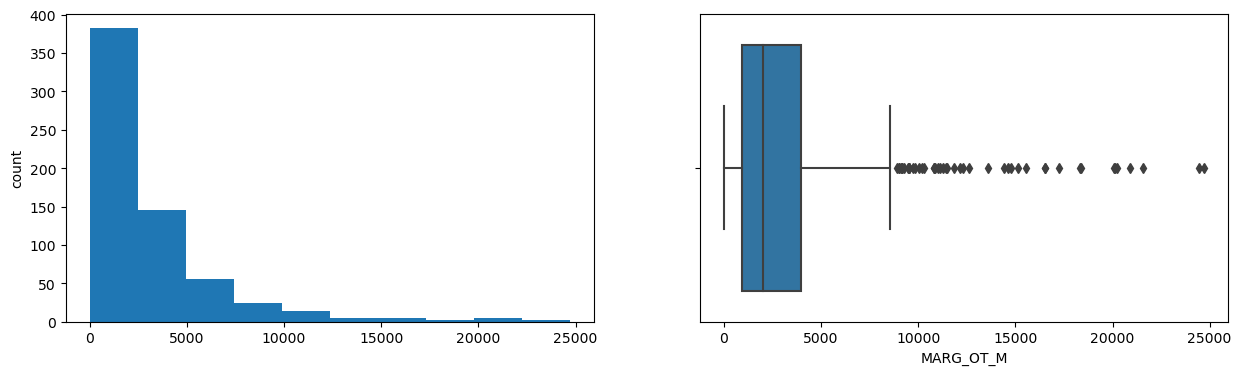

MARG_OT_F
Skew : 3.06


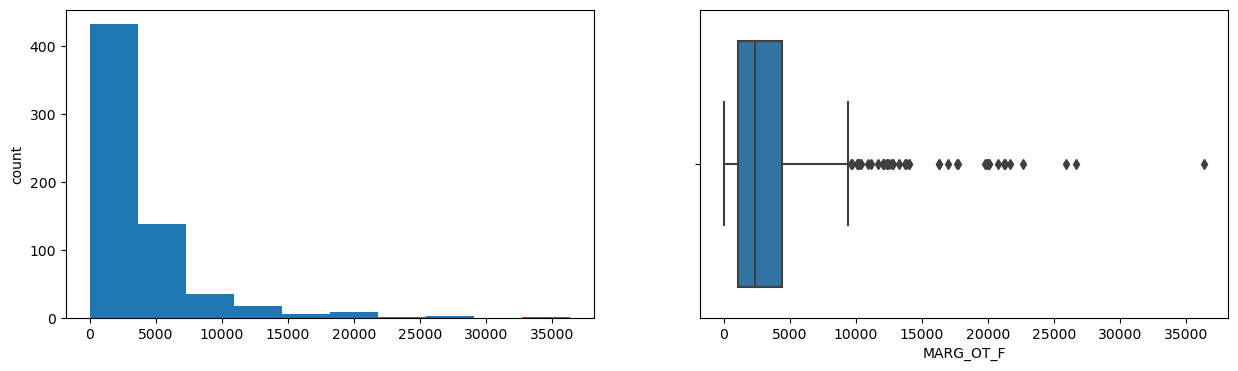

MARGWORK_3_6_M
Skew : 2.15


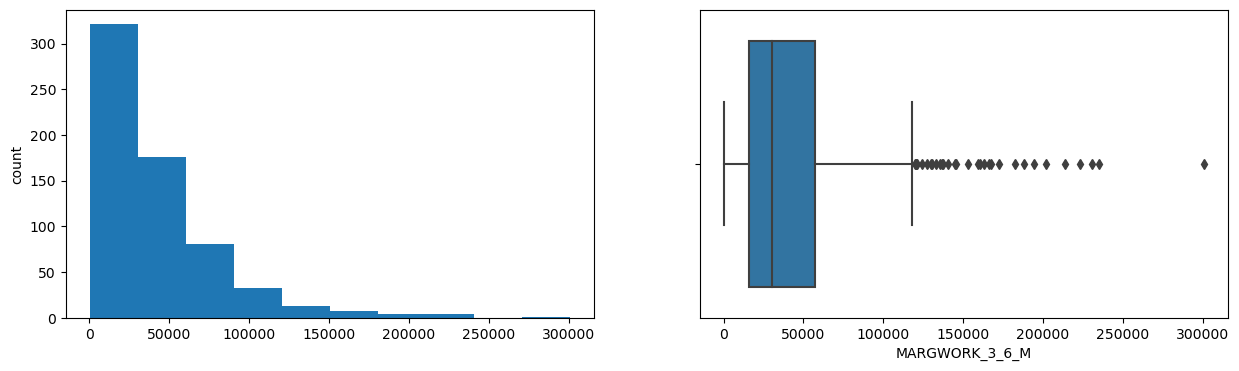

MARGWORK_3_6_F
Skew : 2.54


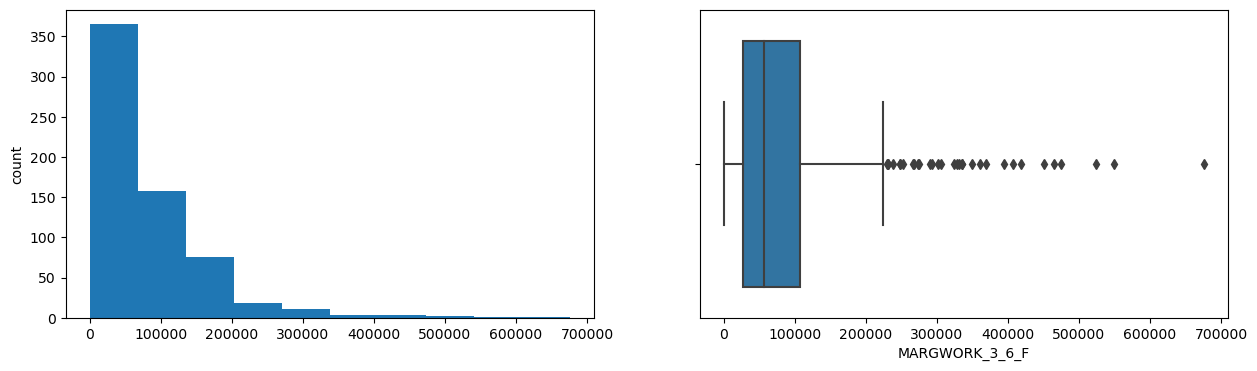

MARG_CL_3_6_M
Skew : 1.89


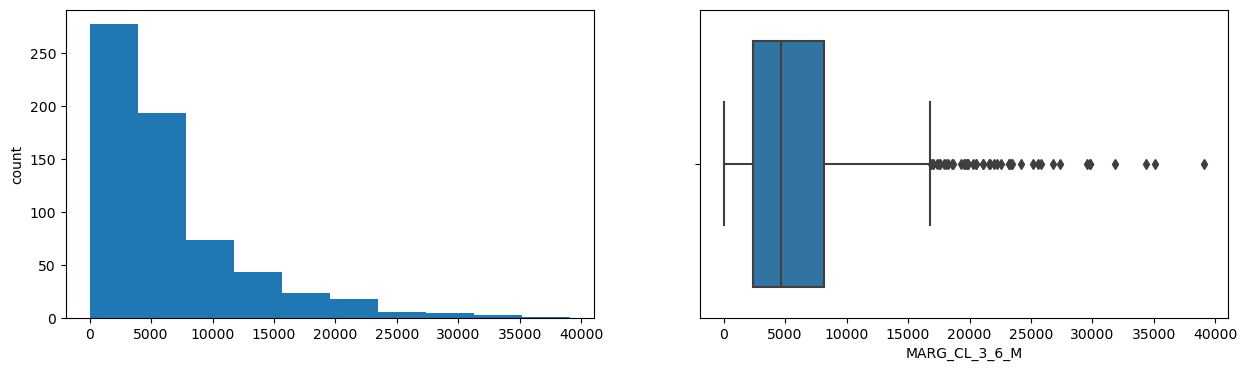

MARG_CL_3_6_F
Skew : 1.35


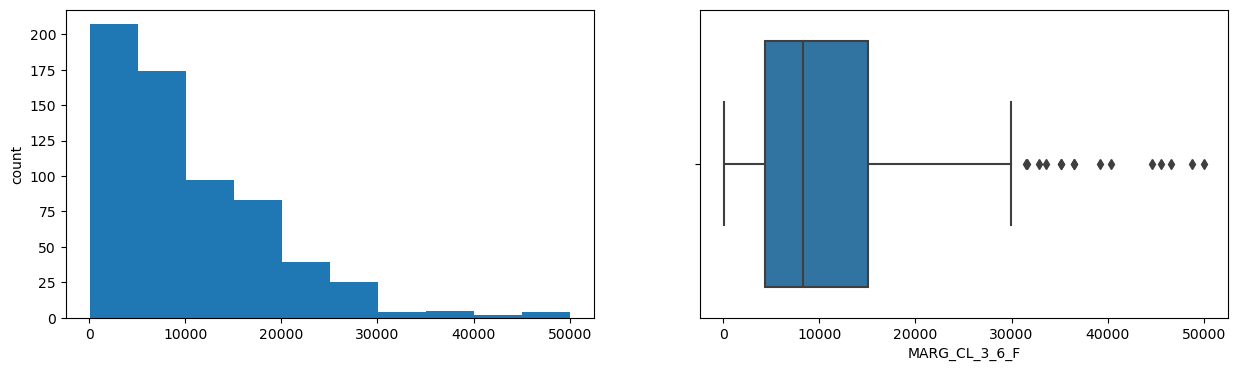

MARG_AL_3_6_M
Skew : 2.83


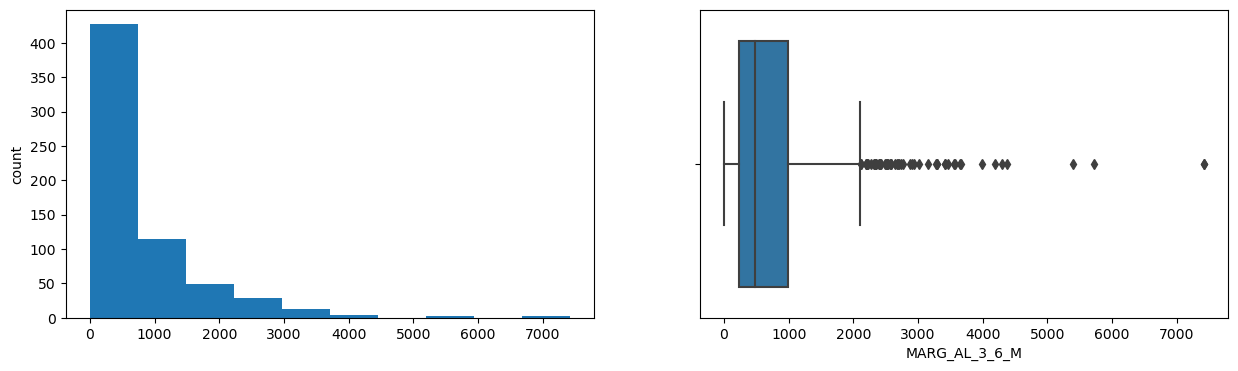

MARG_AL_3_6_F
Skew : 4.72


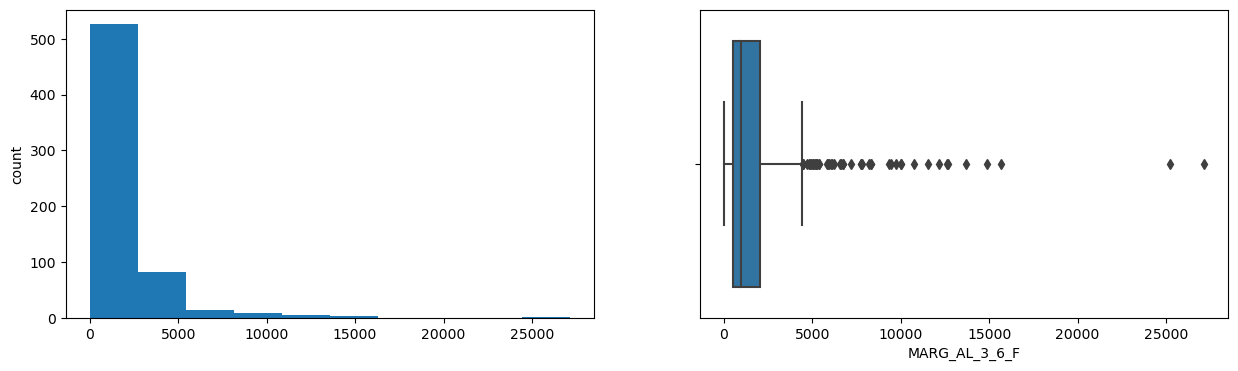

MARG_HH_3_6_M
Skew : 2.07


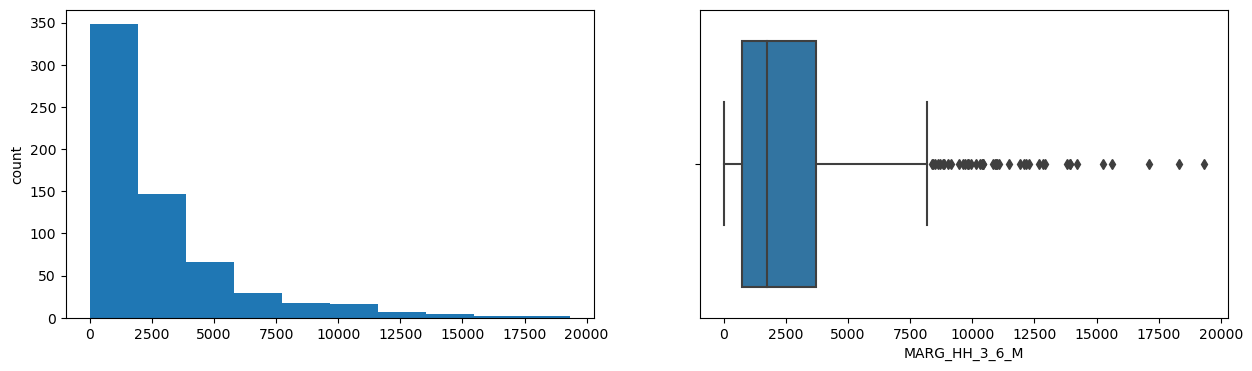

MARG_HH_3_6_F
Skew : 1.59


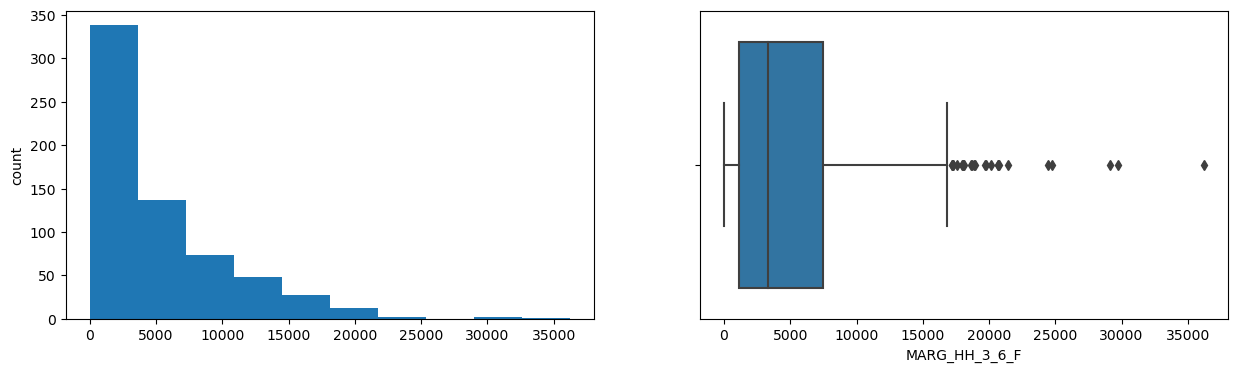

MARG_OT_3_6_M
Skew : 3.99


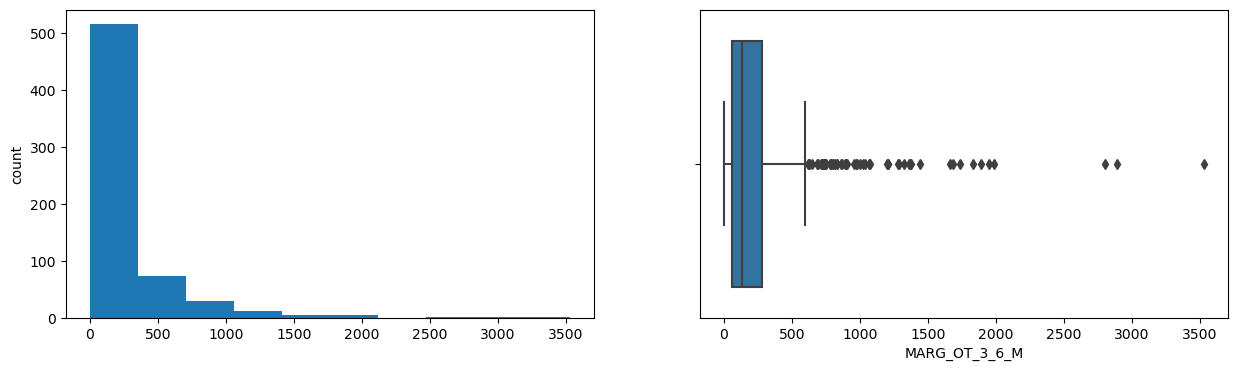

MARG_OT_3_6_F
Skew : 5.61


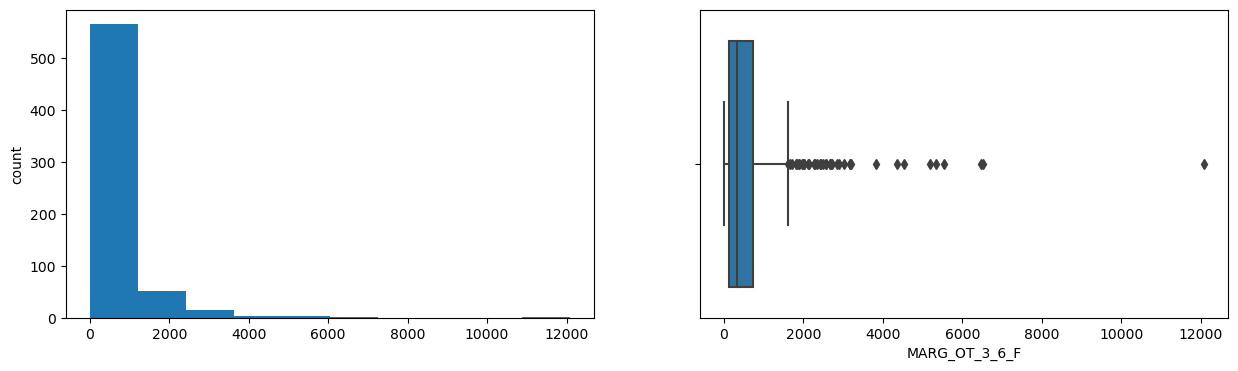

MARGWORK_0_3_M
Skew : 2.69


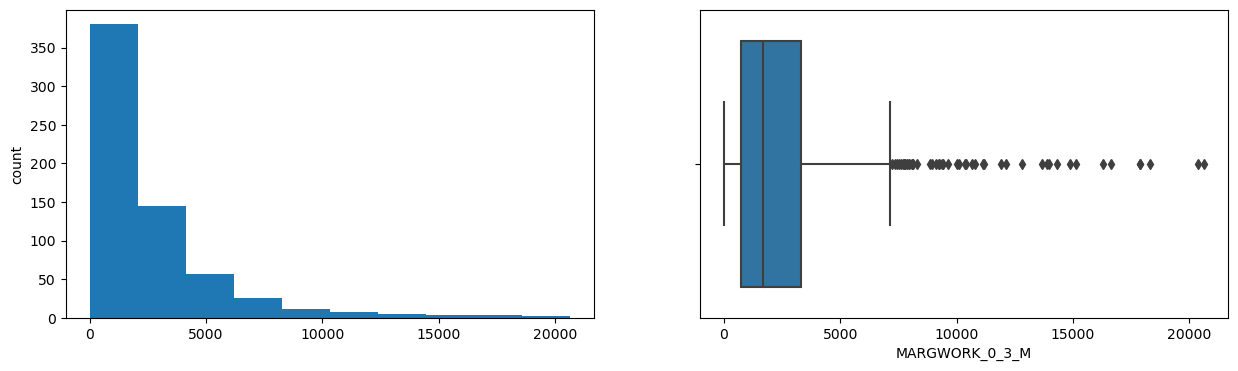

MARGWORK_0_3_F
Skew : 3.04


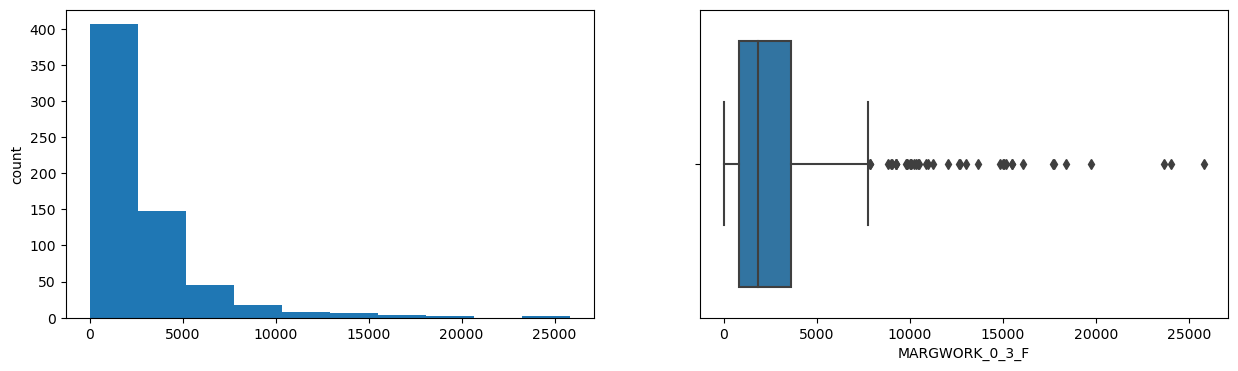

MARG_CL_0_3_M
Skew : 2.65


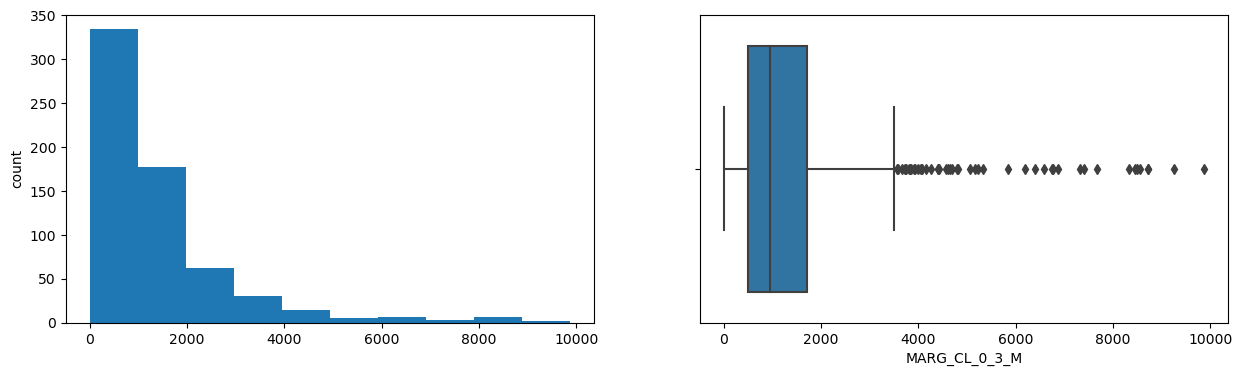

MARG_CL_0_3_F
Skew : 2.47


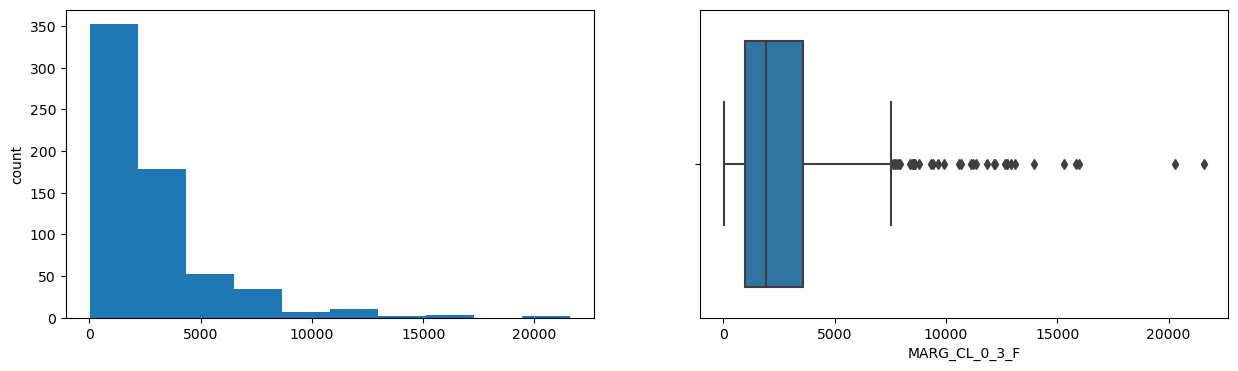

MARG_AL_0_3_M
Skew : 5.81


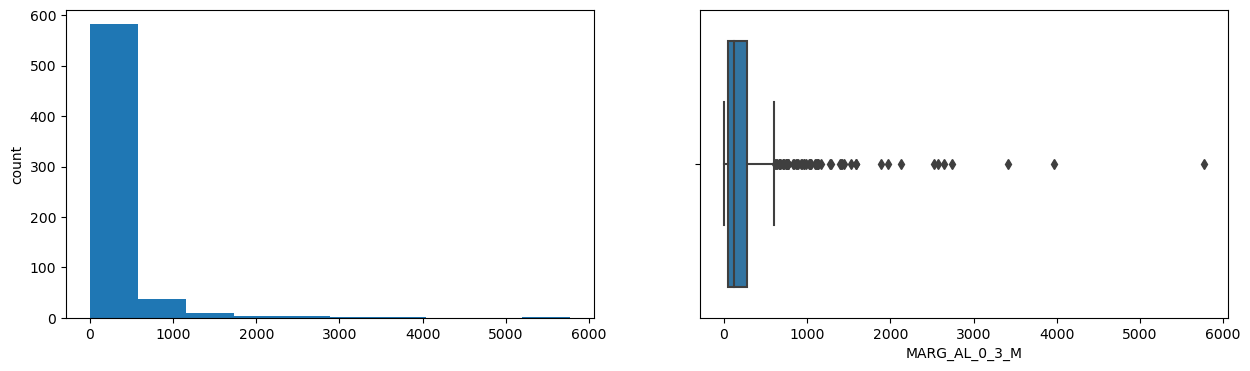

MARG_AL_0_3_F
Skew : 7.69


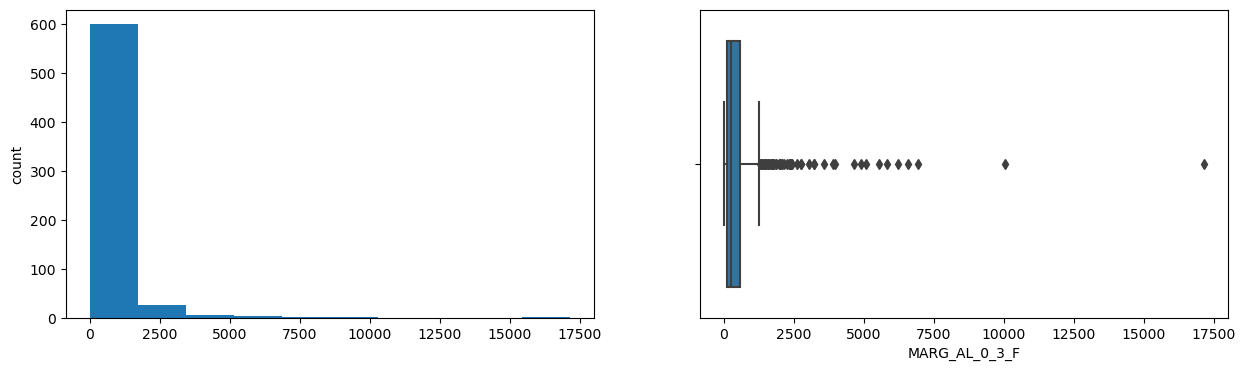

MARG_HH_0_3_M
Skew : 3.09


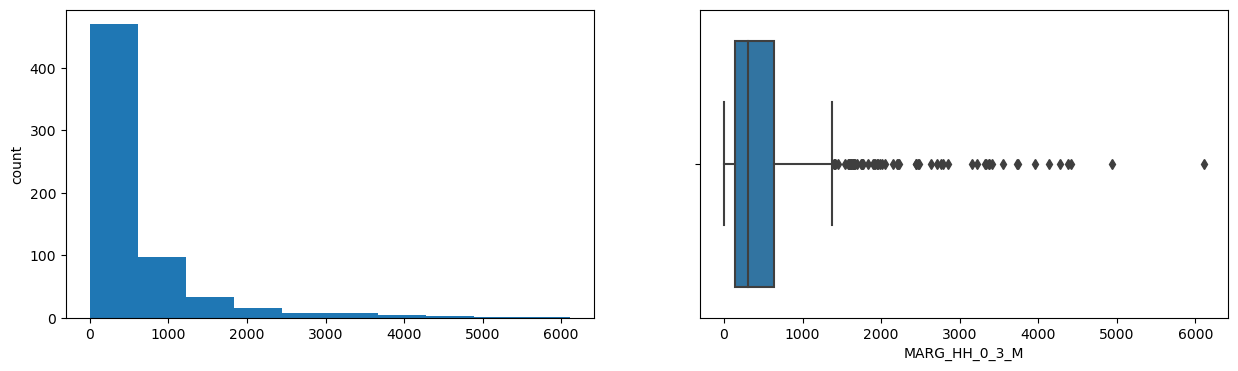

MARG_HH_0_3_F
Skew : 2.62


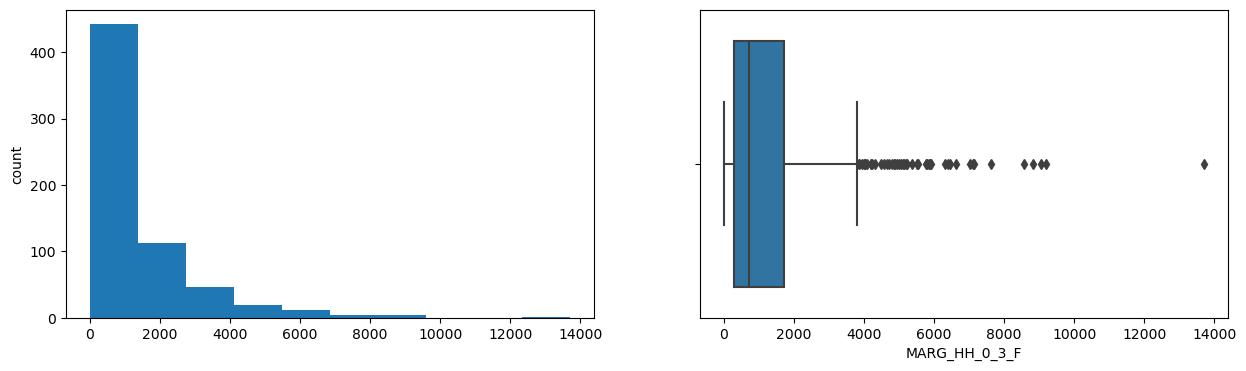

MARG_OT_0_3_M
Skew : 3.81


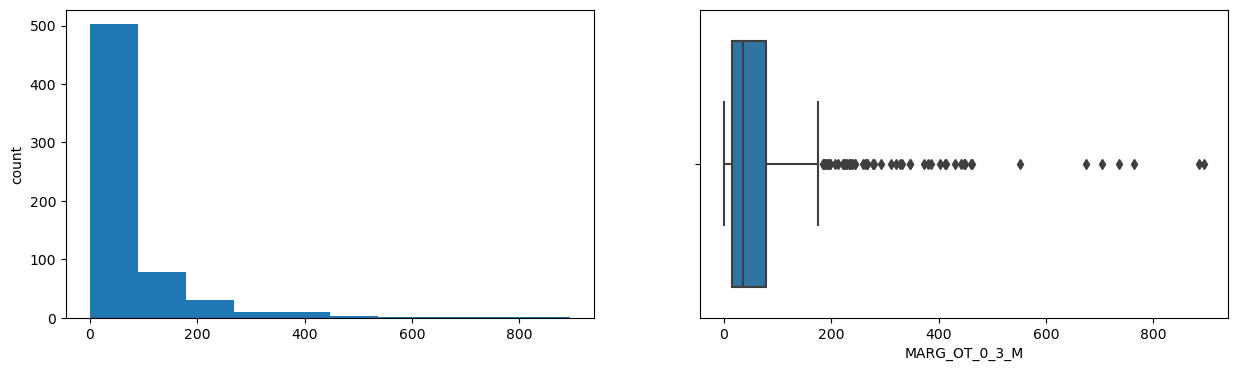

MARG_OT_0_3_F
Skew : 4.74


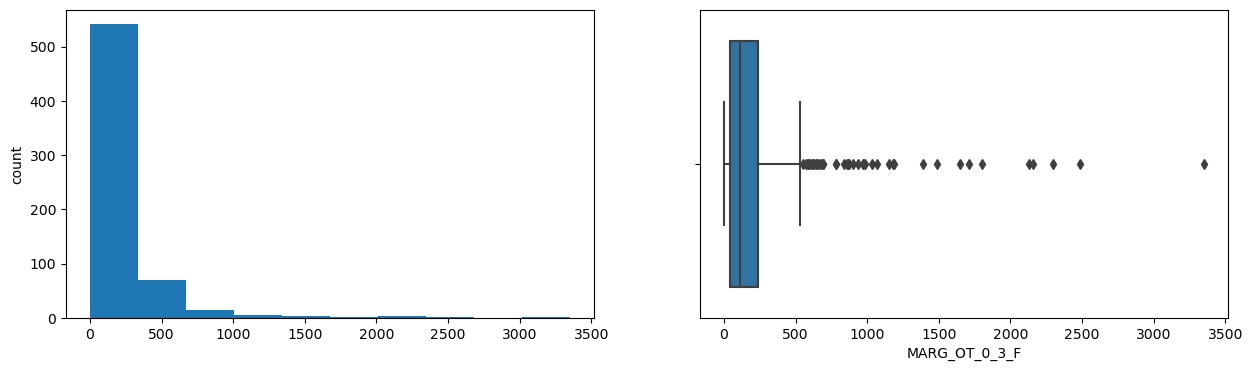

NON_WORK_M
Skew : 3.63


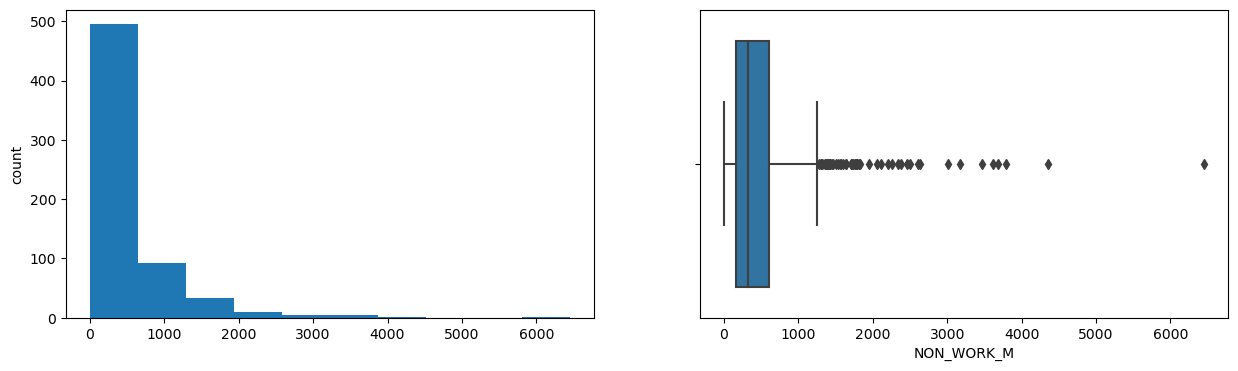

NON_WORK_F
Skew : 4.8


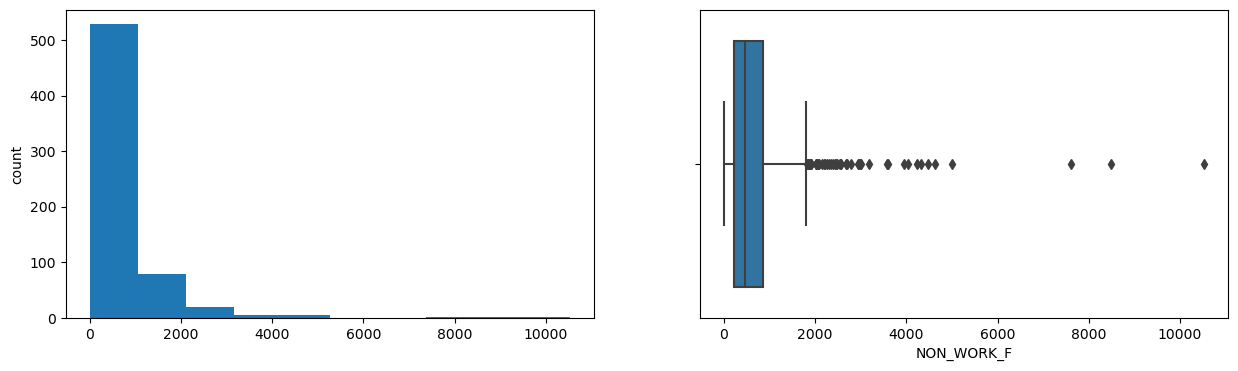

Gender Ratio
Skew : 0.7


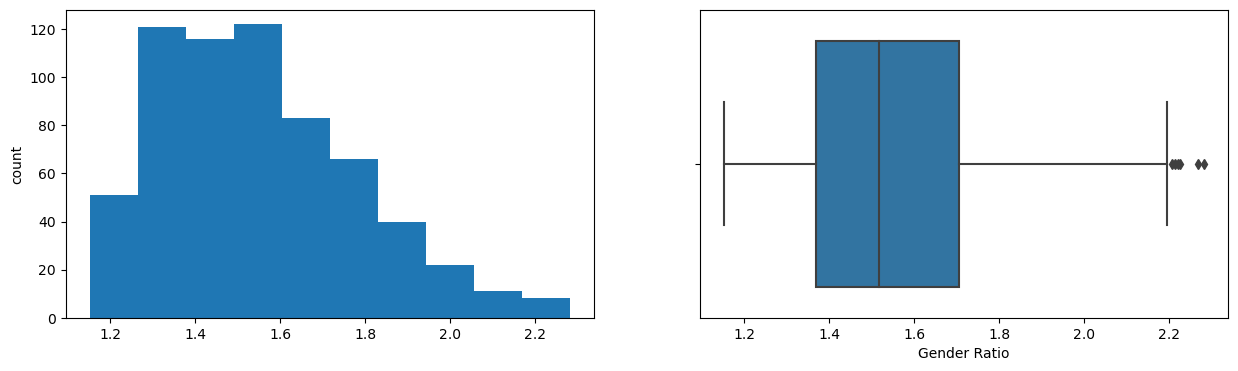

In [174]:
for col in data_df.columns:
    print(col)
    print('Skew :',round(data_df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data_df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data_df[col])
    plt.show()

In [175]:
#Scale the data
from scipy.stats import zscore
scaled_data = data_df.apply(zscore)

In [176]:
scaled_data.head()

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0 -0.904738 -0.771236 -0.815563 -0.561012 -0.507738 -0.958575 -0.957049   
1 -0.935695 -0.823100 -0.874534 -0.681096 -0.725367 -0.958297 -0.956772   
2 -0.972412 -1.000919 -0.981466 -0.976956 -0.965262 -0.958575 -0.956772   
3 -1.037530 -1.052224 -1.041001 -1.022118 -0.995393 -0.958783 -0.957049   
4 -0.822676 -0.809381 -0.813933 -0.622359 -0.649908 -0.957395 -0.955529   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0 -0.423306 -0.476423 -0.798097  ...      -0.720610      -0.156494   
1 -0.582014 -0.607607 -0.849434  ...      -0.732811      -0.282327   
2 -0.038951 -0.027273 -0.956457  ...      -0.921931      -0.456727   
3 -0.355965 -0.390060 -1.004643  ...      -0.900758      -0.419198   
4  0.149238  0.043330 -0.800568  ...      -0.297513       0.472670   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0      -0.287524       0.156577      -0.657412      -0.365258      -0.499977   
1      -0.294688      -0.491731      -0.723062       0.042855      -0.073481   
2      -0.420050      -0.731894      -0.795026      -0.662068      -0.635680   
3      -0.385127      -0.718770      -0.784926      -0.624966      -0.616294   
4       0.434200      -0.466796      -0.625849      -0.439461      -0.309346   

   NON_WORK_M  NON_WORK_F  Gender Ratio  
0   -0.413053   -0.539614     -1.221372  
1   -0.606455   -0.598988     -1.633860  
2   -0.726103   -0.707839      0.530326  
3   -0.645791   -0.710038     -0.186818  
4   -0.540895   -0.249344     -0.426032  

[5 rows x 58 columns]

In [177]:
# checking for outliers on scaled data

No_HH
Skew : 2.02


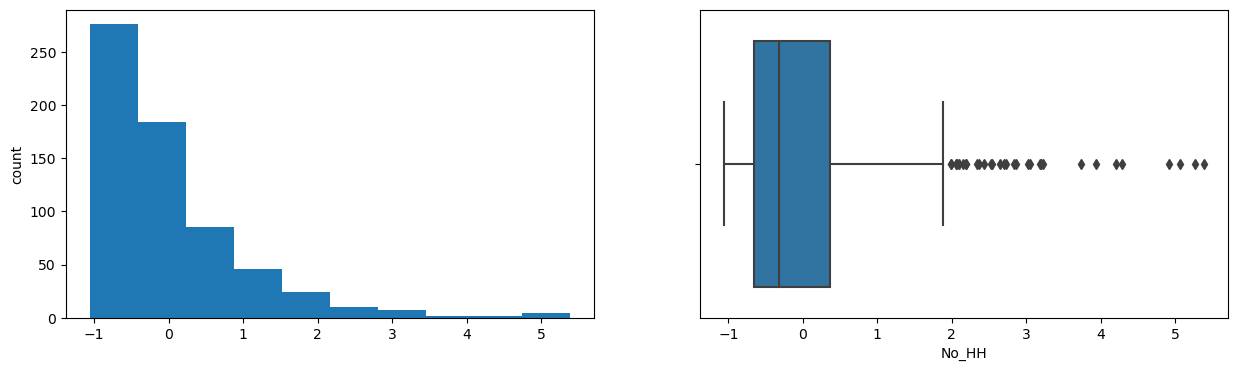

TOT_M
Skew : 2.03


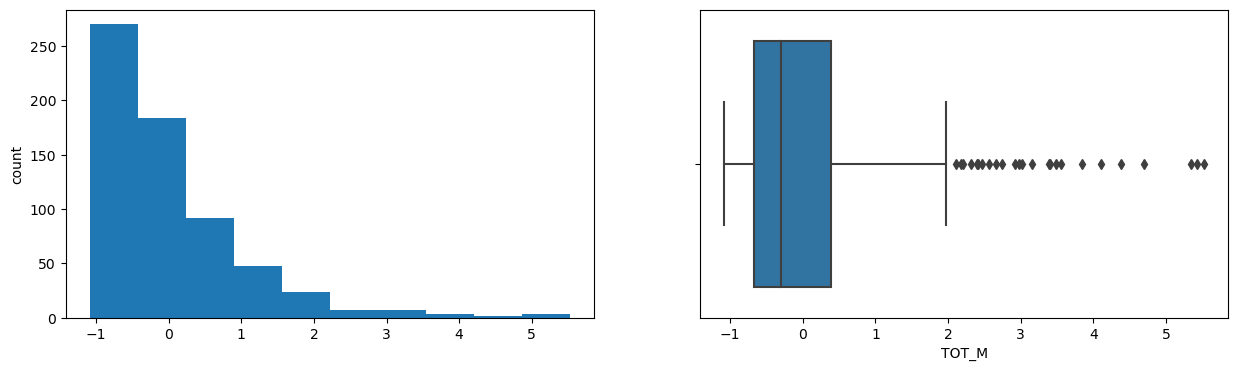

TOT_F
Skew : 2.11


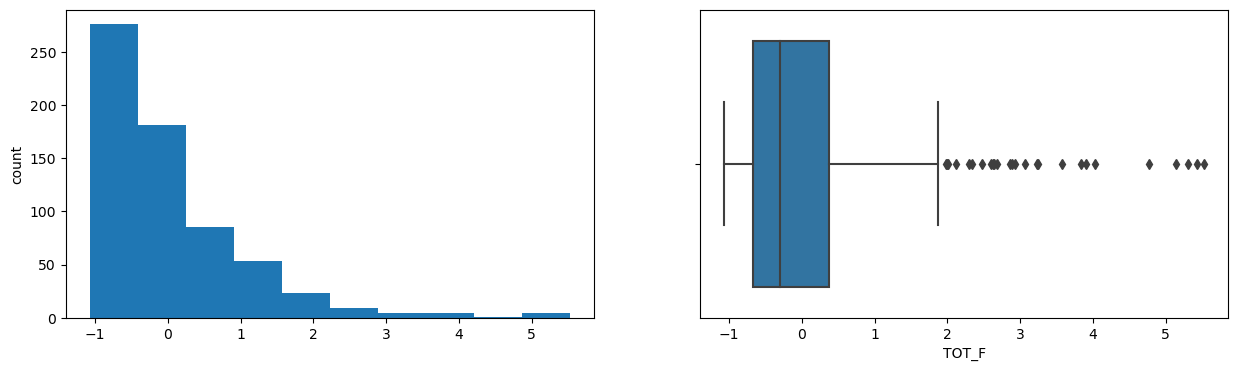

M_06
Skew : 2.19


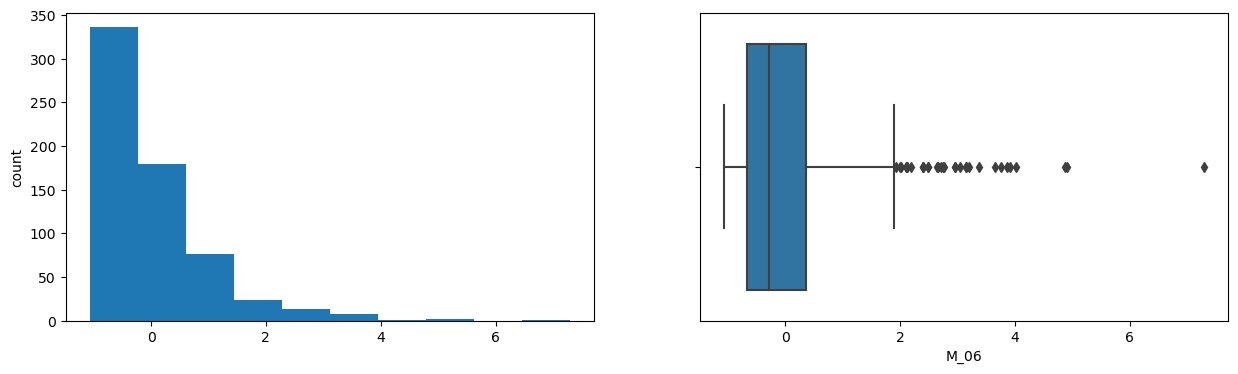

F_06
Skew : 2.23


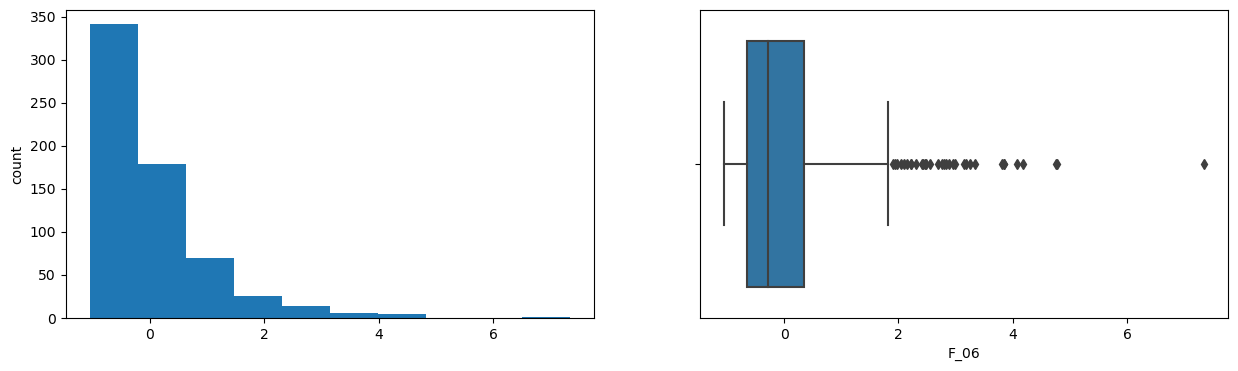

M_SC
Skew : 1.99


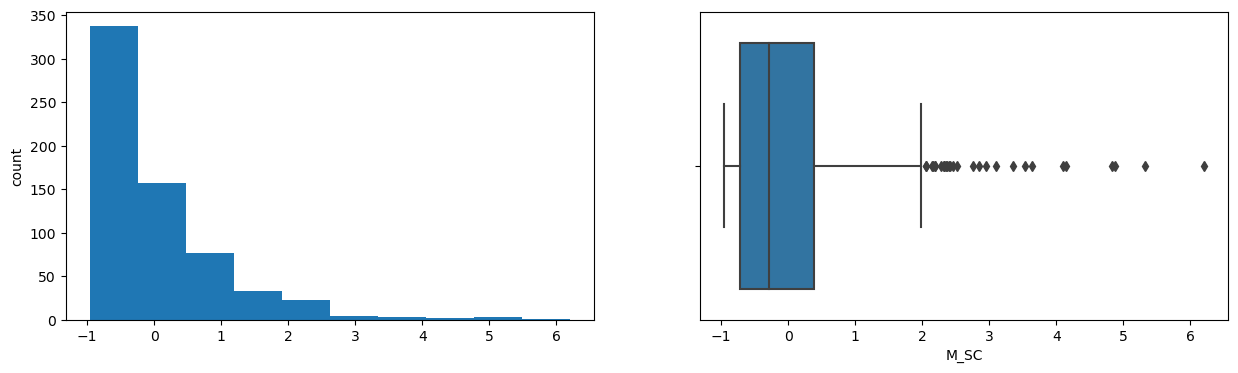

F_SC
Skew : 1.99


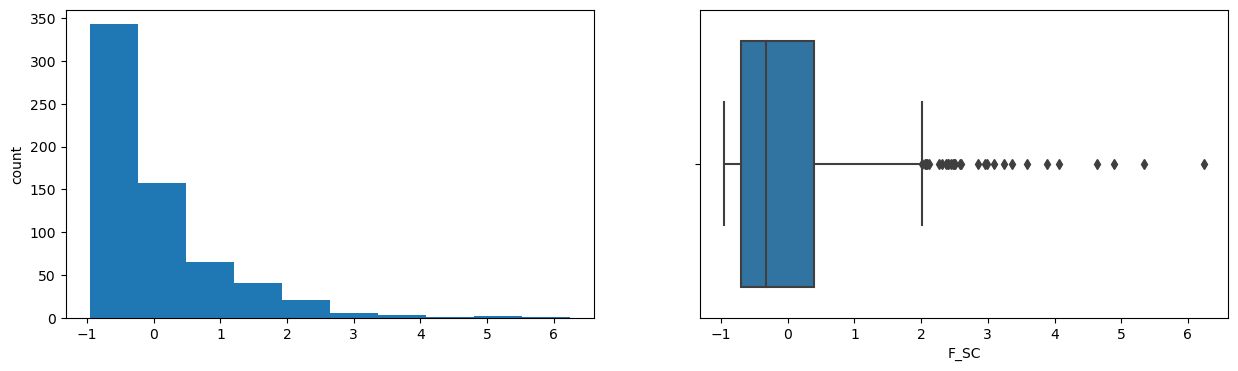

M_ST
Skew : 3.44


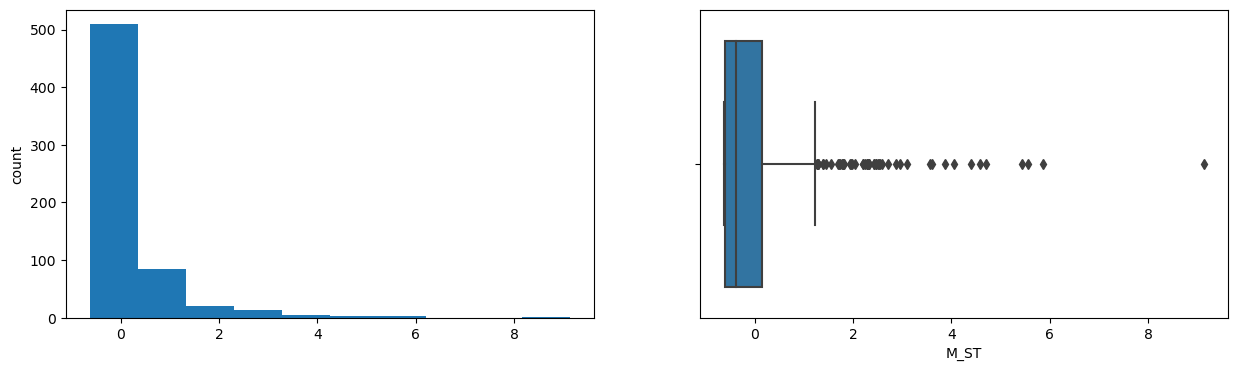

F_ST
Skew : 2.98


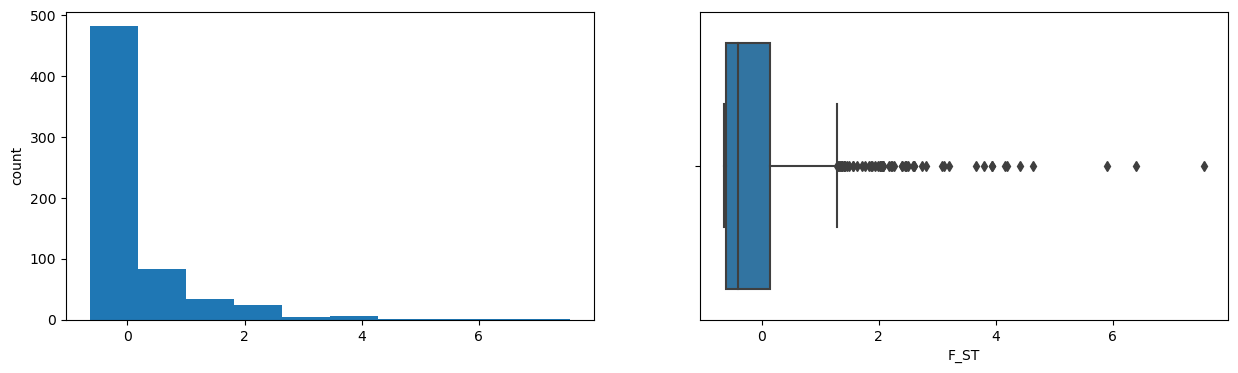

M_LIT
Skew : 2.34


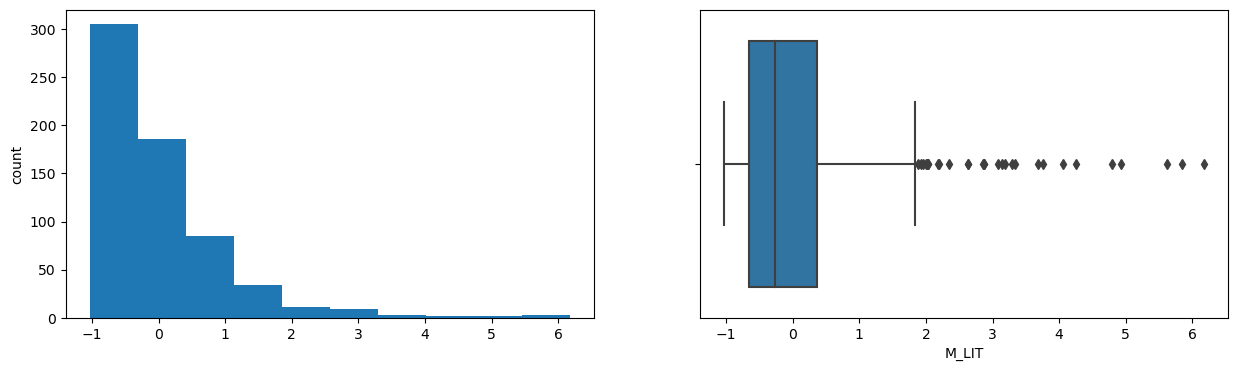

F_LIT
Skew : 3.15


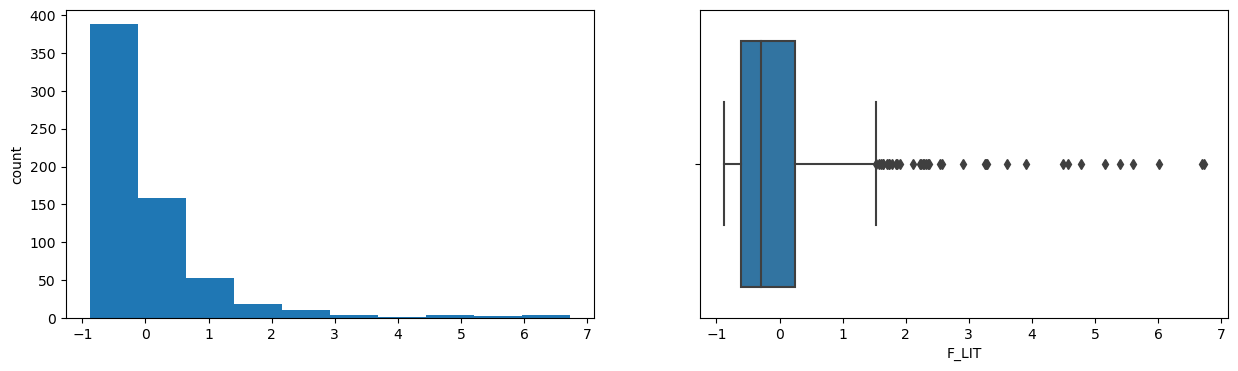

M_ILL
Skew : 1.58


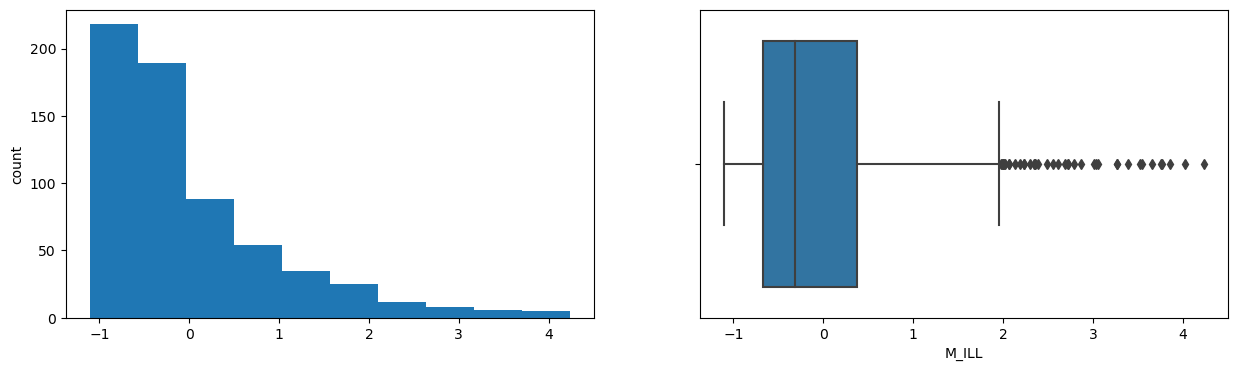

F_ILL
Skew : 1.34


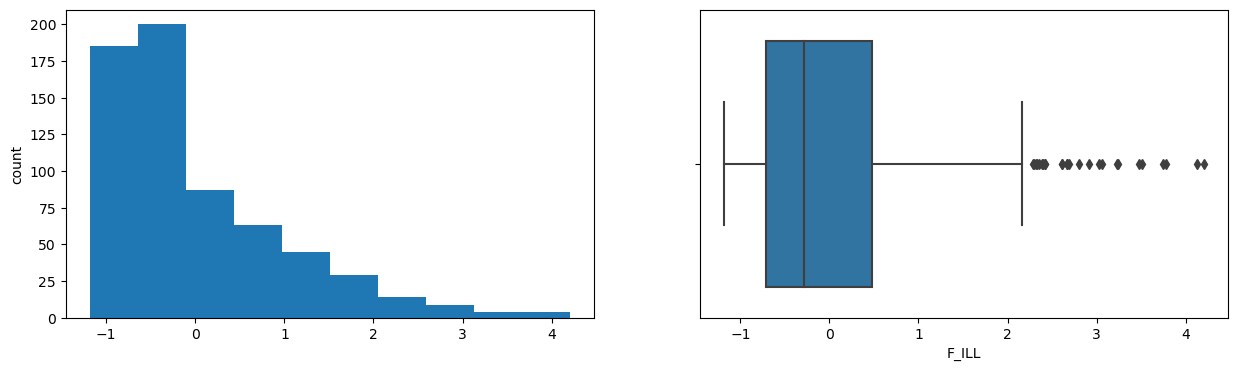

TOT_WORK_M
Skew : 2.3


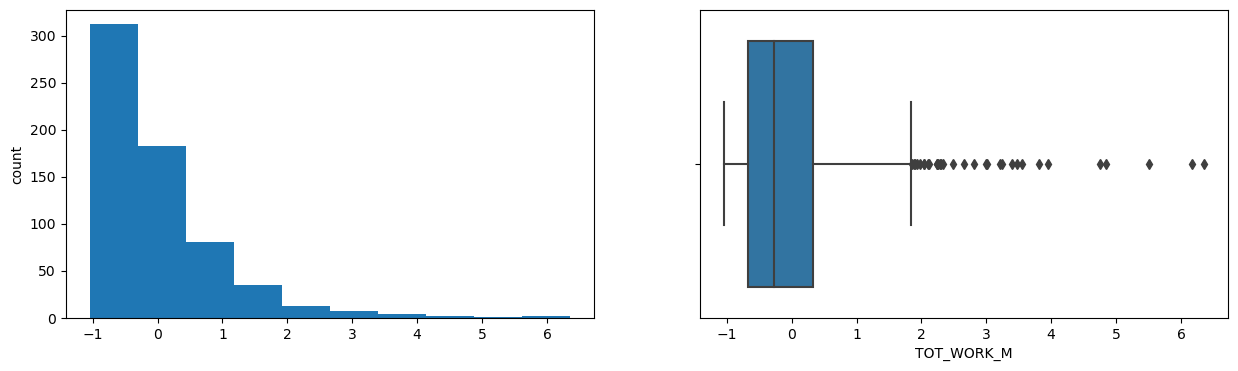

TOT_WORK_F
Skew : 1.93


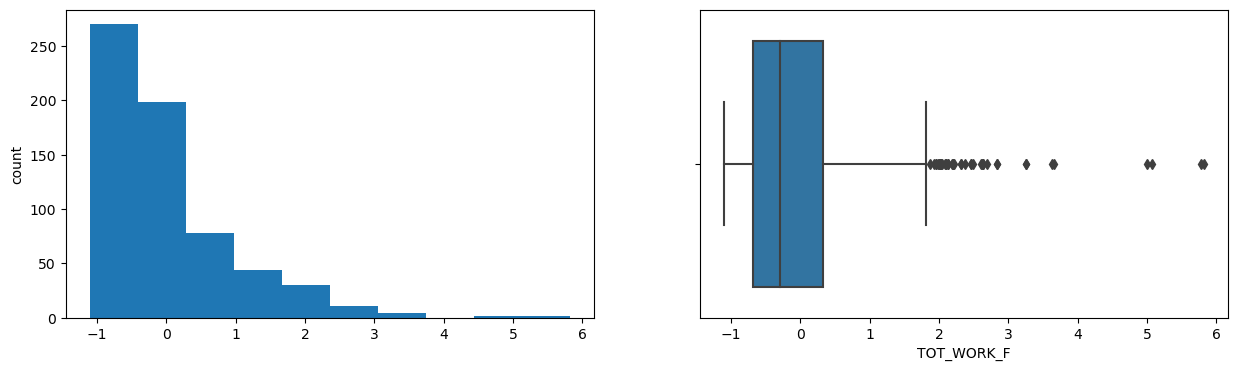

MAINWORK_M
Skew : 2.63


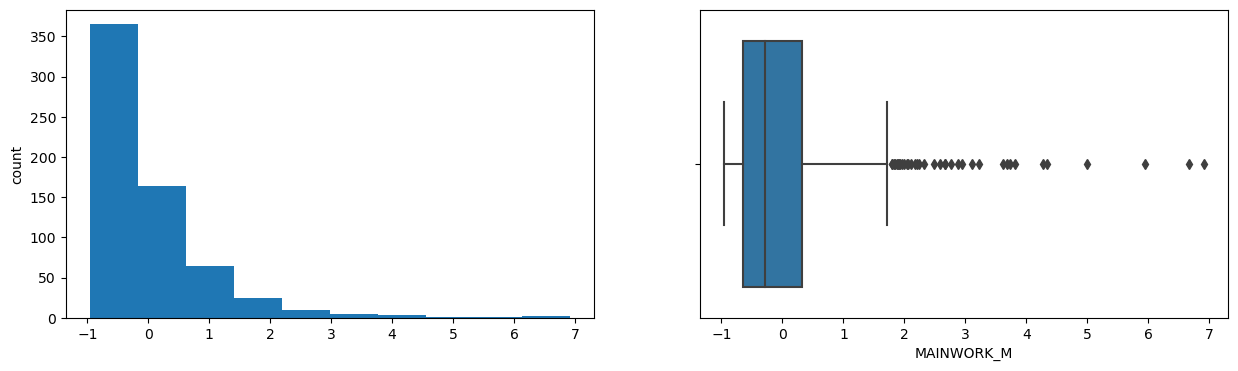

MAINWORK_F
Skew : 2.55


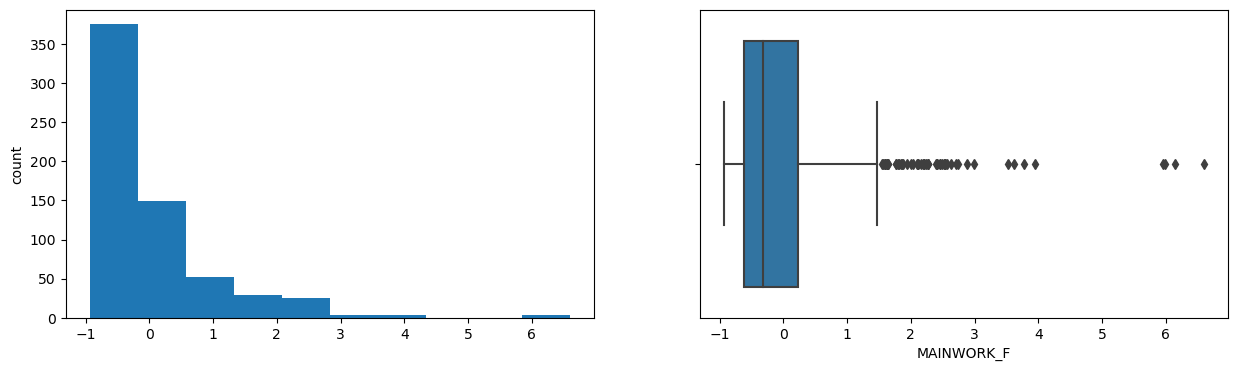

MAIN_CL_M
Skew : 1.68


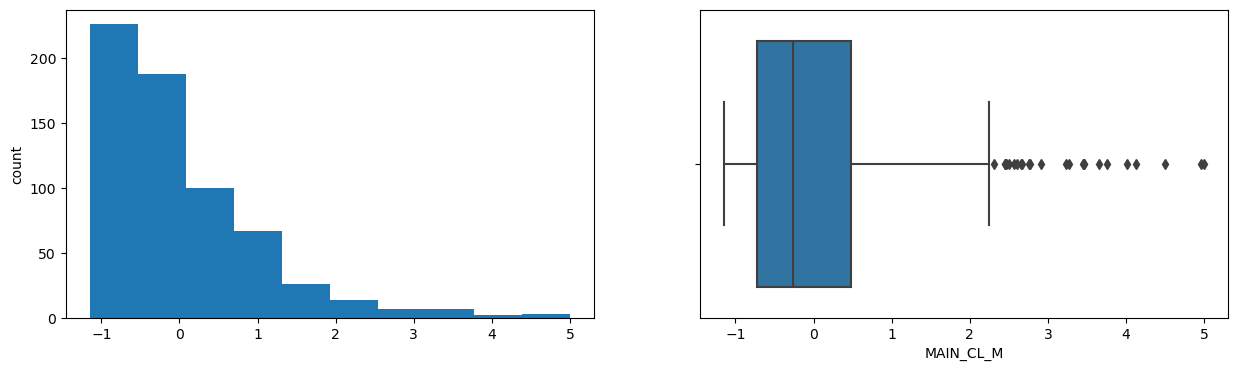

MAIN_CL_F
Skew : 2.38


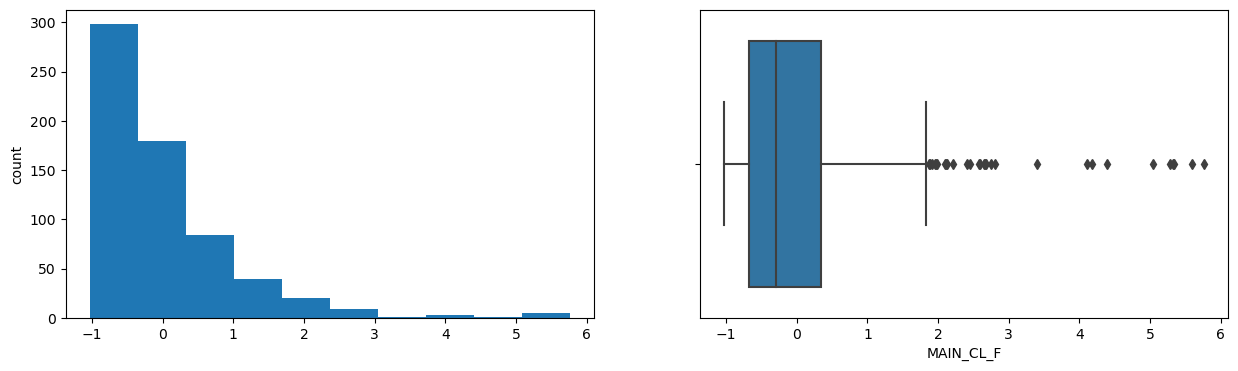

MAIN_AL_M
Skew : 1.88


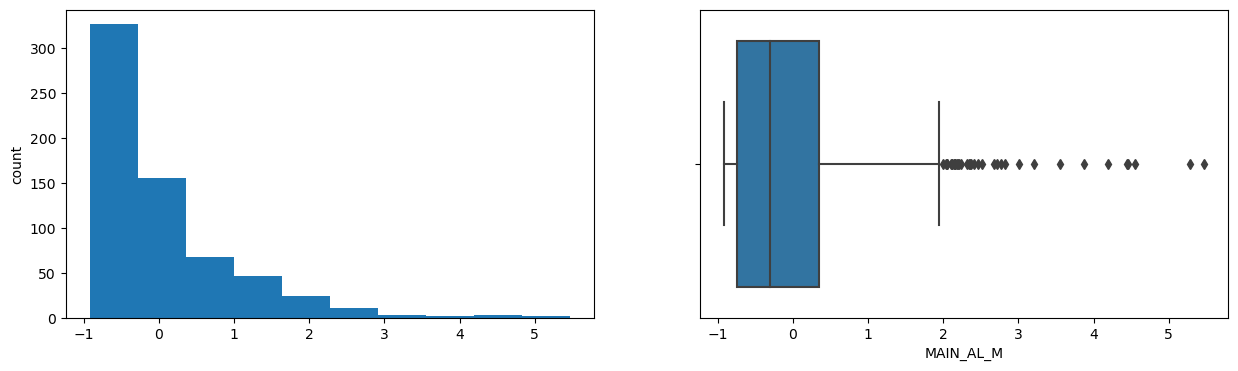

MAIN_AL_F
Skew : 2.72


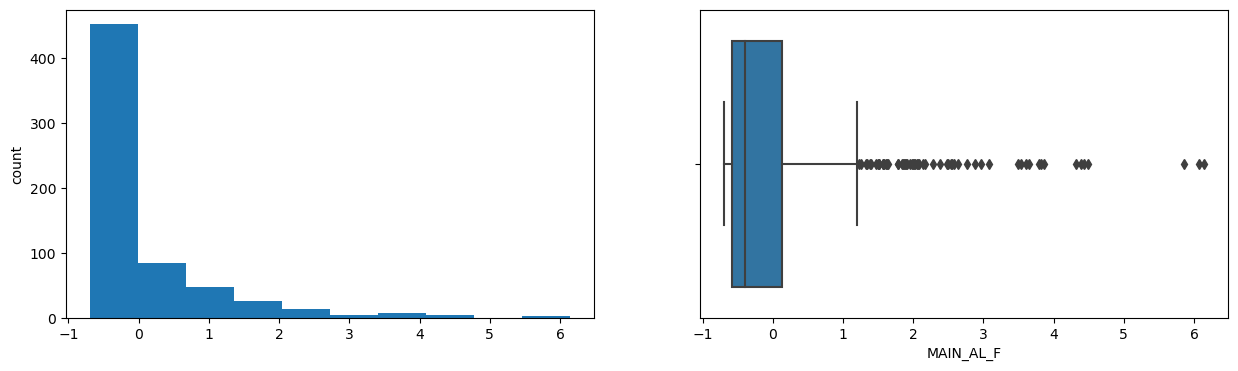

MAIN_HH_M
Skew : 4.88


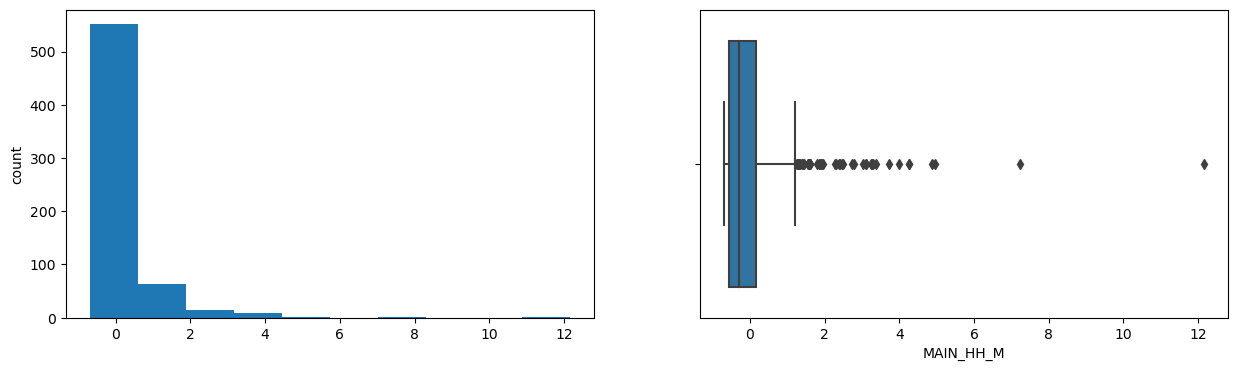

MAIN_HH_F
Skew : 8.58


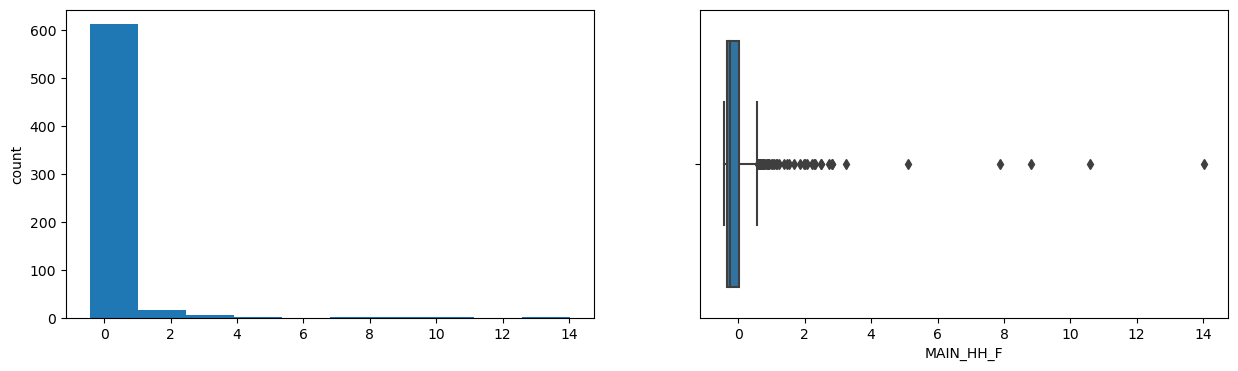

MAIN_OT_M
Skew : 3.89


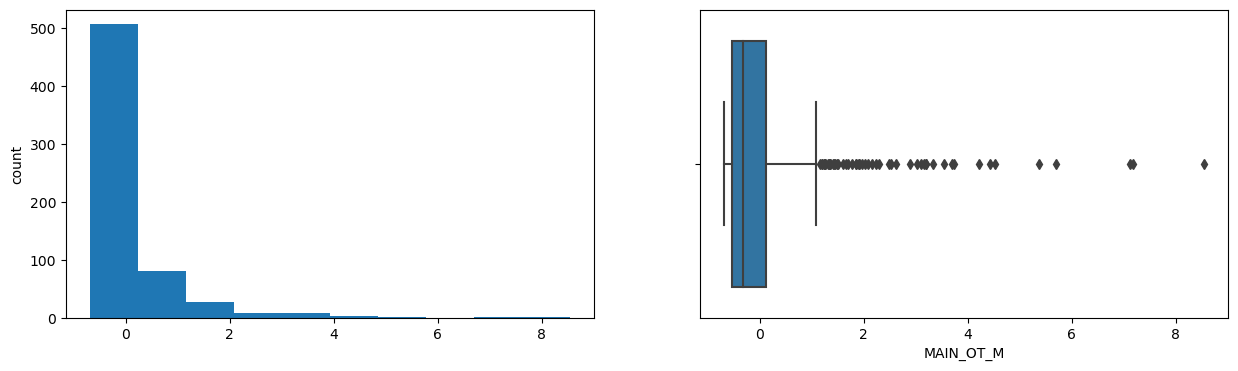

MAIN_OT_F
Skew : 5.34


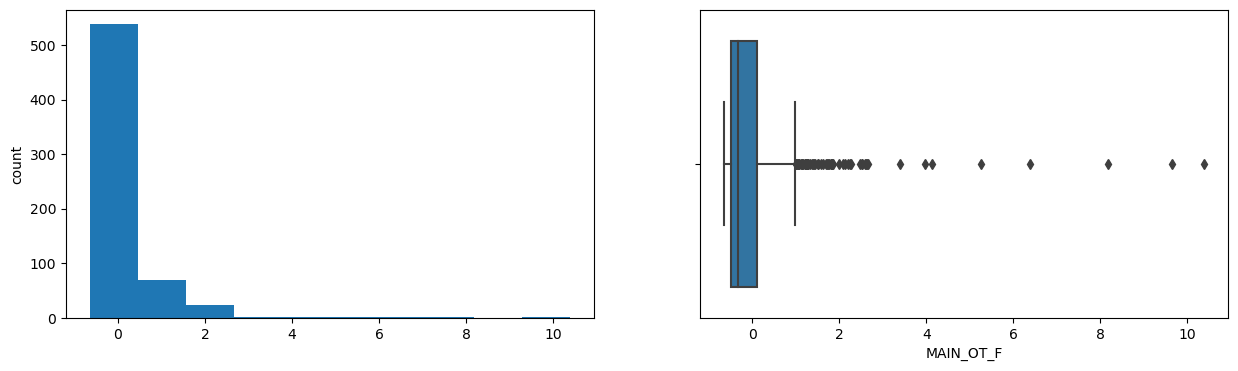

MARGWORK_M
Skew : 2.0


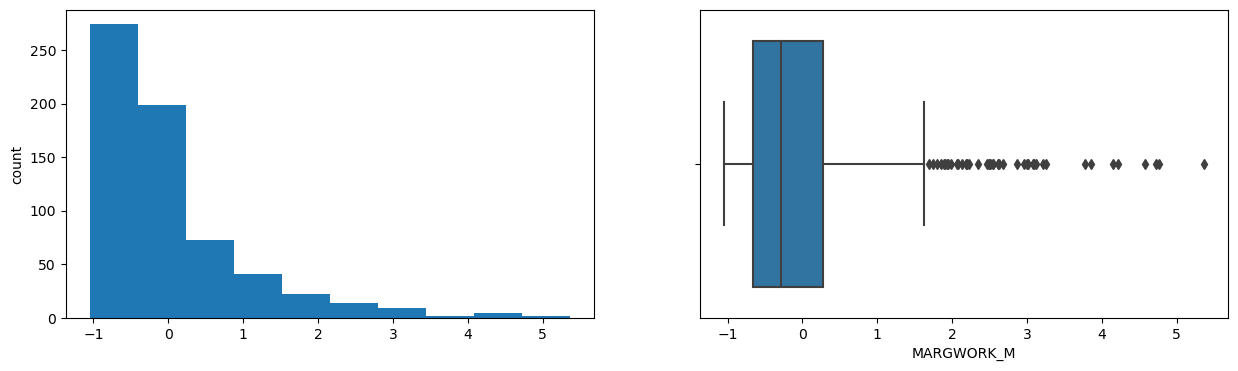

MARGWORK_F
Skew : 1.52


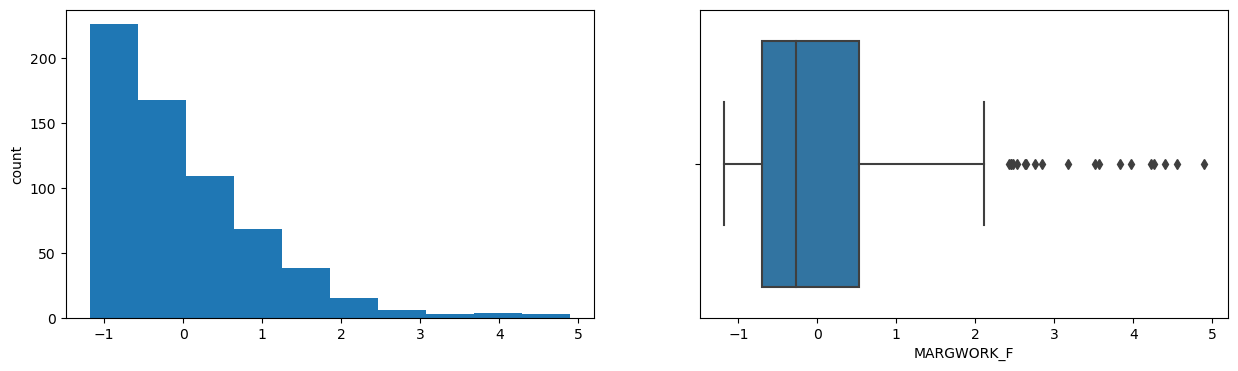

MARG_CL_M
Skew : 3.63


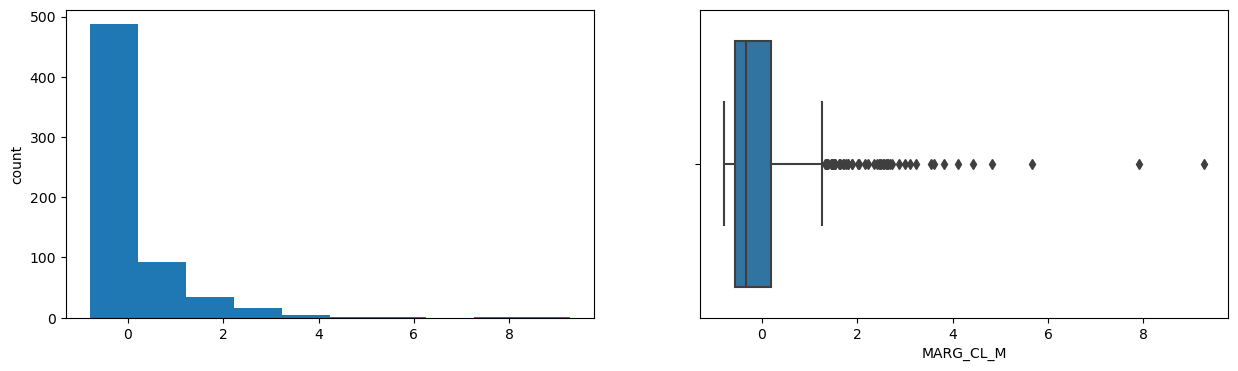

MARG_CL_F
Skew : 5.51


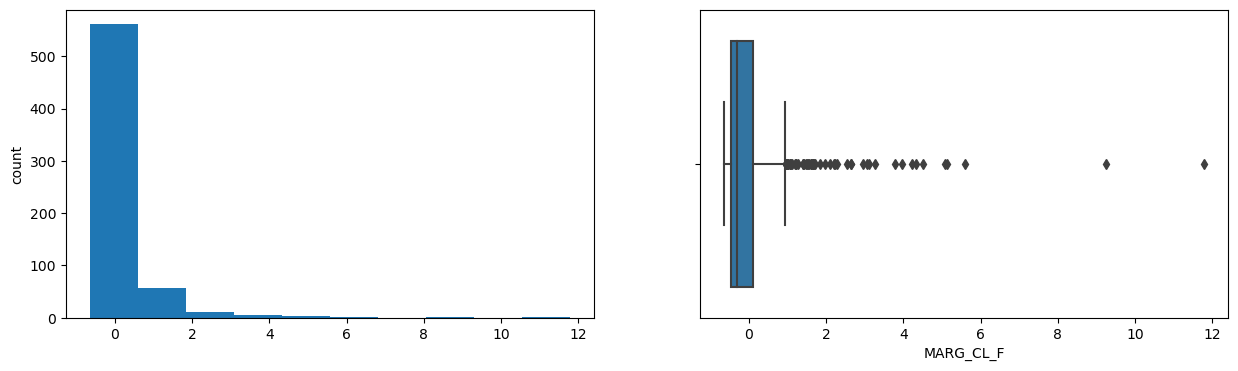

MARG_AL_M
Skew : 2.22


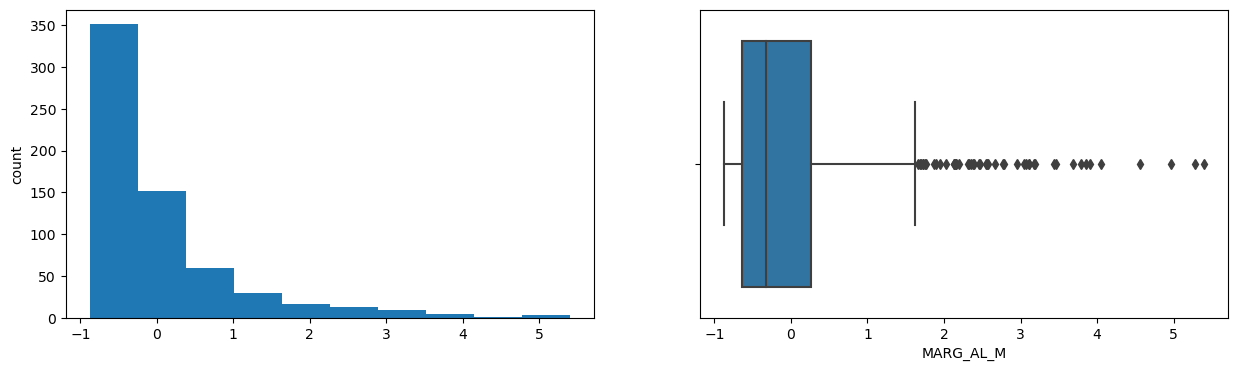

MARG_AL_F
Skew : 1.72


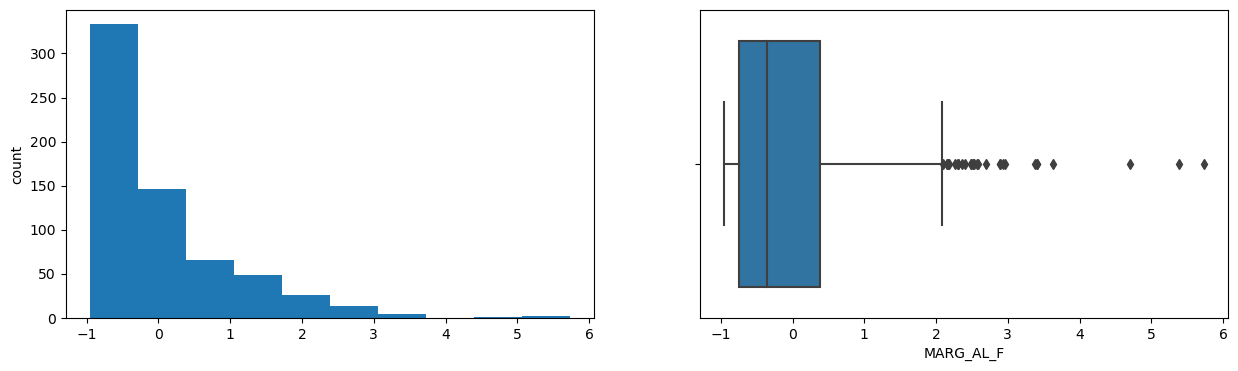

MARG_HH_M
Skew : 3.88


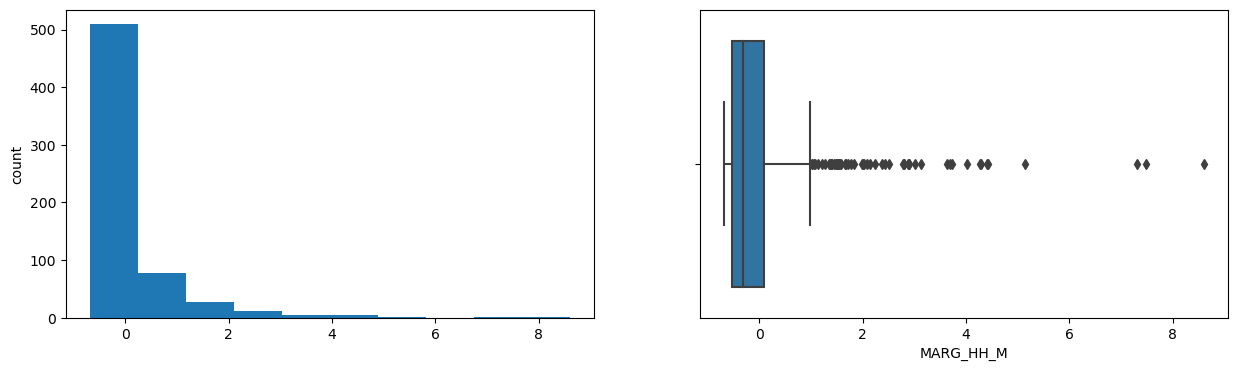

MARG_HH_F
Skew : 5.36


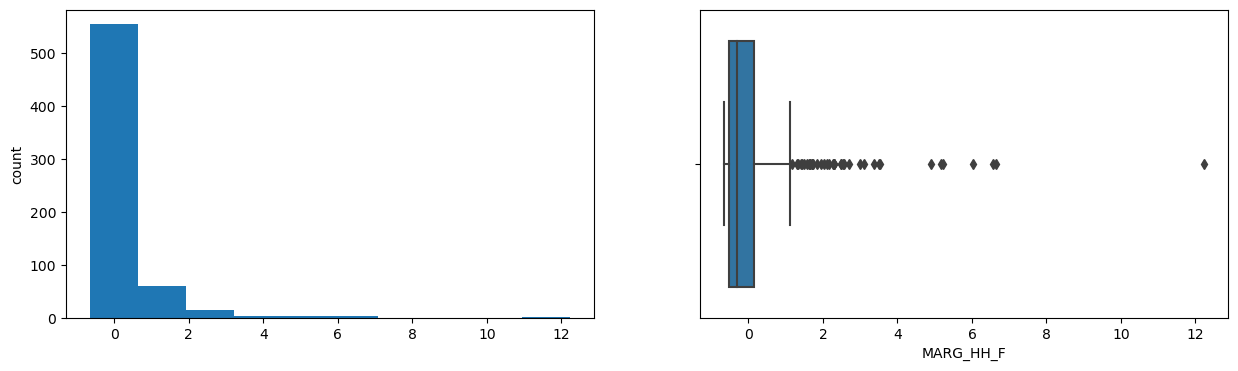

MARG_OT_M
Skew : 2.7


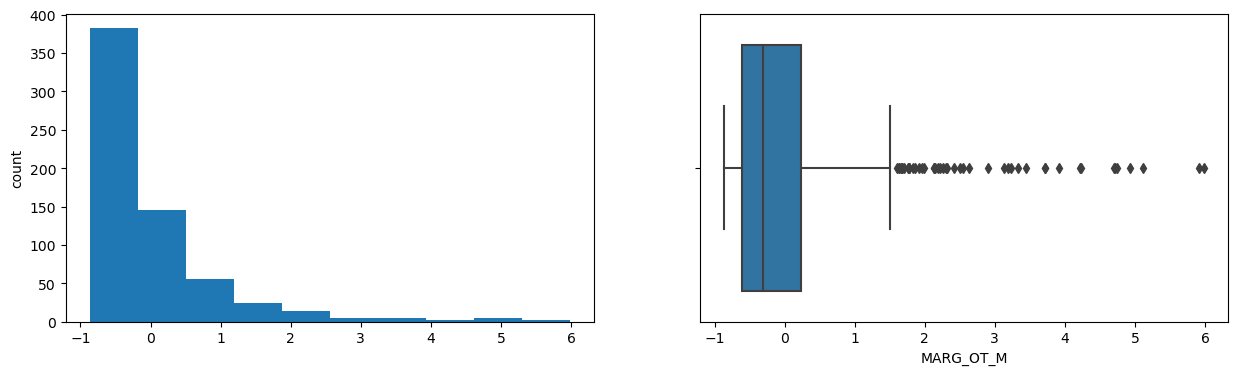

MARG_OT_F
Skew : 3.06


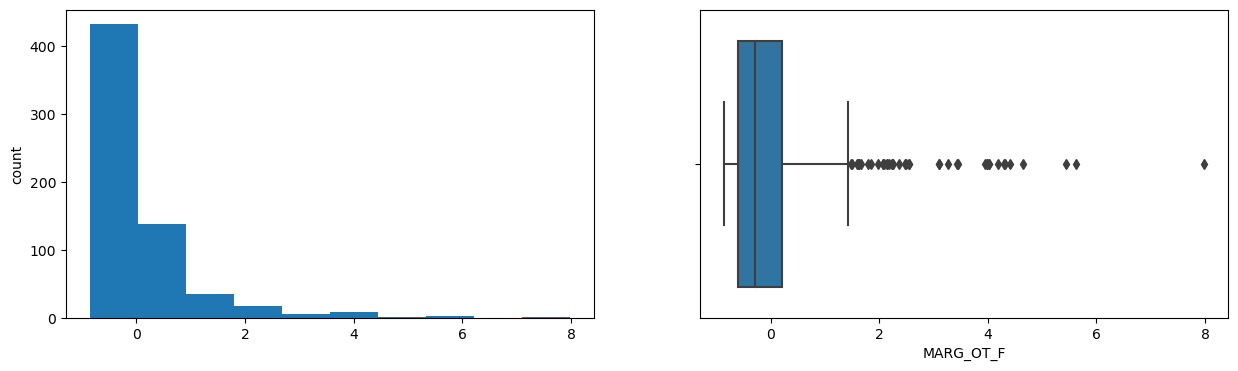

MARGWORK_3_6_M
Skew : 2.15


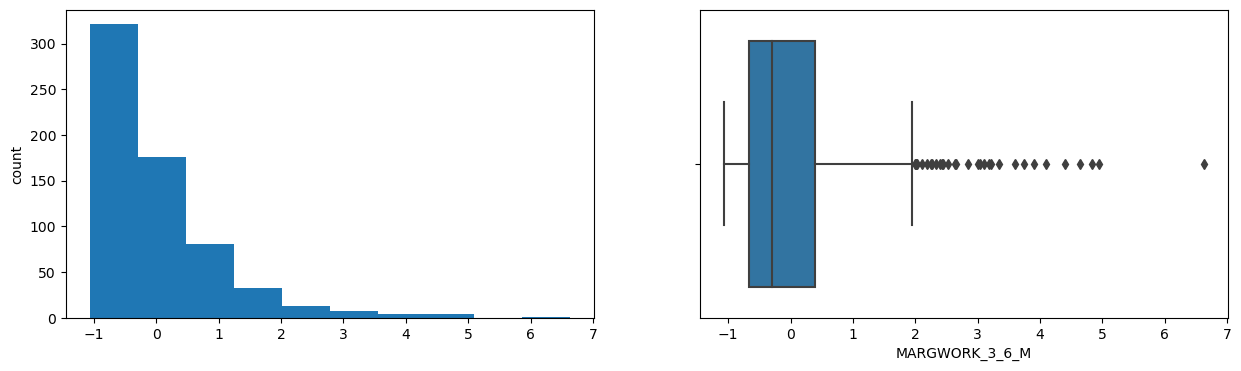

MARGWORK_3_6_F
Skew : 2.54


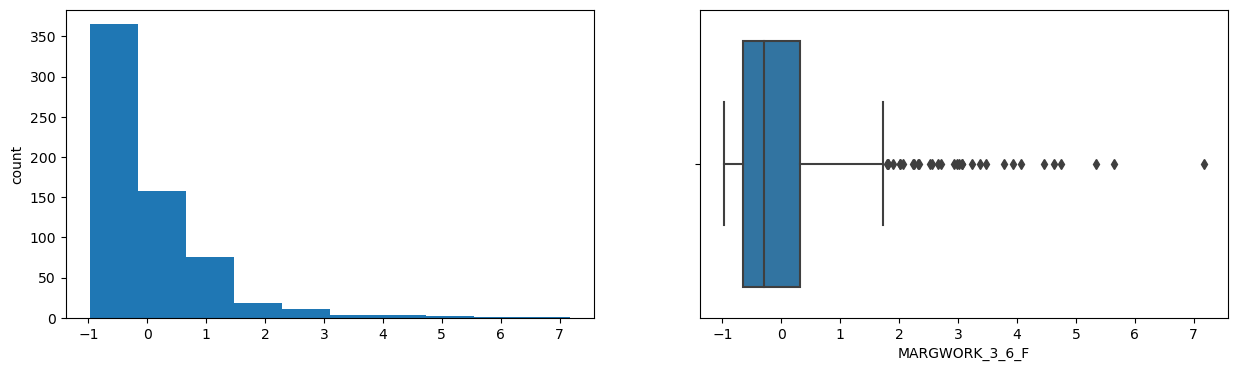

MARG_CL_3_6_M
Skew : 1.89


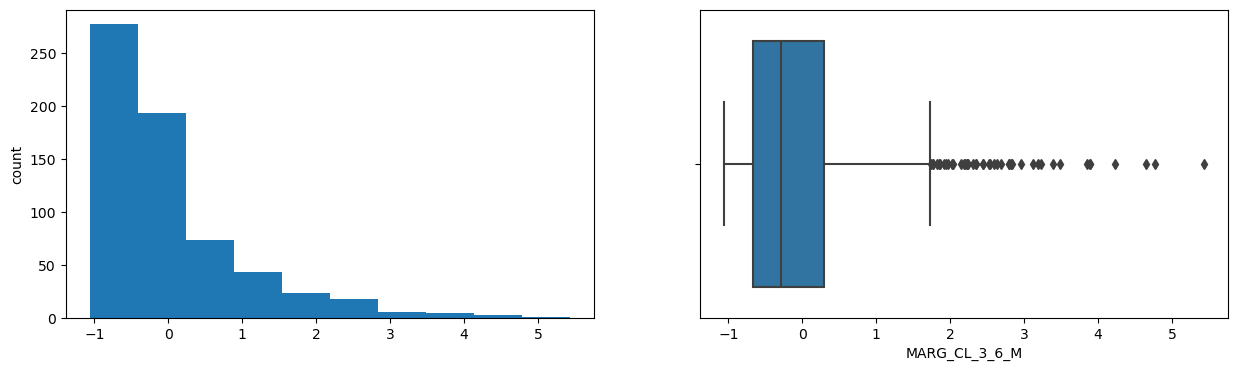

MARG_CL_3_6_F
Skew : 1.35


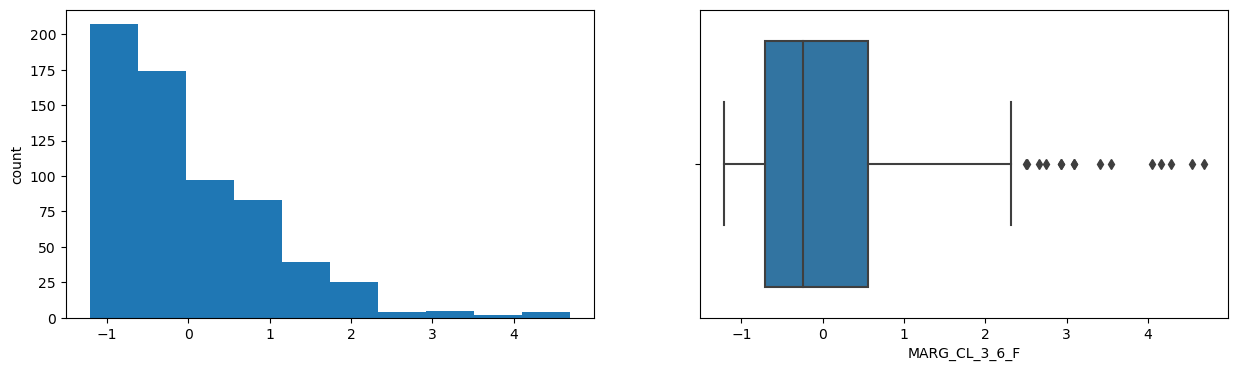

MARG_AL_3_6_M
Skew : 2.83


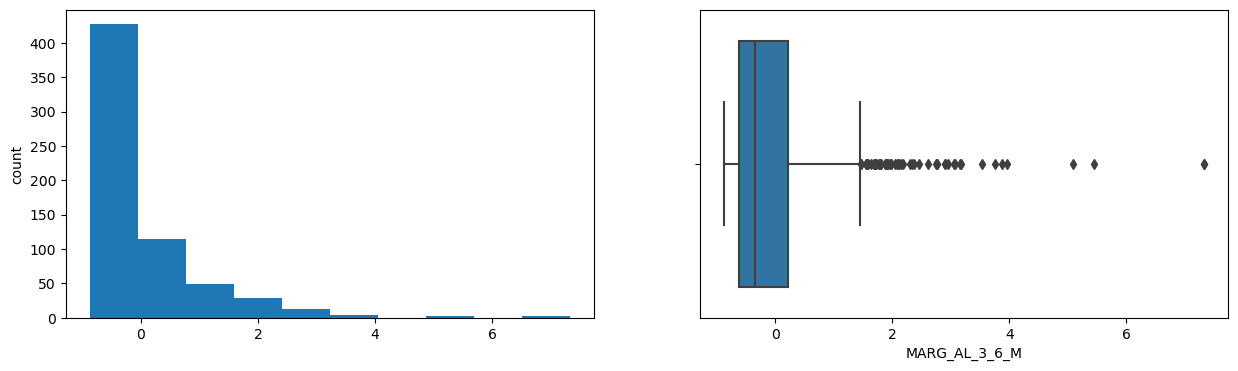

MARG_AL_3_6_F
Skew : 4.72


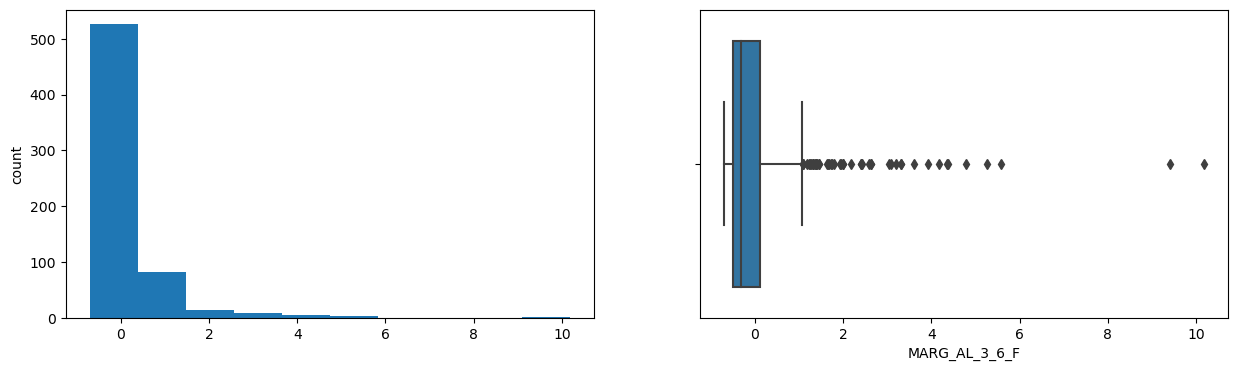

MARG_HH_3_6_M
Skew : 2.07


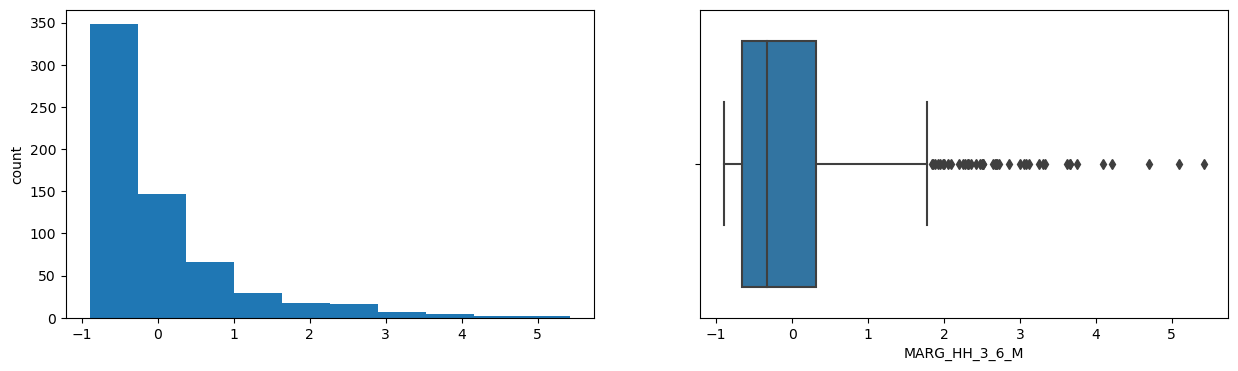

MARG_HH_3_6_F
Skew : 1.59


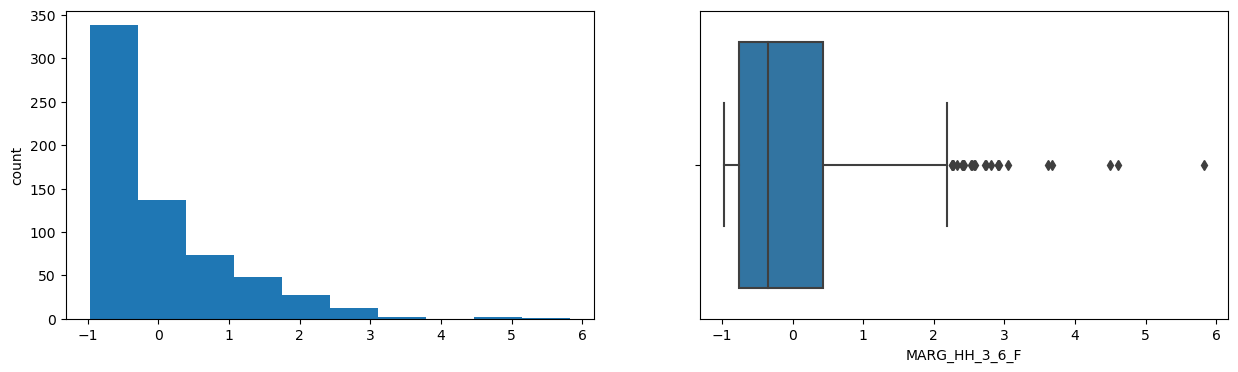

MARG_OT_3_6_M
Skew : 3.99


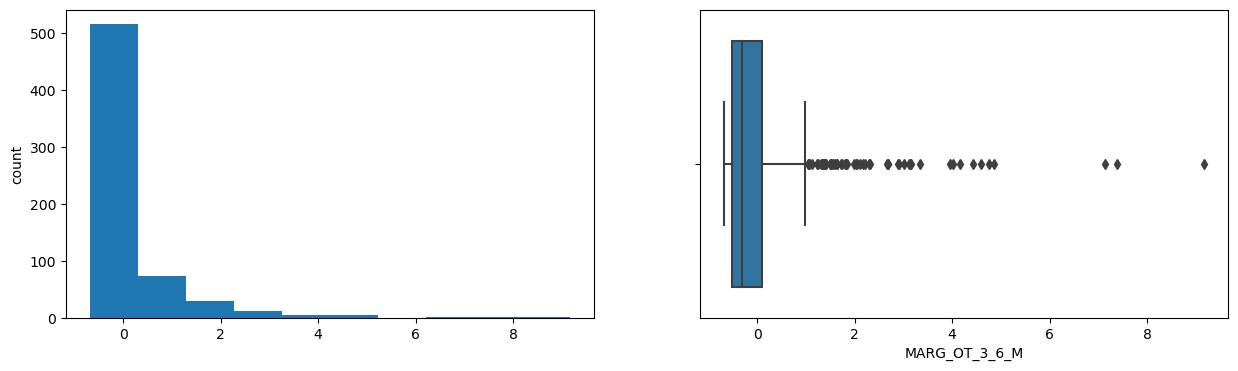

MARG_OT_3_6_F
Skew : 5.61


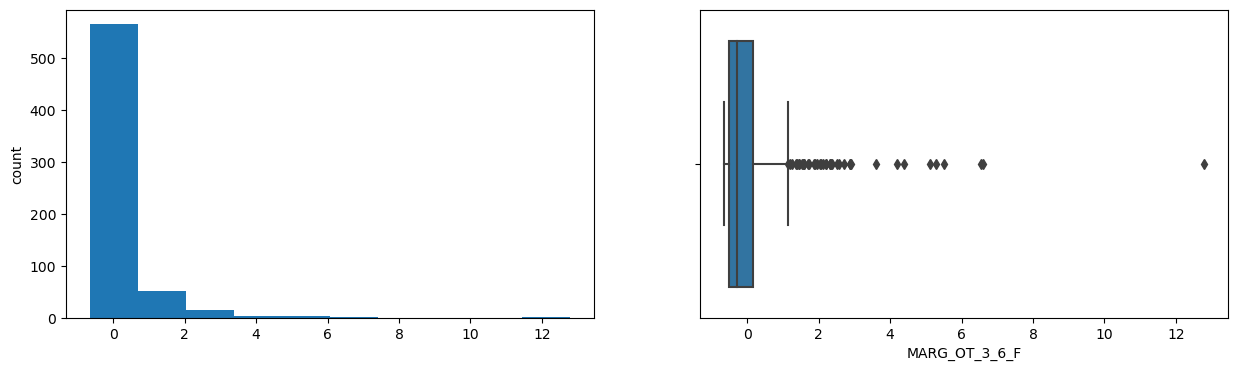

MARGWORK_0_3_M
Skew : 2.69


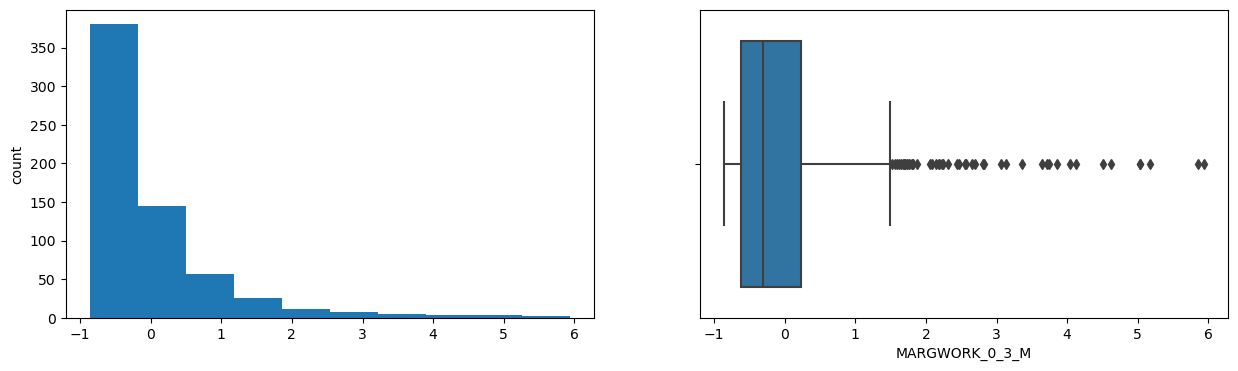

MARGWORK_0_3_F
Skew : 3.04


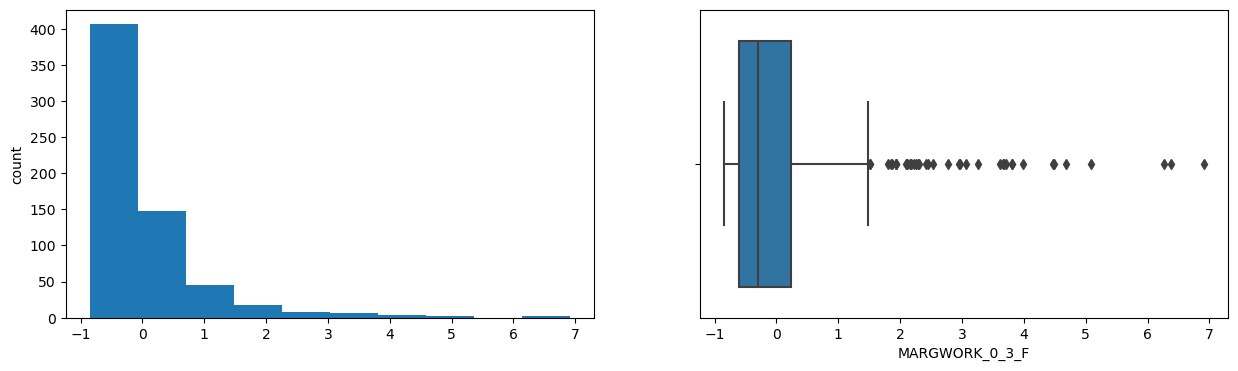

MARG_CL_0_3_M
Skew : 2.65


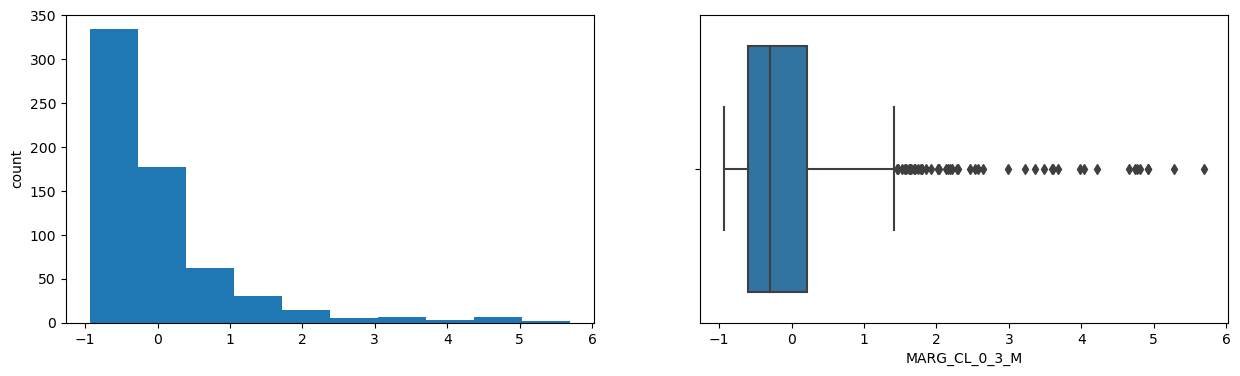

MARG_CL_0_3_F
Skew : 2.47


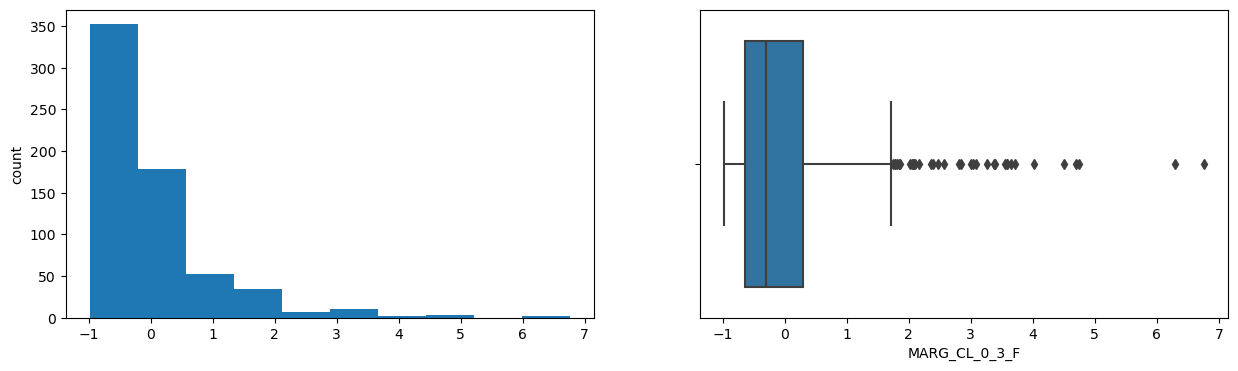

MARG_AL_0_3_M
Skew : 5.81


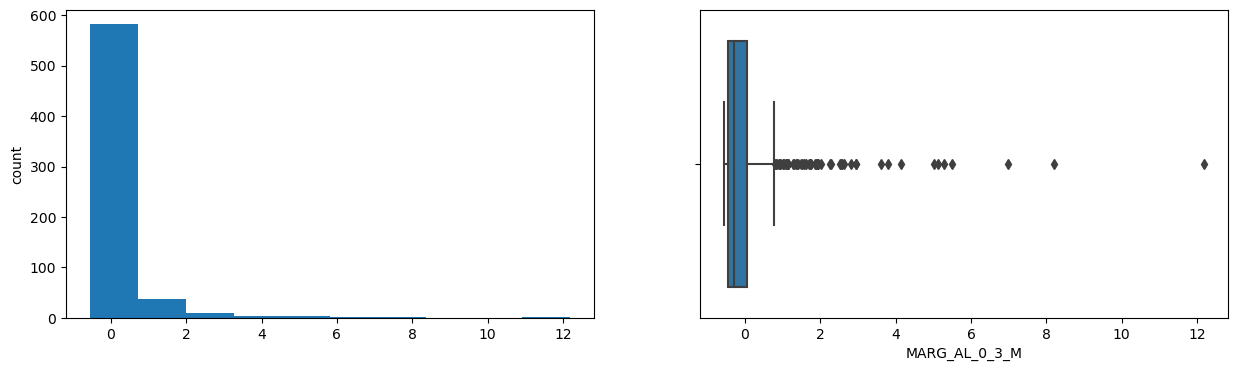

MARG_AL_0_3_F
Skew : 7.69


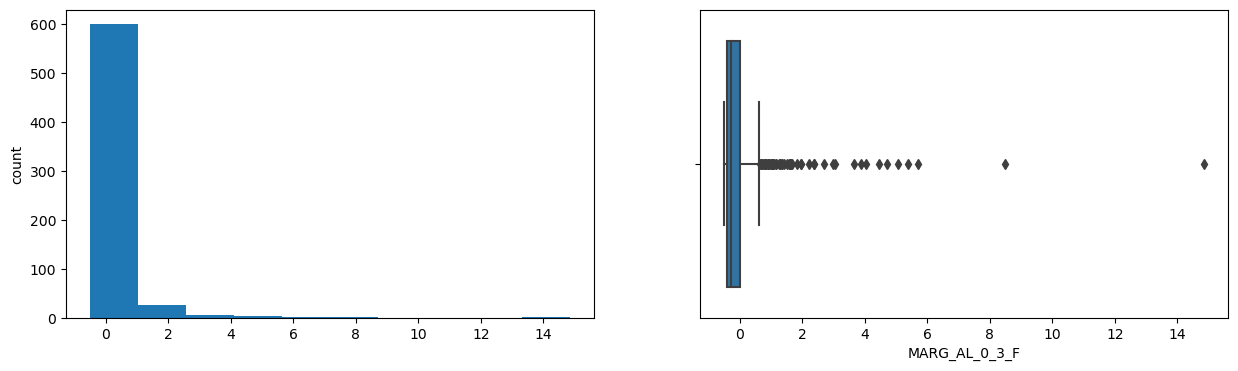

MARG_HH_0_3_M
Skew : 3.09


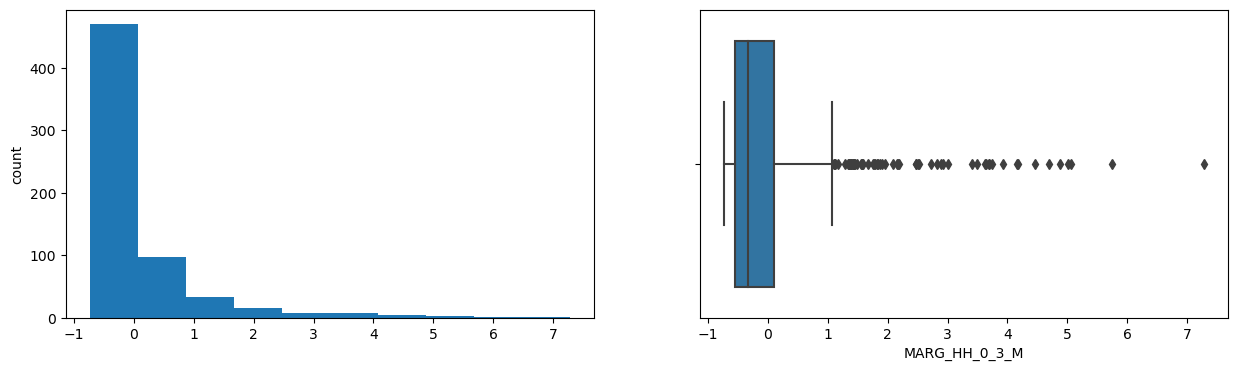

MARG_HH_0_3_F
Skew : 2.62


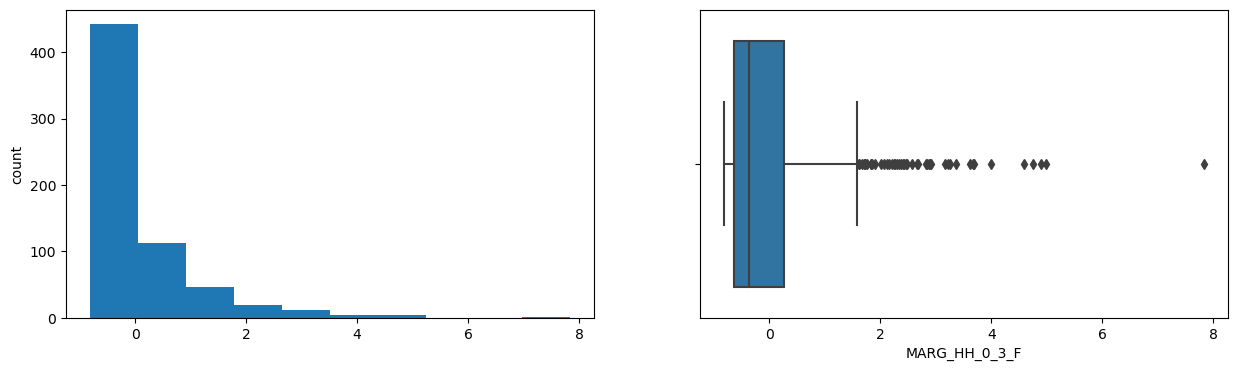

MARG_OT_0_3_M
Skew : 3.81


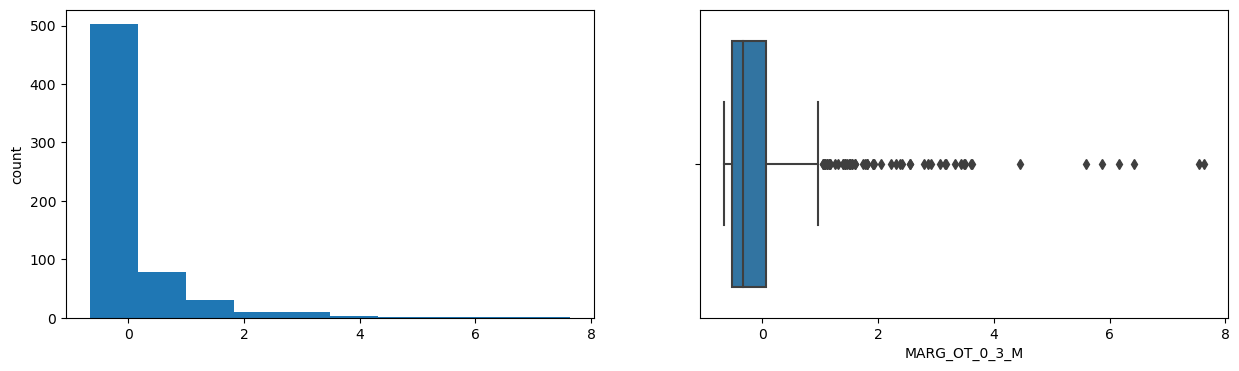

MARG_OT_0_3_F
Skew : 4.74


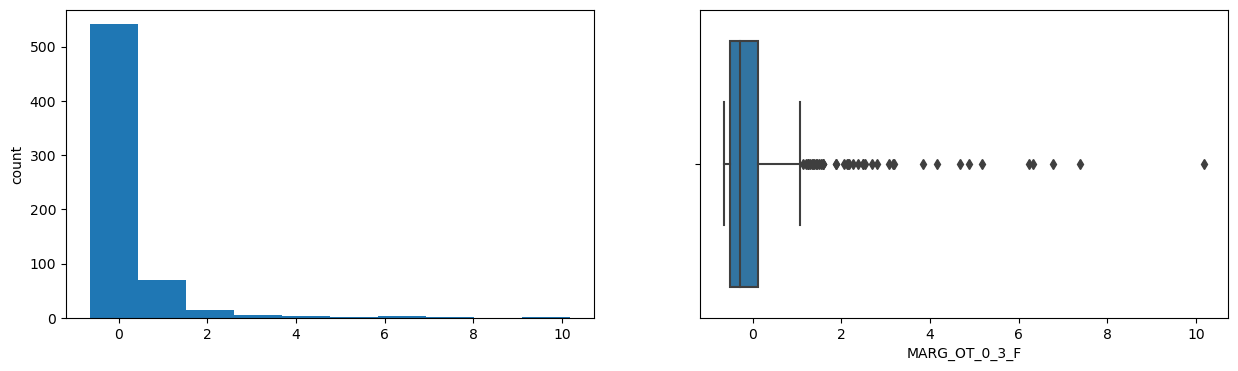

NON_WORK_M
Skew : 3.63


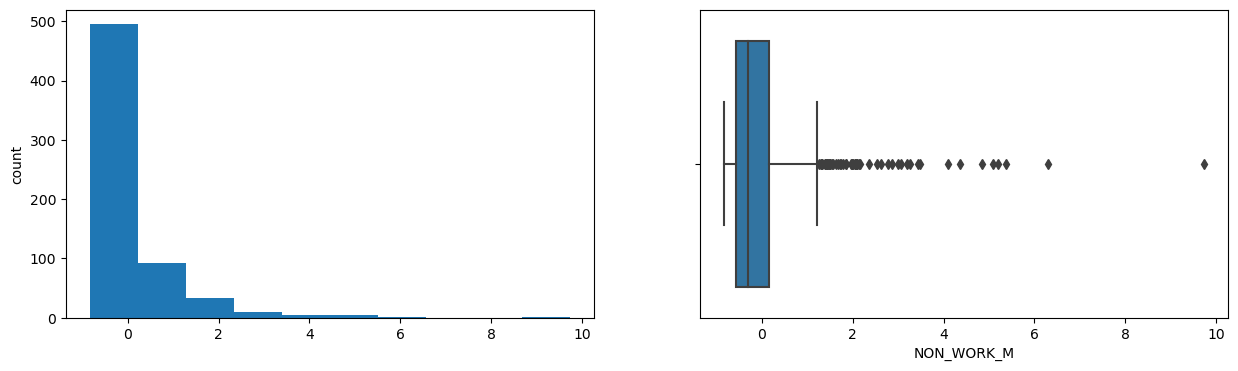

NON_WORK_F
Skew : 4.8


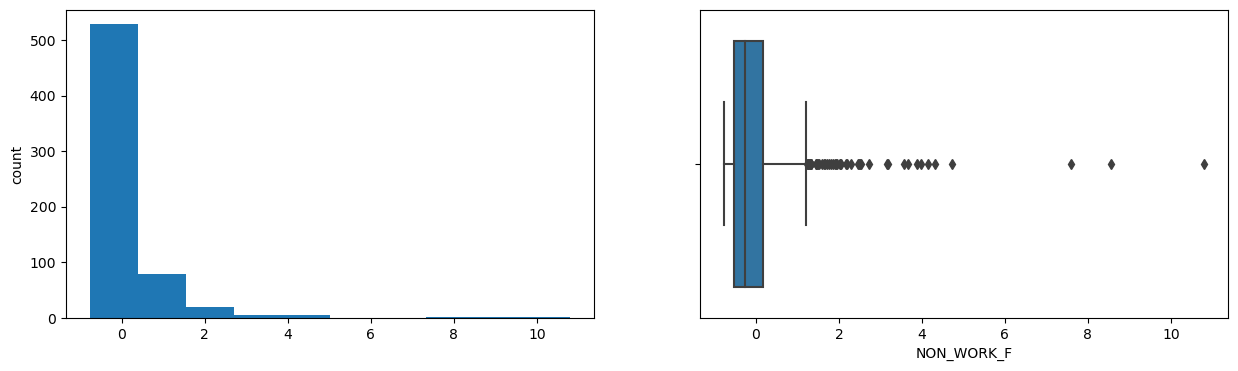

Gender Ratio
Skew : 0.7


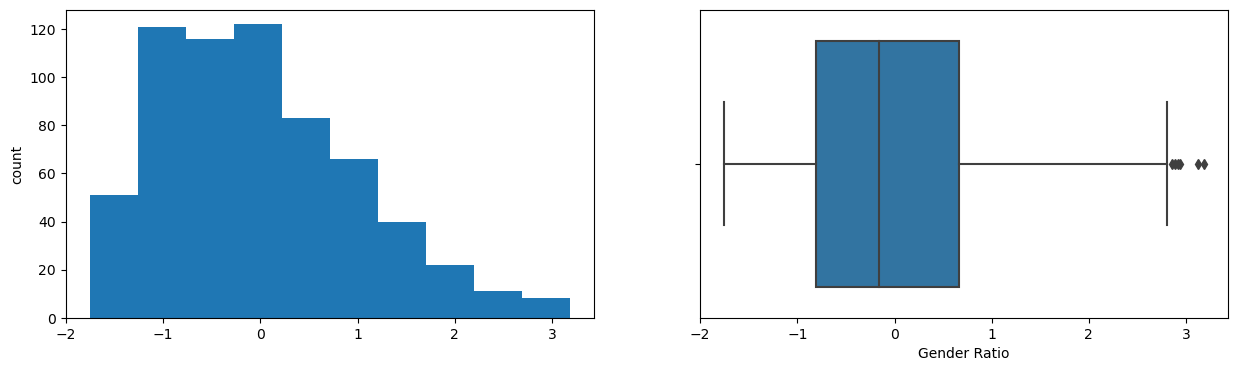

In [178]:
for col in scaled_data.columns:
    print(col)
    print('Skew :',round(scaled_data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    scaled_data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=scaled_data[col])
    plt.show()

# Part 2 - PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [179]:
!pip install factor_analyzer

In [180]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_data)
p_value

0.0

In [181]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled_data)
kmo_model

0.8049786141527705

In [182]:
scaled_data.shape

(640, 58)

In [236]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
pca_transformed = pca.fit_transform(scaled_data)

In [239]:
#Extract eigen vectors
pca.components_

array([[ 1.55949970e-01,  1.67128399e-01,  1.65523934e-01, ...,
         1.50388361e-01,  1.31031963e-01, -8.10157681e-03],
       [-1.27848067e-01, -8.90123236e-02, -1.05290450e-01, ...,
        -6.44093138e-02, -7.41736604e-02, -4.19779111e-02],
       [-3.99137202e-02,  5.48730703e-02,  1.87664209e-02, ...,
         1.25665782e-01,  9.18544125e-02, -1.97496895e-01],
       ...,
       [ 0.00000000e+00, -1.51613402e-01,  9.96333026e-03, ...,
         3.58657535e-02, -2.53235426e-03, -7.80625564e-17],
       [-0.00000000e+00, -8.66188535e-02, -1.19141980e-01, ...,
        -3.39115684e-02, -5.11903118e-02,  5.20417043e-17],
       [-0.00000000e+00,  2.01802582e-01,  2.13750580e-01, ...,
        -5.09708483e-02,  3.35644877e-02,  1.11022302e-16]])

In [240]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([3.18155845e+01, 7.88113012e+00, 4.24458862e+00, 3.85190269e+00,
       2.24389220e+00, 1.98696542e+00, 1.39500625e+00, 7.70308774e-01,
       6.28323222e-01, 5.50136031e-01, 4.64765621e-01, 4.29830449e-01,
       2.96167863e-01, 2.86200882e-01, 2.58094362e-01, 1.91996633e-01,
       1.36152279e-01, 1.12629167e-01, 1.03414710e-01, 9.48259387e-02,
       7.88824152e-02, 5.68252312e-02, 4.19768294e-02, 3.35248251e-02,
       2.96352634e-02, 2.64223124e-02, 2.27581749e-02, 1.44738734e-02,
       1.09752521e-02, 9.23769493e-03, 8.02696521e-03, 6.82164654e-03,
       4.97292856e-03, 2.55037483e-03, 1.06224589e-03, 7.05057381e-04,
       2.48166228e-31, 2.48166228e-31, 2.48166228e-31, 2.48166228e-31,
       2.48166228e-31, 2.48166228e-31, 2.48166228e-31, 2.48166228e-31,
       2.48166228e-31, 2.48166228e-31, 2.48166228e-31, 2.48166228e-31,
       2.48166228e-31, 2.48166228e-31, 2.48166228e-31, 2.48166228e-31,
       2.48166228e-31, 2.48166228e-31, 2.48166228e-31, 2.48166228e-31,
      

In [241]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([5.47687460e-01, 1.35669239e-01, 7.30682146e-02, 6.63083464e-02,
       3.86273468e-02, 3.42044962e-02, 2.40142509e-02, 1.32604339e-02,
       1.08162322e-02, 9.47028350e-03, 8.00067973e-03, 7.39929033e-03,
       5.09836381e-03, 4.92678781e-03, 4.44294981e-03, 3.30511446e-03,
       2.34378518e-03, 1.93884800e-03, 1.78022629e-03, 1.63237540e-03,
       1.35791658e-03, 9.78214513e-04, 7.22607596e-04, 5.77111078e-04,
       5.10154453e-04, 4.54845302e-04, 3.91769228e-04, 2.49159620e-04,
       1.88932815e-04, 1.59021742e-04, 1.38179708e-04, 1.17430823e-04,
       8.56061786e-05, 4.39032736e-05, 1.82859678e-05, 1.21371677e-05,
       4.27204256e-33, 4.27204256e-33, 4.27204256e-33, 4.27204256e-33,
       4.27204256e-33, 4.27204256e-33, 4.27204256e-33, 4.27204256e-33,
       4.27204256e-33, 4.27204256e-33, 4.27204256e-33, 4.27204256e-33,
       4.27204256e-33, 4.27204256e-33, 4.27204256e-33, 4.27204256e-33,
       4.27204256e-33, 4.27204256e-33, 4.27204256e-33, 4.27204256e-33,
      

In [242]:
exp_var = pca.explained_variance_ratio_
exp_var

array([5.47687460e-01, 1.35669239e-01, 7.30682146e-02, 6.63083464e-02,
       3.86273468e-02, 3.42044962e-02, 2.40142509e-02, 1.32604339e-02,
       1.08162322e-02, 9.47028350e-03, 8.00067973e-03, 7.39929033e-03,
       5.09836381e-03, 4.92678781e-03, 4.44294981e-03, 3.30511446e-03,
       2.34378518e-03, 1.93884800e-03, 1.78022629e-03, 1.63237540e-03,
       1.35791658e-03, 9.78214513e-04, 7.22607596e-04, 5.77111078e-04,
       5.10154453e-04, 4.54845302e-04, 3.91769228e-04, 2.49159620e-04,
       1.88932815e-04, 1.59021742e-04, 1.38179708e-04, 1.17430823e-04,
       8.56061786e-05, 4.39032736e-05, 1.82859678e-05, 1.21371677e-05,
       4.27204256e-33, 4.27204256e-33, 4.27204256e-33, 4.27204256e-33,
       4.27204256e-33, 4.27204256e-33, 4.27204256e-33, 4.27204256e-33,
       4.27204256e-33, 4.27204256e-33, 4.27204256e-33, 4.27204256e-33,
       4.27204256e-33, 4.27204256e-33, 4.27204256e-33, 4.27204256e-33,
       4.27204256e-33, 4.27204256e-33, 4.27204256e-33, 4.27204256e-33,
      

Text(0, 0.5, 'Cumulative Explained Variance')

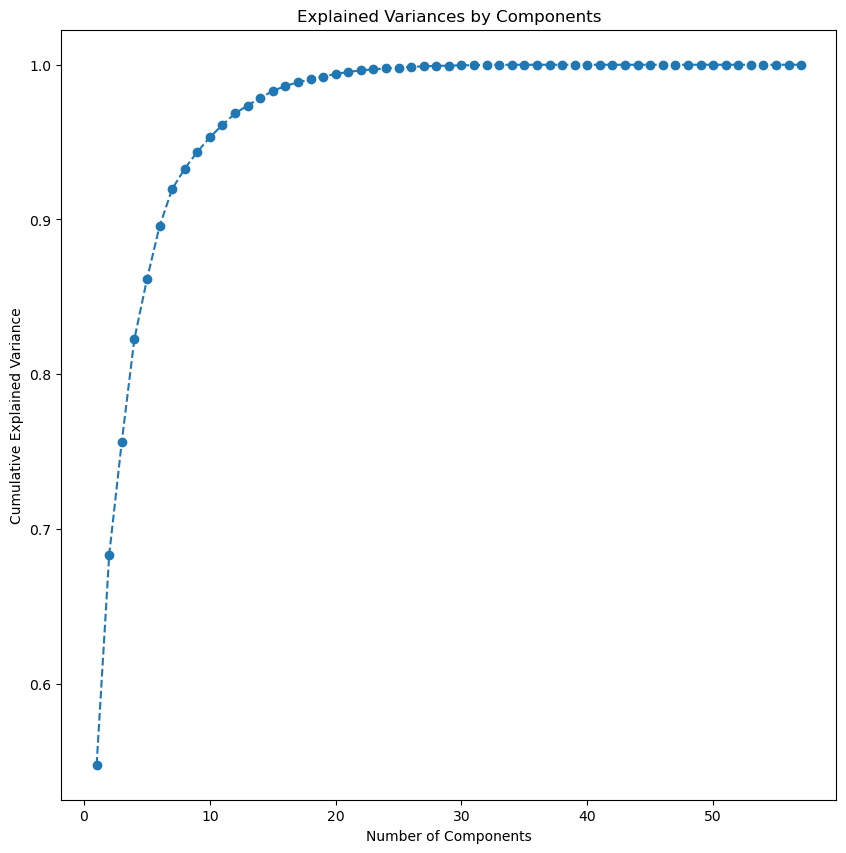

In [213]:
# visualize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,58), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

# Part 2 - PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

In [214]:
#creating dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T,
                                    columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'
                                              ,'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                                              'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
                                               'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                                                'PC41','PC42','PC43','PC244','PC45','PC46','PC47','PC48','PC49','PC50',
                                              'PC51','PC52','PC53','PC54','PC55','PC56','PC57'], index = scaled_data.columns)

In [215]:
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
No_HH           0.155950 -0.127848 -0.039914  0.119914 -0.007166  0.009290   
TOT_M           0.167128 -0.089012  0.054873  0.027664 -0.049834 -0.075033   
TOT_F           0.165524 -0.105290  0.018766  0.076107 -0.022019 -0.042157   
M_06            0.162231 -0.020885  0.067492 -0.005678 -0.079313 -0.156268   
F_06            0.162603 -0.019127  0.060545 -0.010125 -0.072283 -0.153700   
M_SC            0.151375 -0.044448  0.012922 -0.019970 -0.178092 -0.032134   
F_SC            0.151548 -0.052218 -0.029385  0.016672 -0.158399 -0.004642   
M_ST            0.027180  0.025408 -0.178305  0.170891  0.398260  0.070315   
F_ST            0.028110  0.027462 -0.199007  0.176909  0.408887  0.079088   
M_LIT           0.161990 -0.114923  0.072364  0.052834 -0.020785 -0.057194   
F_LIT           0.146842 -0.153212  0.093592  0.092873  0.050061 -0.052048   
M_ILL           0.161797 -0.005386 -0.000961 -0.046598 -0.125844 -0.116443   
F_ILL           0.165227 -0.009855 -0.103808  0.035588 -0.132817 -0.018750   
TOT_WORK_M      0.159867 -0.133203  0.037106  0.044964 -0.028124 -0.009185   
TOT_WORK_F      0.145843 -0.087643 -0.120923  0.195395 -0.038077  0.100031   
MAINWORK_M      0.146188 -0.176154  0.038955  0.072977 -0.044931  0.011134   
MAINWORK_F      0.123871 -0.153954 -0.120919  0.213926 -0.080516  0.121037   
MAIN_CL_M       0.103174  0.063053 -0.069418  0.038299 -0.316890 -0.004178   
MAIN_CL_F       0.074484  0.084264 -0.084300  0.260560 -0.249841  0.111562   
MAIN_AL_M       0.113310 -0.032764 -0.262973  0.039292 -0.227674 -0.015731   
MAIN_AL_F       0.073760 -0.062511 -0.317022  0.191578 -0.191467  0.036481   
MAIN_HH_M       0.131603 -0.074590  0.067978 -0.134806 -0.097402  0.196342   
MAIN_HH_F       0.083352 -0.082974 -0.050182 -0.055433 -0.071554  0.437288   
MAIN_OT_M       0.123512 -0.212489  0.120885  0.078133  0.064019  0.008436   
MAIN_OT_F       0.110968 -0.210793  0.055843  0.144490  0.084649  0.062042   
MARGWORK_M      0.164646  0.093688  0.016874 -0.089035  0.052650 -0.092433   
MARGWORK_F      0.155352  0.123560 -0.079120  0.077278  0.090865  0.008136   
MARG_CL_M       0.082428  0.269770  0.167297  0.122544 -0.016308  0.034521   
MARG_CL_F       0.049208  0.246154  0.202477  0.245049 -0.045467  0.100174   
MARG_AL_M       0.128622  0.165790 -0.152619 -0.146685 -0.001255 -0.141126   
MARG_AL_F       0.114241  0.138259 -0.287067  0.022253  0.058354 -0.098632   
MARG_HH_M       0.140902  0.069626  0.042129 -0.224609 -0.026844  0.112633   
MARG_HH_F       0.127675  0.024591 -0.033663 -0.195782  0.034421  0.372277   
MARG_OT_M       0.155280 -0.088290  0.128354 -0.044863  0.118783 -0.068907   
MARG_OT_F       0.147264 -0.117796  0.095528  0.014633  0.176110 -0.011119   
MARGWORK_3_6_M  0.164997 -0.043051  0.068522  0.010054 -0.067429 -0.132456   
MARGWORK_3_6_F  0.161255 -0.104874  0.079899  0.016615 -0.013080 -0.102560   
MARG_CL_3_6_M   0.165531  0.077882  0.003026 -0.094785  0.044422 -0.098685   
MARG_CL_3_6_F   0.155598  0.101308 -0.104351  0.086434  0.071850  0.012083   
MARG_AL_3_6_M   0.093057  0.264801  0.132333  0.084657 -0.006613  0.011312   
MARG_AL_3_6_F   0.051546  0.243787  0.188324  0.250664 -0.050318  0.098644   
MARG_HH_3_6_M   0.128597  0.158668 -0.164593 -0.140281 -0.014262 -0.143621   
MARG_HH_3_6_F   0.110574  0.122350 -0.305820  0.045292  0.039896 -0.091278   
MARG_OT_3_6_M   0.139642  0.063847  0.042953 -0.224527 -0.032587  0.120248   
MARG_OT_3_6_F   0.124551  0.015141 -0.035011 -0.191060  0.024588  0.390932   
MARGWORK_0_3_M  0.154312 -0.091981  0.127281 -0.045279  0.108242 -0.068498   
MARGWORK_0_3_F  0.146267 -0.125378  0.093006  0.010933  0.149949 -0.002638   
MARG_CL_0_3_M   0.150159  0.151351  0.071715 -0.059901  0.082411 -0.061041   
MARG_CL_0_3_F   0.140135  0.179610  0.004859  0.042277  0.140137 -0.004607   
MARG_AL_0_3_M   0.052570  0.251473  0.219642  0.185411 -0.033968  0.077273   
MARG_AL_0_3_F   0.041801  0.240526  0.22511

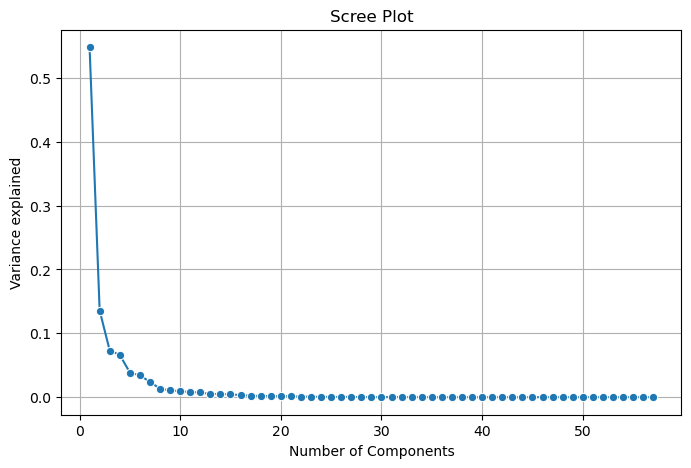

In [216]:
#Create scree plot

plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_,x=range(1,58),marker = 'o')
plt.xlabel('Number of Components',fontsize = 10)
plt.ylabel('Variance explained',fontsize = 10)
plt.title('Scree Plot',fontsize = 12)
plt.grid()
plt.show()

In [243]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  7


In [244]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.54768746, 0.6833567 , 0.75642491, 0.82273326, 0.86136061,
       0.8955651 , 0.91957935, 0.93283979, 0.94365602, 0.9531263 ,
       0.96112698, 0.96852627, 0.97362464, 0.97855142, 0.98299437,
       0.98629949, 0.98864327, 0.99058212, 0.99236235, 0.99399472,
       0.99535264, 0.99633086, 0.99705346, 0.99763057, 0.99814073,
       0.99859557, 0.99898734, 0.9992365 , 0.99942544, 0.99958446,
       0.99972264, 0.99984007, 0.99992567, 0.99996958, 0.99998786,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [220]:
#choose the Pcs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2','PC3','PC4','PC5','PC6','PC7']]
df_selected

PC1       PC2       PC3       PC4       PC5       PC6  \
No_HH           0.155950 -0.127848 -0.039914  0.119914 -0.007166  0.009290   
TOT_M           0.167128 -0.089012  0.054873  0.027664 -0.049834 -0.075033   
TOT_F           0.165524 -0.105290  0.018766  0.076107 -0.022019 -0.042157   
M_06            0.162231 -0.020885  0.067492 -0.005678 -0.079313 -0.156268   
F_06            0.162603 -0.019127  0.060545 -0.010125 -0.072283 -0.153700   
M_SC            0.151375 -0.044448  0.012922 -0.019970 -0.178092 -0.032134   
F_SC            0.151548 -0.052218 -0.029385  0.016672 -0.158399 -0.004642   
M_ST            0.027180  0.025408 -0.178305  0.170891  0.398260  0.070315   
F_ST            0.028110  0.027462 -0.199007  0.176909  0.408887  0.079088   
M_LIT           0.161990 -0.114923  0.072364  0.052834 -0.020785 -0.057194   
F_LIT           0.146842 -0.153212  0.093592  0.092873  0.050061 -0.052048   
M_ILL           0.161797 -0.005386 -0.000961 -0.046598 -0.125844 -0.116443   
F_ILL           0.165227 -0.009855 -0.103808  0.035588 -0.132817 -0.018750   
TOT_WORK_M      0.159867 -0.133203  0.037106  0.044964 -0.028124 -0.009185   
TOT_WORK_F      0.145843 -0.087643 -0.120923  0.195395 -0.038077  0.100031   
MAINWORK_M      0.146188 -0.176154  0.038955  0.072977 -0.044931  0.011134   
MAINWORK_F      0.123871 -0.153954 -0.120919  0.213926 -0.080516  0.121037   
MAIN_CL_M       0.103174  0.063053 -0.069418  0.038299 -0.316890 -0.004178   
MAIN_CL_F       0.074484  0.084264 -0.084300  0.260560 -0.249841  0.111562   
MAIN_AL_M       0.113310 -0.032764 -0.262973  0.039292 -0.227674 -0.015731   
MAIN_AL_F       0.073760 -0.062511 -0.317022  0.191578 -0.191467  0.036481   
MAIN_HH_M       0.131603 -0.074590  0.067978 -0.134806 -0.097402  0.196342   
MAIN_HH_F       0.083352 -0.082974 -0.050182 -0.055433 -0.071554  0.437288   
MAIN_OT_M       0.123512 -0.212489  0.120885  0.078133  0.064019  0.008436   
MAIN_OT_F       0.110968 -0.210793  0.055843  0.144490  0.084649  0.062042   
MARGWORK_M      0.164646  0.093688  0.016874 -0.089035  0.052650 -0.092433   
MARGWORK_F      0.155352  0.123560 -0.079120  0.077278  0.090865  0.008136   
MARG_CL_M       0.082428  0.269770  0.167297  0.122544 -0.016308  0.034521   
MARG_CL_F       0.049208  0.246154  0.202477  0.245049 -0.045467  0.100174   
MARG_AL_M       0.128622  0.165790 -0.152619 -0.146685 -0.001255 -0.141126   
MARG_AL_F       0.114241  0.138259 -0.287067  0.022253  0.058354 -0.098632   
MARG_HH_M       0.140902  0.069626  0.042129 -0.224609 -0.026844  0.112633   
MARG_HH_F       0.127675  0.024591 -0.033663 -0.195782  0.034421  0.372277   
MARG_OT_M       0.155280 -0.088290  0.128354 -0.044863  0.118783 -0.068907   
MARG_OT_F       0.147264 -0.117796  0.095528  0.014633  0.176110 -0.011119   
MARGWORK_3_6_M  0.164997 -0.043051  0.068522  0.010054 -0.067429 -0.132456   
MARGWORK_3_6_F  0.161255 -0.104874  0.079899  0.016615 -0.013080 -0.102560   
MARG_CL_3_6_M   0.165531  0.077882  0.003026 -0.094785  0.044422 -0.098685   
MARG_CL_3_6_F   0.155598  0.101308 -0.104351  0.086434  0.071850  0.012083   
MARG_AL_3_6_M   0.093057  0.264801  0.132333  0.084657 -0.006613  0.011312   
MARG_AL_3_6_F   0.051546  0.243787  0.188324  0.250664 -0.050318  0.098644   
MARG_HH_3_6_M   0.128597  0.158668 -0.164593 -0.140281 -0.014262 -0.143621   
MARG_HH_3_6_F   0.110574  0.122350 -0.305820  0.045292  0.039896 -0.091278   
MARG_OT_3_6_M   0.139642  0.063847  0.042953 -0.224527 -0.032587  0.120248   
MARG_OT_3_6_F   0.124551  0.015141 -0.035011 -0.191060  0.024588  0.390932   
MARGWORK_0_3_M  0.154312 -0.091981  0.127281 -0.045279  0.108242 -0.068498   
MARGWORK_0_3_F  0.146267 -0.125378  0.093006  0.010933  0.149949 -0.002638   
MARG_CL_0_3_M   0.150159  0.151351  0.071715 -0.059901  0.082411 -0.061041   
MARG_CL_0_3_F   0.140135  0.179610  0.004859  0.042277  0.140137 -0.004607   
MARG_AL_0_3_M   0.052570  0.251473  0.219642  0.185411 -0.033968  0.077273   
MARG_AL_0_3_F   0.041801  0.240526  0.22511

In [259]:
def color_high(val):
    if val <= -0.40: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
    
df_selected.T.style.applymap(color_high)

# Part 2 - PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables

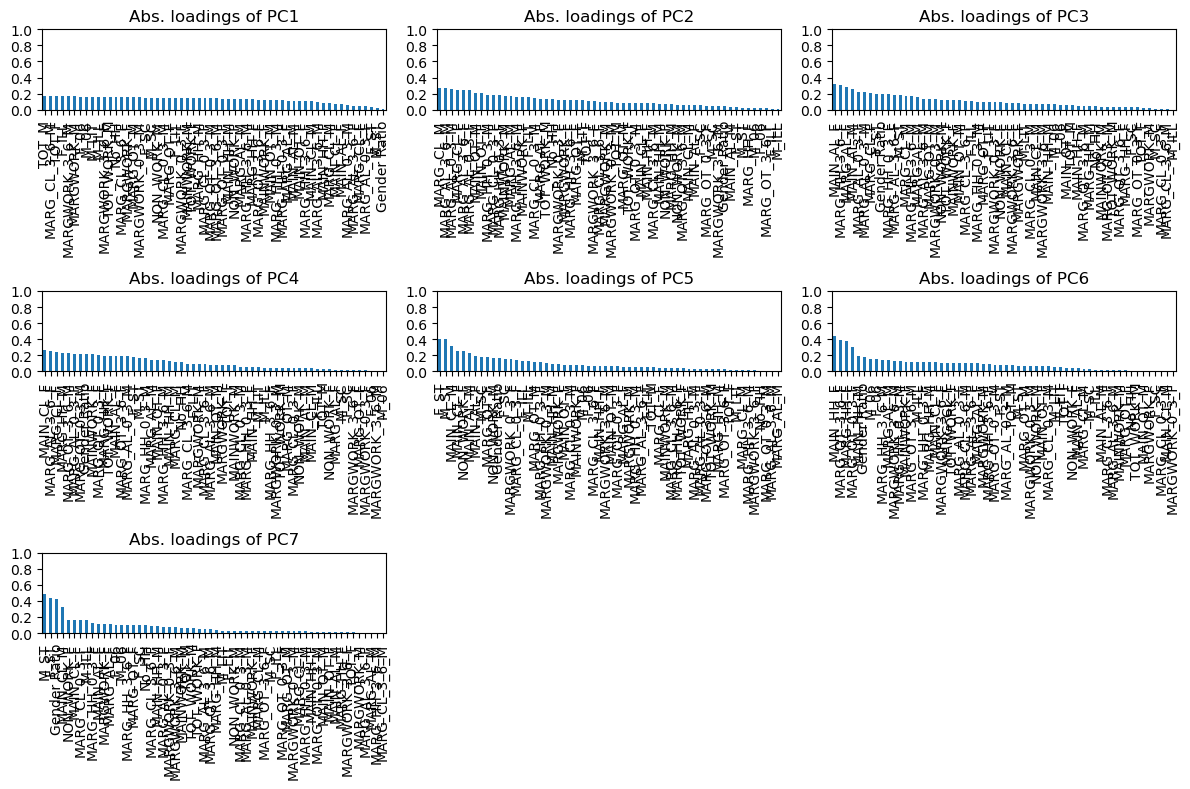

In [256]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,3,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout();

<AxesSubplot:>

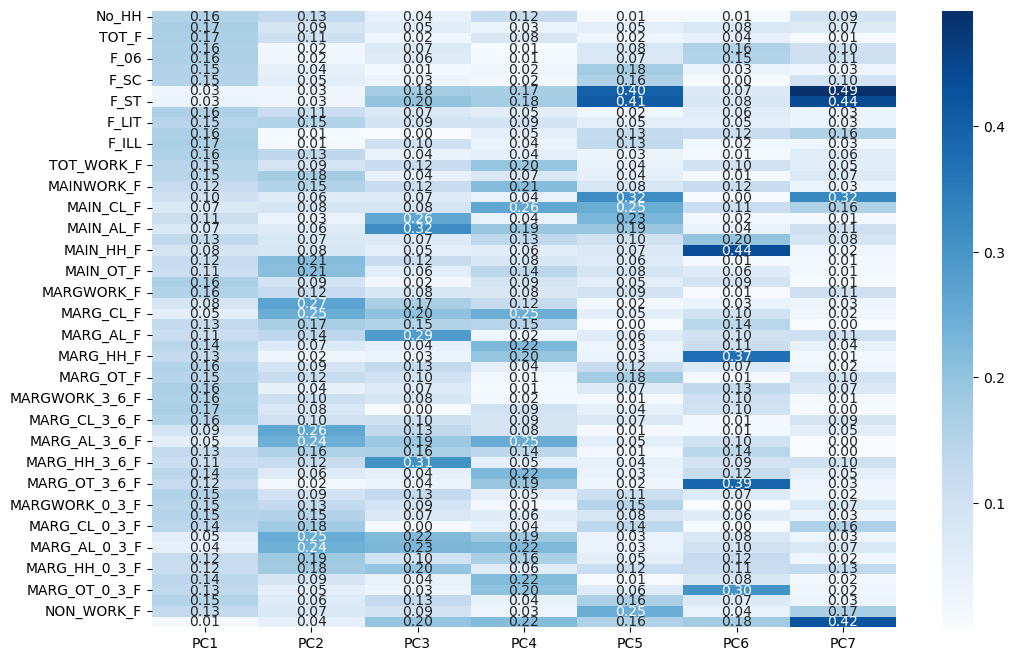

In [257]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f')

In [230]:
pca = PCA(n_components=7, random_state=123)
pca_final = pca.fit_transform(scaled_data)

In [231]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -4.606808  0.205082  0.972740 -1.595705  0.231702 -0.550977  0.240218
1 -4.757847 -0.019587  1.079532 -2.087206 -0.170915  0.311639  0.420459
2 -5.968822 -0.308299  0.407239 -0.338244  0.642041  0.319947 -0.147544
3 -6.278909 -0.481269  0.529012 -0.965877  0.376859  0.069473 -0.233270
4 -4.474703  0.920558  1.211554 -0.210837  0.849395  0.193129  0.137347
5 -3.316814  2.844513  2.747875  1.383784  0.868099  0.538610 -0.163822
6 -5.013309 -0.293151  1.080216 -0.927364 -0.135739 -0.288578  0.075768
7 -4.600215  0.079354  0.995597 -1.546236  0.146776 -0.187043  0.048663
8 -5.176017  0.008276  0.873448 -1.795878  0.200958  0.356944  0.139712
9 -4.218239 -1.278976  1.251981 -1.354591  0.264968 -0.065969 -0.000696

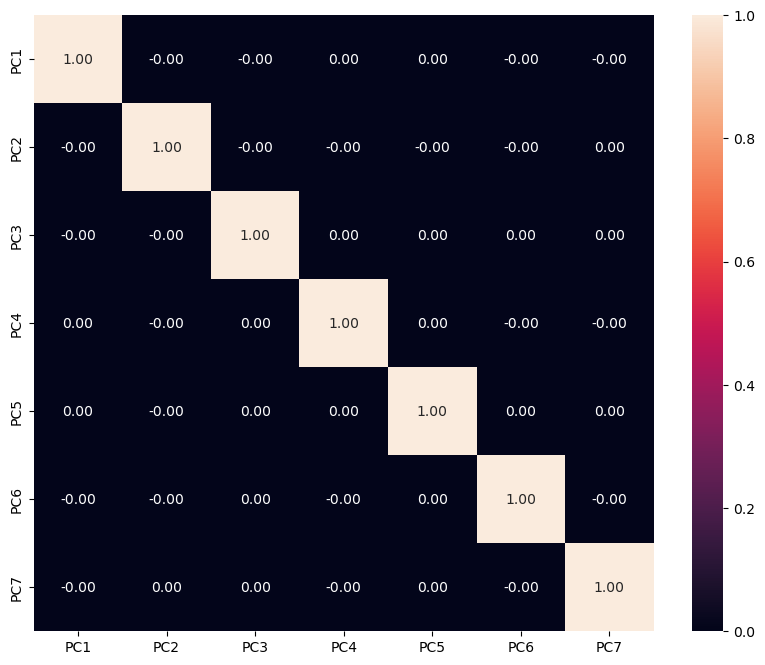

In [232]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

# Part 2 - PCA: Write linear equation for first PC.

In [258]:
for i in range(0,57): 
    print("(",np.round(pca.components_[0][i],2),")",'*',scaled_data.columns[i], end=' + ')

( 0.16 ) * No_HH + ( 0.17 ) * TOT_M + ( 0.17 ) * TOT_F + ( 0.16 ) * M_06 + ( 0.16 ) * F_06 + ( 0.15 ) * M_SC + ( 0.15 ) * F_SC + ( 0.03 ) * M_ST + ( 0.03 ) * F_ST + ( 0.16 ) * M_LIT + ( 0.15 ) * F_LIT + ( 0.16 ) * M_ILL + ( 0.17 ) * F_ILL + ( 0.16 ) * TOT_WORK_M + ( 0.15 ) * TOT_WORK_F + ( 0.15 ) * MAINWORK_M + ( 0.12 ) * MAINWORK_F + ( 0.1 ) * MAIN_CL_M + ( 0.07 ) * MAIN_CL_F + ( 0.11 ) * MAIN_AL_M + ( 0.07 ) * MAIN_AL_F + ( 0.13 ) * MAIN_HH_M + ( 0.08 ) * MAIN_HH_F + ( 0.12 ) * MAIN_OT_M + ( 0.11 ) * MAIN_OT_F + ( 0.16 ) * MARGWORK_M + ( 0.16 ) * MARGWORK_F + ( 0.08 ) * MARG_CL_M + ( 0.05 ) * MARG_CL_F + ( 0.13 ) * MARG_AL_M + ( 0.11 ) * MARG_AL_F + ( 0.14 ) * MARG_HH_M + ( 0.13 ) * MARG_HH_F + ( 0.16 ) * MARG_OT_M + ( 0.15 ) * MARG_OT_F + ( 0.16 ) * MARGWORK_3_6_M + ( 0.16 ) * MARGWORK_3_6_F + ( 0.17 ) * MARG_CL_3_6_M + ( 0.16 ) * MARG_CL_3_6_F + ( 0.09 ) * MARG_AL_3_6_M + ( 0.05 ) * MARG_AL_3_6_F + ( 0.13 ) * MARG_HH_3_6_M + ( 0.11 ) * MARG_HH_3_6_F + ( 0.14 ) * MARG_OT_3_6_M + ( 0